# Finetune your Neural Network and save it

🎯 Goals of this challenge:
    
1. ⚙️ **Finetune the optimizer** of a neural network
2. 💾 **Save**/**Load** a trained neural network

👩🏻‍🏫 Now that you have solid foundations about what Neural Networks are, how to design their architecture and how to prevent them from overfitting, let's take a closer look at the **`.compile(loss = ..., metrics = ..., activation = ...)`** part.

## (0) The Boston Housing Dataset

📚 ***Tensorflow.Keras*** has several built-in dataset that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

🏠 Among them, we are going to use the **`Boston Housing Dataset`**:
- our mission is to ***predict the values of the houses in k USD***
- and we will measure the performance of our model (s) using the _Mean Absolute Error (MAE)_ metrics.

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### (0.1) Loading the dataset

In [2]:
# The Boston Housing Dataset from Keras
from tensorflow.keras.datasets import boston_housing

In [3]:
# Loading the dataset:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [4]:
# Shape of the dataset: 
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((404, 13), (404,)), ((102, 13), (102,)))

### (0.2) Quick glance at the target

<AxesSubplot:ylabel='Count'>

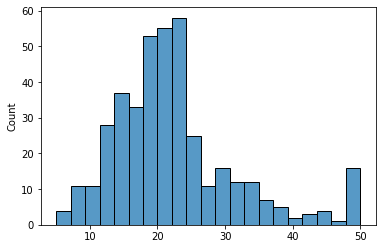

In [5]:
# Distribution of the houses' prices in the training set
sns.histplot(y_train)

In [6]:
# Null values and types of each feature:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [7]:
# Statistics about the numerical columns
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


### (0.3) Minimal data preprocessing

👉 Here, we don't have any duplicates or missing values. Let's do the strict minimum of data preprocessing, _i.e._ ***scaling*** and move on quickly to the modelling phase.

❓ **Question: scaling your features** ❓ 

Standardize `X_train` and `X_test`.

In [8]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### (0.4) Baseline Model


🧑🏻‍🏫 In a regression task, **the baseline model always predicts the average value of `y_train`**

<details>
    <summary><i>Really ? </i></summary>
    
* 🐒 Yes in most cases...! we also like to call it _"dumbbest model"_ but _"baseline model"_ is more correct politically speaking :)
* ❗️ Be aware that this is not the only possible way of building a baseline model.
* 💹 ***In Time Series, the baseline model consists in predicting the last seen value***

❓ **Question: what would be the performance of the baseline model here ?** ❓ 

Before running any Machine Learning algorithm or advanced Deep Learning Neural Networks, it would be great to establish a benchmark score that you are supposed to beat. Otherwise, what is the point of running a fancy algorithm if you cannot beat this benchmark score on the test set (other than showing off) ? 

* Compute the Mean Absolute Error on the test set if your dumb prediction corresponds to the mean value of `y_train` computed on the train set.

In [9]:
# YOUR CODE HERE
import tensorflow as tf
y_pred = y_train.mean()

def custom_mae(y_true, y_pred):
    abs_error = abs((y_true - y_pred))
    return (abs_error)

mean_absolute_error_test_baseline = custom_mae(y_train, y_pred).mean()

## (1) The Neural Network

❓ **Question: initializing a Neural Network with a specific architecture** ❓

Write a function **`initialize_model`** that generates a Neural Network with 3 layers: 
- Input layer: 10 neurons, _"relu"_ activation function, and an the appropriate input dimension
- Hidden layer: 7 neurons and the _"relu"_ activation function
- Predictive layer: an appropriate layer corresponding to the problem we are trying to solve

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers, Sequential

def initialize_model():
    model = Sequential()
    model.add(layers.Dense(10, input_dim=13, activation='relu'))
    model.add(layers.Dense(7, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))

    return model

    

In [11]:
model = initialize_model()

2022-09-26 13:22:43.104363: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-26 13:22:43.140377: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-09-26 13:22:43.140399: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-09-26 13:22:43.142556: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (o

❓ **Question: number of parameters** ❓

How many parameters do have in this model ? 
1. Compute this number yourself
2. Double-check your answer with _model.summary()_

We already covered this question about the **number of parameters in a Fully Connected/Dense network** during **Deep Learning > 01. Fundamentals of Deep Learning** but it is always good to make sure you master the foundations of a new discipline 😉

In [78]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 10)                140       
                                                                 
 dense_67 (Dense)            (None, 7)                 77        
                                                                 
 dense_68 (Dense)            (None, 1)                 8         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


<details>
    <summary><i>Answer</i></summary>
    
* Each house has `X_train.shape[-1]` = 13 features
* Remember that a neuron is a linear activation combined with an activation so we will have 13 weights and 1 bias

1. First layer : 10 neurons $\times$ (13 weights + 1 bias ) = 140 params
2. Second layer : 7 neurons $\times$ (10 weights + 1 bias ) = 77 params
3. Third layer : 1 neuron $\times$ (7 weights + 1 bias) = 8 params
    
    
</details>

## (2) The optimizer



❓ **Question about the compiling method** ❓ 

Write a function that :
* takes as arguments _both_ a _model_ and an _optimizer_, 
* ***compiles*** the model,
* and returns the compiled model

Please select wisely:
* the _loss function_ to be optimized 
* and  the _metrics_ on which the model should be evaluated .

In [142]:
model = initialize_model()

def compile_model(model, optimizer_name):
    return model.compile(optimizer=optimizer_name, loss=['mae', 'mse'], metrics=['mae', 'mse'])

❓ **Question: evaluating the model** ❓ 

- Initialize the model and compile it with the `adam` optimizer 
- Fit it on the training data. 
- Evaluate your model on the test data.

Don't forget to use an Early Stopping criterion to avoid overfitting 

<details>
    <summary><i>Notes</i></summary>

As we saw in the _"How to prevent overfitting" challenge_,  you could also use L2 penalties and Dropout Layers to prevent overfitting but:
1. _Early Stopping is the easiest and quickest code to implement, you just declare _es = EarlyStopping(...)_ and you call it back in the _.fit()_ _
2. _The main goal of this challenge is to understand the impact of the optimizer_, so stay focused 😉
    
</details>

In [105]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=20, restore_best_weights=True, verbose=0)

model = initialize_model()
compile_model(model, 'adam')

model.fit(X_train, y_train, batch_size=32, validation_split=0.3,  callbacks=[es], epochs=10000)


Epoch 1/10000
9/9 [==============================] - 1s 25ms/step - loss: 22.0831 - mae: 22.0831 - mse: 567.8276 - val_loss: 23.4130 - val_mae: 23.4130 - val_mse: 659.3116
Epoch 2/10000
9/9 [==============================] - 0s 8ms/step - loss: 21.9515 - mae: 21.9515 - mse: 562.2754 - val_loss: 23.2892 - val_mae: 23.2892 - val_mse: 653.6810
Epoch 3/10000
9/9 [==============================] - 0s 7ms/step - loss: 21.8223 - mae: 21.8223 - mse: 556.6688 - val_loss: 23.1644 - val_mae: 23.1644 - val_mse: 648.1784
Epoch 4/10000
9/9 [==============================] - 0s 7ms/step - loss: 21.6913 - mae: 21.6913 - mse: 551.3356 - val_loss: 23.0341 - val_mae: 23.0341 - val_mse: 642.5446
Epoch 5/10000
9/9 [==============================] - 0s 7ms/step - loss: 21.5526 - mae: 21.5526 - mse: 545.8254 - val_loss: 22.8935 - val_mae: 22.8935 - val_mse: 636.5345
Epoch 6/10000
9/9 [==============================] - 0s 6ms/step - loss: 21.4051 - mae: 21.4051 - mse: 539.9772 - val_loss: 22.7408 - val_mae: 2

9/9 [==============================] - 0s 6ms/step - loss: 2.6537 - mae: 2.6537 - mse: 17.4847 - val_loss: 3.9204 - val_mae: 3.9204 - val_mse: 41.2272
Epoch 99/10000
9/9 [==============================] - 0s 6ms/step - loss: 2.6359 - mae: 2.6359 - mse: 17.2668 - val_loss: 3.8849 - val_mae: 3.8849 - val_mse: 40.5018
Epoch 100/10000
9/9 [==============================] - 0s 5ms/step - loss: 2.6218 - mae: 2.6218 - mse: 17.0210 - val_loss: 3.8678 - val_mae: 3.8678 - val_mse: 40.1294
Epoch 101/10000
9/9 [==============================] - 0s 7ms/step - loss: 2.6051 - mae: 2.6051 - mse: 16.8504 - val_loss: 3.8404 - val_mae: 3.8404 - val_mse: 39.6151
Epoch 102/10000
9/9 [==============================] - 0s 8ms/step - loss: 2.5880 - mae: 2.5880 - mse: 16.5915 - val_loss: 3.8142 - val_mae: 3.8142 - val_mse: 39.2400
Epoch 103/10000
9/9 [==============================] - 0s 8ms/step - loss: 2.5745 - mae: 2.5745 - mse: 16.4719 - val_loss: 3.7877 - val_mae: 3.7877 - val_mse: 38.9877
Epoch 104/10000

9/9 [==============================] - 0s 6ms/step - loss: 1.9479 - mae: 1.9479 - mse: 9.7575 - val_loss: 3.0033 - val_mae: 3.0033 - val_mse: 24.2879
Epoch 197/10000
9/9 [==============================] - 0s 6ms/step - loss: 1.9435 - mae: 1.9435 - mse: 9.7734 - val_loss: 3.0099 - val_mae: 3.0099 - val_mse: 24.3185
Epoch 198/10000
9/9 [==============================] - 0s 6ms/step - loss: 1.9400 - mae: 1.9400 - mse: 9.7593 - val_loss: 2.9944 - val_mae: 2.9944 - val_mse: 24.1891
Epoch 199/10000
9/9 [==============================] - 0s 6ms/step - loss: 1.9468 - mae: 1.9468 - mse: 9.6962 - val_loss: 2.9808 - val_mae: 2.9808 - val_mse: 24.0176
Epoch 200/10000
9/9 [==============================] - 0s 6ms/step - loss: 1.9332 - mae: 1.9332 - mse: 9.6129 - val_loss: 2.9853 - val_mae: 2.9853 - val_mse: 23.9157
Epoch 201/10000
9/9 [==============================] - 0s 6ms/step - loss: 1.9266 - mae: 1.9266 - mse: 9.6152 - val_loss: 2.9838 - val_mae: 2.9838 - val_mse: 24.0044
Epoch 202/10000
9/9 

9/9 [==============================] - 0s 6ms/step - loss: 1.7297 - mae: 1.7297 - mse: 7.9405 - val_loss: 2.8469 - val_mae: 2.8469 - val_mse: 20.7426
Epoch 295/10000
9/9 [==============================] - 0s 9ms/step - loss: 1.7314 - mae: 1.7314 - mse: 7.9992 - val_loss: 2.8376 - val_mae: 2.8376 - val_mse: 20.7083
Epoch 296/10000
9/9 [==============================] - 0s 7ms/step - loss: 1.7257 - mae: 1.7257 - mse: 7.9306 - val_loss: 2.8461 - val_mae: 2.8461 - val_mse: 20.6712
Epoch 297/10000
9/9 [==============================] - 0s 6ms/step - loss: 1.7263 - mae: 1.7263 - mse: 7.9057 - val_loss: 2.8454 - val_mae: 2.8454 - val_mse: 20.6171
Epoch 298/10000
9/9 [==============================] - 0s 6ms/step - loss: 1.7211 - mae: 1.7211 - mse: 7.8932 - val_loss: 2.8426 - val_mae: 2.8426 - val_mse: 20.5924
Epoch 299/10000
9/9 [==============================] - 0s 7ms/step - loss: 1.7209 - mae: 1.7209 - mse: 7.8806 - val_loss: 2.8409 - val_mae: 2.8409 - val_mse: 20.5553
Epoch 300/10000
9/9 

❓ **Question: a Neural Network vs. a baseline** ❓ 

Compare the MAE on the test best between this Neural Network and the baseline model.

In [97]:
res = model.evaluate(X_test, y_test)[1]

4/4 [==============================] - 0s 3ms/step - loss: 3.2052 - mae: 3.2052


In [98]:
mae_test_baseline = mean_absolute_error_test_baseline
mae_test_neuralnet = res

print(f"The MAE on the test is {mae_test_neuralnet:.4f} for the Neural Network vs. {mae_test_baseline:.4f} for the baseline")

The MAE on the test is 3.2052 for the Neural Network vs. 6.6476 for the baseline


### (2.1) Which optimizer is the best ? 



❓ **Question: trying out different optimizers...** ❓ 

Re-run the same model,  on the same data, but using different optimizers (in a `for` loop). 

For each optimizer:
- 📉 Plot the history of the Loss (MSE) and the Metrics (MAE)
    - 🎁 We coded two functions `plot_loss_mae` and `plot_loss_mse`. Which one should you use ? Feel free to use it.
- ✍️ Report the corresponding Mean Absolute Error
- ⏳ Compute the time your Neural Net needed to fit the training set

📚 [**tensorflow/keras/optimizers**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

Epoch 1/10000
9/9 [==============================] - 1s 25ms/step - loss: 21.0771 - mae: 21.0771 - mse: 525.3090 - val_loss: 22.3788 - val_mae: 22.3788 - val_mse: 606.6089
Epoch 2/10000
9/9 [==============================] - 0s 7ms/step - loss: 20.9126 - mae: 20.9126 - mse: 519.2858 - val_loss: 22.2075 - val_mae: 22.2075 - val_mse: 599.6644
Epoch 3/10000
9/9 [==============================] - 0s 8ms/step - loss: 20.7352 - mae: 20.7352 - mse: 512.9919 - val_loss: 22.0221 - val_mae: 22.0221 - val_mse: 592.1885
Epoch 4/10000
9/9 [==============================] - 0s 7ms/step - loss: 20.5426 - mae: 20.5426 - mse: 506.1766 - val_loss: 21.8203 - val_mae: 21.8203 - val_mse: 584.2772
Epoch 5/10000
9/9 [==============================] - 0s 7ms/step - loss: 20.3358 - mae: 20.3358 - mse: 499.1026 - val_loss: 21.5945 - val_mae: 21.5945 - val_mse: 575.6738
Epoch 6/10000
9/9 [==============================] - 0s 6ms/step - loss: 20.1047 - mae: 20.1047 - mse: 491.3906 - val_loss: 21.3463 - val_mae: 2

9/9 [==============================] - 0s 6ms/step - loss: 2.6845 - mae: 2.6845 - mse: 17.9614 - val_loss: 3.9864 - val_mae: 3.9864 - val_mse: 43.6665
Epoch 99/10000
9/9 [==============================] - 0s 7ms/step - loss: 2.6839 - mae: 2.6839 - mse: 18.0118 - val_loss: 3.9657 - val_mae: 3.9657 - val_mse: 43.5851
Epoch 100/10000
9/9 [==============================] - 0s 7ms/step - loss: 2.6690 - mae: 2.6690 - mse: 17.8323 - val_loss: 3.9424 - val_mae: 3.9424 - val_mse: 43.1188
Epoch 101/10000
9/9 [==============================] - 0s 7ms/step - loss: 2.6583 - mae: 2.6583 - mse: 17.7173 - val_loss: 3.9579 - val_mae: 3.9579 - val_mse: 43.0990
Epoch 102/10000
9/9 [==============================] - 0s 15ms/step - loss: 2.6457 - mae: 2.6457 - mse: 17.6095 - val_loss: 3.9289 - val_mae: 3.9289 - val_mse: 42.9098
Epoch 103/10000
9/9 [==============================] - 0s 7ms/step - loss: 2.6394 - mae: 2.6394 - mse: 17.5099 - val_loss: 3.9323 - val_mae: 3.9323 - val_mse: 42.8214
Epoch 104/1000

9/9 [==============================] - 0s 6ms/step - loss: 2.0450 - mae: 2.0450 - mse: 12.7303 - val_loss: 3.4979 - val_mae: 3.4979 - val_mse: 40.4161
Epoch 197/10000
9/9 [==============================] - 0s 6ms/step - loss: 2.0434 - mae: 2.0434 - mse: 12.6319 - val_loss: 3.4957 - val_mae: 3.4957 - val_mse: 40.3770
Epoch 198/10000
9/9 [==============================] - 0s 7ms/step - loss: 2.0378 - mae: 2.0378 - mse: 12.5775 - val_loss: 3.5074 - val_mae: 3.5074 - val_mse: 40.6559
Epoch 199/10000
9/9 [==============================] - 0s 6ms/step - loss: 2.0429 - mae: 2.0429 - mse: 12.7652 - val_loss: 3.5377 - val_mae: 3.5377 - val_mse: 41.1300
Epoch 200/10000
9/9 [==============================] - 0s 8ms/step - loss: 2.0372 - mae: 2.0372 - mse: 12.7172 - val_loss: 3.4908 - val_mae: 3.4908 - val_mse: 40.4305
Epoch 201/10000
9/9 [==============================] - 0s 7ms/step - loss: 2.0370 - mae: 2.0370 - mse: 12.6513 - val_loss: 3.5032 - val_mae: 3.5032 - val_mse: 40.6528
Epoch 202/1000

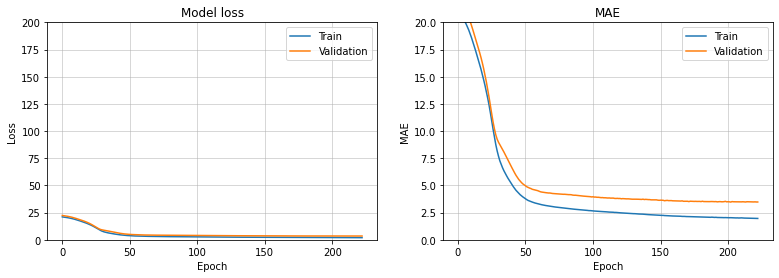

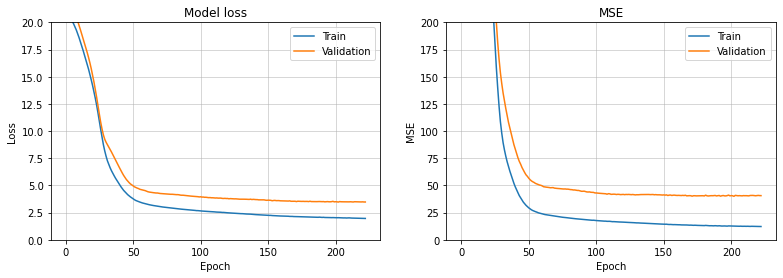

Epoch 1/10000
9/9 [==============================] - 1s 26ms/step - loss: 22.2079 - mae: 22.2079 - mse: 569.6651 - val_loss: 23.5163 - val_mae: 23.5163 - val_mse: 657.7661
Epoch 2/10000
9/9 [==============================] - 0s 6ms/step - loss: 22.1001 - mae: 22.1001 - mse: 565.0791 - val_loss: 23.4306 - val_mae: 23.4306 - val_mse: 654.0322
Epoch 3/10000
9/9 [==============================] - 0s 6ms/step - loss: 22.0123 - mae: 22.0123 - mse: 561.4398 - val_loss: 23.3497 - val_mae: 23.3497 - val_mse: 650.6425
Epoch 4/10000
9/9 [==============================] - 0s 6ms/step - loss: 21.9275 - mae: 21.9275 - mse: 557.9921 - val_loss: 23.2697 - val_mae: 23.2697 - val_mse: 647.3785
Epoch 5/10000
9/9 [==============================] - 0s 5ms/step - loss: 21.8445 - mae: 21.8445 - mse: 554.7780 - val_loss: 23.1941 - val_mae: 23.1941 - val_mse: 644.3121
Epoch 6/10000
9/9 [==============================] - 0s 6ms/step - loss: 21.7630 - mae: 21.7630 - mse: 551.6977 - val_loss: 23.1166 - val_mae: 2

Epoch 49/10000
9/9 [==============================] - 0s 7ms/step - loss: 12.3422 - mae: 12.3422 - mse: 219.7248 - val_loss: 13.9825 - val_mae: 13.9825 - val_mse: 288.2871
Epoch 50/10000
9/9 [==============================] - 0s 7ms/step - loss: 11.9854 - mae: 11.9854 - mse: 208.3033 - val_loss: 13.6275 - val_mae: 13.6275 - val_mse: 276.3610
Epoch 51/10000
9/9 [==============================] - 0s 7ms/step - loss: 11.6166 - mae: 11.6166 - mse: 196.9394 - val_loss: 13.2612 - val_mae: 13.2612 - val_mse: 264.4987
Epoch 52/10000
9/9 [==============================] - 0s 7ms/step - loss: 11.2389 - mae: 11.2389 - mse: 186.0125 - val_loss: 12.8896 - val_mae: 12.8896 - val_mse: 252.8258
Epoch 53/10000
9/9 [==============================] - 0s 7ms/step - loss: 10.8442 - mae: 10.8442 - mse: 174.8574 - val_loss: 12.4795 - val_mae: 12.4795 - val_mse: 240.4119
Epoch 54/10000
9/9 [==============================] - 0s 7ms/step - loss: 10.4402 - mae: 10.4402 - mse: 163.4290 - val_loss: 12.0800 - val_m

Epoch 98/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.0729 - mae: 3.0729 - mse: 21.0596 - val_loss: 4.3593 - val_mae: 4.3593 - val_mse: 53.1493
Epoch 99/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.0560 - mae: 3.0560 - mse: 20.9602 - val_loss: 4.3057 - val_mae: 4.3057 - val_mse: 52.0436
Epoch 100/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.0404 - mae: 3.0404 - mse: 20.6130 - val_loss: 4.2961 - val_mae: 4.2961 - val_mse: 51.8448
Epoch 101/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.0156 - mae: 3.0156 - mse: 20.3971 - val_loss: 4.2708 - val_mae: 4.2708 - val_mse: 51.4798
Epoch 102/10000
9/9 [==============================] - 0s 6ms/step - loss: 2.9949 - mae: 2.9949 - mse: 20.2757 - val_loss: 4.2275 - val_mae: 4.2275 - val_mse: 50.4827
Epoch 103/10000
9/9 [==============================] - 0s 5ms/step - loss: 2.9919 - mae: 2.9919 - mse: 19.9742 - val_loss: 4.2280 - val_mae: 4.2280 - val_mse: 50.5972


9/9 [==============================] - 0s 5ms/step - loss: 2.4776 - mae: 2.4776 - mse: 15.1499 - val_loss: 3.8184 - val_mae: 3.8184 - val_mse: 44.1498
Epoch 148/10000
9/9 [==============================] - 0s 6ms/step - loss: 2.4693 - mae: 2.4693 - mse: 15.0639 - val_loss: 3.7922 - val_mae: 3.7922 - val_mse: 44.4221
Epoch 149/10000
9/9 [==============================] - 0s 6ms/step - loss: 2.4714 - mae: 2.4714 - mse: 15.0223 - val_loss: 3.8013 - val_mae: 3.8013 - val_mse: 44.1262
Epoch 150/10000
9/9 [==============================] - 0s 5ms/step - loss: 2.4559 - mae: 2.4559 - mse: 14.8603 - val_loss: 3.8043 - val_mae: 3.8043 - val_mse: 43.9929
Epoch 151/10000
9/9 [==============================] - 0s 6ms/step - loss: 2.4478 - mae: 2.4478 - mse: 14.9031 - val_loss: 3.7859 - val_mae: 3.7859 - val_mse: 43.6543
Epoch 152/10000
9/9 [==============================] - 0s 6ms/step - loss: 2.4372 - mae: 2.4372 - mse: 14.7887 - val_loss: 3.7784 - val_mae: 3.7784 - val_mse: 43.7328
Epoch 153/1000

9/9 [==============================] - 0s 6ms/step - loss: 2.0788 - mae: 2.0788 - mse: 12.2094 - val_loss: 3.5452 - val_mae: 3.5452 - val_mse: 40.5348
Epoch 246/10000
9/9 [==============================] - 0s 5ms/step - loss: 2.0729 - mae: 2.0729 - mse: 12.1607 - val_loss: 3.5153 - val_mae: 3.5153 - val_mse: 40.0792
Epoch 247/10000
9/9 [==============================] - 0s 5ms/step - loss: 2.0662 - mae: 2.0662 - mse: 12.0994 - val_loss: 3.5268 - val_mae: 3.5268 - val_mse: 40.2229
Epoch 248/10000
9/9 [==============================] - 0s 5ms/step - loss: 2.0721 - mae: 2.0721 - mse: 11.9978 - val_loss: 3.5518 - val_mae: 3.5518 - val_mse: 40.6343
Epoch 249/10000
9/9 [==============================] - 0s 6ms/step - loss: 2.0667 - mae: 2.0667 - mse: 12.0999 - val_loss: 3.5371 - val_mae: 3.5371 - val_mse: 40.5139
Epoch 250/10000
9/9 [==============================] - 0s 6ms/step - loss: 2.0578 - mae: 2.0578 - mse: 12.0427 - val_loss: 3.5510 - val_mae: 3.5510 - val_mse: 40.3934
Epoch 251/1000

9/9 [==============================] - 0s 6ms/step - loss: 1.8920 - mae: 1.8920 - mse: 10.9416 - val_loss: 3.2950 - val_mae: 3.2950 - val_mse: 36.5118
Epoch 344/10000
9/9 [==============================] - 0s 5ms/step - loss: 1.9010 - mae: 1.9010 - mse: 10.8471 - val_loss: 3.3509 - val_mae: 3.3509 - val_mse: 37.0647
Epoch 345/10000
9/9 [==============================] - 0s 5ms/step - loss: 1.8990 - mae: 1.8990 - mse: 11.0350 - val_loss: 3.3107 - val_mae: 3.3107 - val_mse: 36.4573
Epoch 346/10000
9/9 [==============================] - 0s 6ms/step - loss: 1.8946 - mae: 1.8946 - mse: 10.9493 - val_loss: 3.3217 - val_mae: 3.3217 - val_mse: 36.9082
Epoch 347/10000
9/9 [==============================] - 0s 5ms/step - loss: 1.8965 - mae: 1.8965 - mse: 10.9390 - val_loss: 3.3284 - val_mae: 3.3284 - val_mse: 36.7805
Epoch 348/10000
9/9 [==============================] - 0s 5ms/step - loss: 1.8945 - mae: 1.8945 - mse: 10.9544 - val_loss: 3.3360 - val_mae: 3.3360 - val_mse: 36.9166
Epoch 349/1000

9/9 [==============================] - 0s 6ms/step - loss: 1.8118 - mae: 1.8118 - mse: 10.0556 - val_loss: 3.2024 - val_mae: 3.2024 - val_mse: 32.5283
Epoch 442/10000
9/9 [==============================] - 0s 6ms/step - loss: 1.8208 - mae: 1.8208 - mse: 10.0119 - val_loss: 3.2237 - val_mae: 3.2237 - val_mse: 32.8666
Epoch 443/10000
9/9 [==============================] - 0s 5ms/step - loss: 1.8134 - mae: 1.8134 - mse: 9.9741 - val_loss: 3.2149 - val_mae: 3.2149 - val_mse: 32.7322
Epoch 444/10000
9/9 [==============================] - 0s 5ms/step - loss: 1.8023 - mae: 1.8023 - mse: 9.8746 - val_loss: 3.2493 - val_mae: 3.2493 - val_mse: 32.9582
Epoch 445/10000
9/9 [==============================] - 0s 6ms/step - loss: 1.8033 - mae: 1.8033 - mse: 9.9653 - val_loss: 3.1881 - val_mae: 3.1881 - val_mse: 32.6346
Epoch 446/10000
9/9 [==============================] - 0s 6ms/step - loss: 1.8103 - mae: 1.8103 - mse: 9.9801 - val_loss: 3.2140 - val_mae: 3.2140 - val_mse: 32.7309
Epoch 447/10000
9/

9/9 [==============================] - 0s 6ms/step - loss: 1.7459 - mae: 1.7459 - mse: 9.1724 - val_loss: 3.0825 - val_mae: 3.0825 - val_mse: 29.5767
Epoch 540/10000
9/9 [==============================] - 0s 6ms/step - loss: 1.7381 - mae: 1.7381 - mse: 9.1010 - val_loss: 3.1100 - val_mae: 3.1100 - val_mse: 29.9658
Epoch 541/10000
9/9 [==============================] - 0s 5ms/step - loss: 1.7380 - mae: 1.7380 - mse: 9.1955 - val_loss: 3.0863 - val_mae: 3.0863 - val_mse: 29.5506
Epoch 542/10000
9/9 [==============================] - 0s 6ms/step - loss: 1.7420 - mae: 1.7420 - mse: 9.1669 - val_loss: 3.0889 - val_mae: 3.0889 - val_mse: 29.7233
Epoch 543/10000
9/9 [==============================] - 0s 5ms/step - loss: 1.7428 - mae: 1.7428 - mse: 9.1564 - val_loss: 3.0825 - val_mae: 3.0825 - val_mse: 29.6762
Epoch 544/10000
9/9 [==============================] - 0s 5ms/step - loss: 1.7426 - mae: 1.7426 - mse: 9.1500 - val_loss: 3.0763 - val_mae: 3.0763 - val_mse: 29.5534
Epoch 545/10000
9/9 

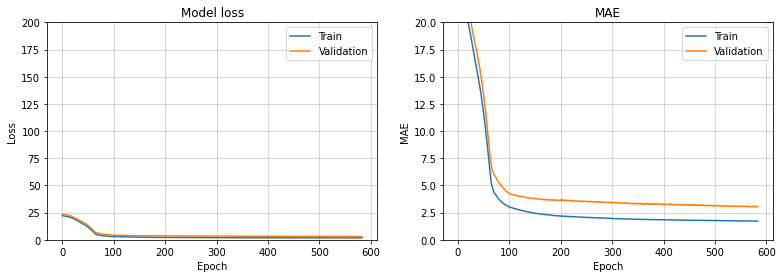

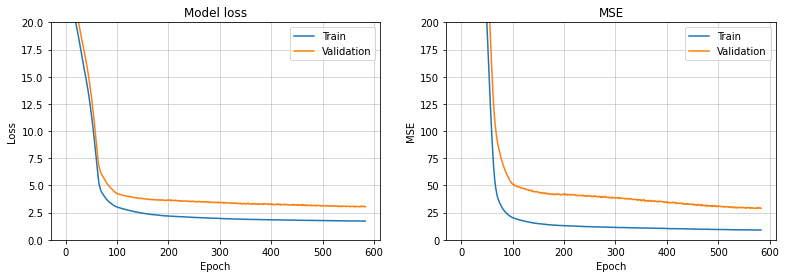

Epoch 1/10000
9/9 [==============================] - 1s 24ms/step - loss: 22.0458 - mae: 22.0458 - mse: 560.9684 - val_loss: 23.3207 - val_mae: 23.3207 - val_mse: 648.0162
Epoch 2/10000
9/9 [==============================] - 0s 6ms/step - loss: 21.8661 - mae: 21.8661 - mse: 553.3038 - val_loss: 23.1485 - val_mae: 23.1485 - val_mse: 639.8259
Epoch 3/10000
9/9 [==============================] - 0s 6ms/step - loss: 21.6929 - mae: 21.6929 - mse: 545.7949 - val_loss: 22.9770 - val_mae: 22.9770 - val_mse: 631.6409
Epoch 4/10000
9/9 [==============================] - 0s 6ms/step - loss: 21.5196 - mae: 21.5196 - mse: 538.2819 - val_loss: 22.8011 - val_mae: 22.8011 - val_mse: 623.2417
Epoch 5/10000
9/9 [==============================] - 0s 5ms/step - loss: 21.3393 - mae: 21.3393 - mse: 530.4906 - val_loss: 22.6145 - val_mae: 22.6145 - val_mse: 614.3851
Epoch 6/10000
9/9 [==============================] - 0s 6ms/step - loss: 21.1449 - mae: 21.1449 - mse: 521.9851 - val_loss: 22.4070 - val_mae: 2

Epoch 50/10000
9/9 [==============================] - 0s 6ms/step - loss: 2.1985 - mae: 2.1985 - mse: 13.8794 - val_loss: 3.1201 - val_mae: 3.1201 - val_mse: 32.4782
Epoch 51/10000
9/9 [==============================] - 0s 6ms/step - loss: 2.2018 - mae: 2.2018 - mse: 13.8212 - val_loss: 3.0666 - val_mae: 3.0666 - val_mse: 32.9382
Epoch 52/10000
9/9 [==============================] - 0s 6ms/step - loss: 2.1678 - mae: 2.1678 - mse: 13.4628 - val_loss: 3.1137 - val_mae: 3.1137 - val_mse: 33.8660
Epoch 53/10000
9/9 [==============================] - 0s 5ms/step - loss: 2.1094 - mae: 2.1094 - mse: 13.4351 - val_loss: 3.1117 - val_mae: 3.1117 - val_mse: 32.4075
Epoch 54/10000
9/9 [==============================] - 0s 6ms/step - loss: 2.1267 - mae: 2.1267 - mse: 13.3361 - val_loss: 2.9546 - val_mae: 2.9546 - val_mse: 30.3770
Epoch 55/10000
9/9 [==============================] - 0s 6ms/step - loss: 2.1081 - mae: 2.1081 - mse: 12.5107 - val_loss: 3.0035 - val_mae: 3.0035 - val_mse: 32.5738
Epoc

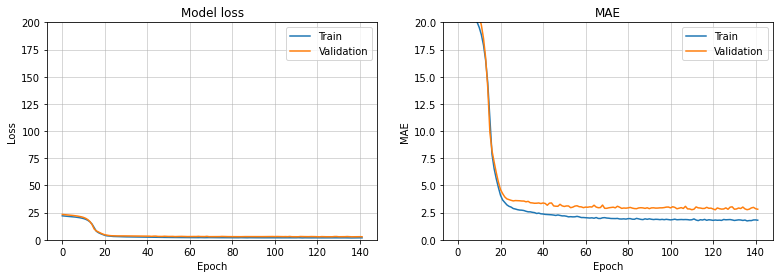

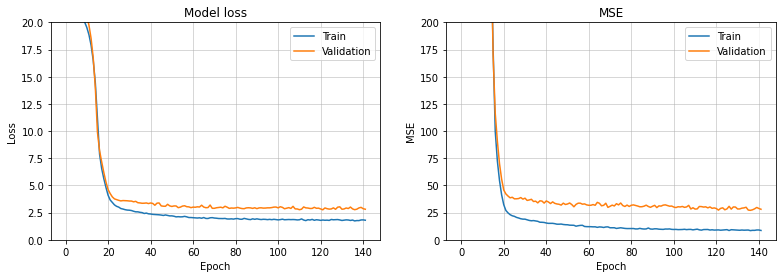

Epoch 1/10000
9/9 [==============================] - 1s 22ms/step - loss: 22.7477 - mae: 22.7477 - mse: 585.8900 - val_loss: 24.1407 - val_mae: 24.1407 - val_mse: 681.2557
Epoch 2/10000
9/9 [==============================] - 0s 6ms/step - loss: 22.6262 - mae: 22.6262 - mse: 580.0236 - val_loss: 24.0472 - val_mae: 24.0472 - val_mse: 676.5067
Epoch 3/10000
9/9 [==============================] - 0s 6ms/step - loss: 22.5417 - mae: 22.5417 - mse: 576.0112 - val_loss: 23.9746 - val_mae: 23.9746 - val_mse: 672.8333
Epoch 4/10000
9/9 [==============================] - 0s 6ms/step - loss: 22.4736 - mae: 22.4736 - mse: 572.7747 - val_loss: 23.9129 - val_mae: 23.9129 - val_mse: 669.7151
Epoch 5/10000
9/9 [==============================] - 0s 5ms/step - loss: 22.4145 - mae: 22.4145 - mse: 569.9564 - val_loss: 23.8578 - val_mae: 23.8578 - val_mse: 666.9357
Epoch 6/10000
9/9 [==============================] - 0s 5ms/step - loss: 22.3615 - mae: 22.3615 - mse: 567.4252 - val_loss: 23.8083 - val_mae: 2

Epoch 49/10000
9/9 [==============================] - 0s 6ms/step - loss: 21.3521 - mae: 21.3521 - mse: 521.5442 - val_loss: 22.8209 - val_mae: 22.8209 - val_mse: 616.2083
Epoch 50/10000
9/9 [==============================] - 0s 6ms/step - loss: 21.3370 - mae: 21.3370 - mse: 520.8818 - val_loss: 22.8060 - val_mae: 22.8060 - val_mse: 615.5049
Epoch 51/10000
9/9 [==============================] - 0s 6ms/step - loss: 21.3222 - mae: 21.3222 - mse: 520.2277 - val_loss: 22.7913 - val_mae: 22.7913 - val_mse: 614.8082
Epoch 52/10000
9/9 [==============================] - 0s 6ms/step - loss: 21.3074 - mae: 21.3074 - mse: 519.5817 - val_loss: 22.7769 - val_mae: 22.7769 - val_mse: 614.1219
Epoch 53/10000
9/9 [==============================] - 0s 6ms/step - loss: 21.2930 - mae: 21.2930 - mse: 518.9427 - val_loss: 22.7626 - val_mae: 22.7626 - val_mse: 613.4445
Epoch 54/10000
9/9 [==============================] - 0s 5ms/step - loss: 21.2786 - mae: 21.2786 - mse: 518.3117 - val_loss: 22.7484 - val_m

9/9 [==============================] - 0s 6ms/step - loss: 20.3284 - mae: 20.3284 - mse: 476.9434 - val_loss: 21.7926 - val_mae: 21.7926 - val_mse: 567.9081
Epoch 144/10000
9/9 [==============================] - 0s 6ms/step - loss: 20.3197 - mae: 20.3197 - mse: 476.5748 - val_loss: 21.7838 - val_mae: 21.7838 - val_mse: 567.5037
Epoch 145/10000
9/9 [==============================] - 0s 6ms/step - loss: 20.3112 - mae: 20.3112 - mse: 476.2040 - val_loss: 21.7751 - val_mae: 21.7751 - val_mse: 567.1002
Epoch 146/10000
9/9 [==============================] - 0s 6ms/step - loss: 20.3026 - mae: 20.3026 - mse: 475.8371 - val_loss: 21.7665 - val_mae: 21.7665 - val_mse: 566.6976
Epoch 147/10000
9/9 [==============================] - 0s 5ms/step - loss: 20.2941 - mae: 20.2941 - mse: 475.4639 - val_loss: 21.7578 - val_mae: 21.7578 - val_mse: 566.2951
Epoch 148/10000
9/9 [==============================] - 0s 5ms/step - loss: 20.2855 - mae: 20.2855 - mse: 475.1001 - val_loss: 21.7491 - val_mae: 21.749

9/9 [==============================] - 0s 6ms/step - loss: 19.6045 - mae: 19.6045 - mse: 446.1014 - val_loss: 21.0626 - val_mae: 21.0626 - val_mse: 534.3145
Epoch 238/10000
9/9 [==============================] - 0s 6ms/step - loss: 19.5974 - mae: 19.5974 - mse: 445.8062 - val_loss: 21.0555 - val_mae: 21.0555 - val_mse: 533.9930
Epoch 239/10000
9/9 [==============================] - 0s 5ms/step - loss: 19.5904 - mae: 19.5904 - mse: 445.5132 - val_loss: 21.0484 - val_mae: 21.0484 - val_mse: 533.6722
Epoch 240/10000
9/9 [==============================] - 0s 6ms/step - loss: 19.5833 - mae: 19.5833 - mse: 445.2147 - val_loss: 21.0413 - val_mae: 21.0413 - val_mse: 533.3502
Epoch 241/10000
9/9 [==============================] - 0s 5ms/step - loss: 19.5763 - mae: 19.5763 - mse: 444.9212 - val_loss: 21.0342 - val_mae: 21.0342 - val_mse: 533.0273
Epoch 242/10000
9/9 [==============================] - 0s 5ms/step - loss: 19.5692 - mae: 19.5692 - mse: 444.6235 - val_loss: 21.0271 - val_mae: 21.027

9/9 [==============================] - 0s 6ms/step - loss: 18.9677 - mae: 18.9677 - mse: 419.8674 - val_loss: 20.4264 - val_mae: 20.4264 - val_mse: 505.8726
Epoch 332/10000
9/9 [==============================] - 0s 6ms/step - loss: 18.9612 - mae: 18.9612 - mse: 419.6078 - val_loss: 20.4199 - val_mae: 20.4199 - val_mse: 505.5866
Epoch 333/10000
9/9 [==============================] - 0s 5ms/step - loss: 18.9547 - mae: 18.9547 - mse: 419.3407 - val_loss: 20.4133 - val_mae: 20.4133 - val_mse: 505.3003
Epoch 334/10000
9/9 [==============================] - 0s 6ms/step - loss: 18.9482 - mae: 18.9482 - mse: 419.0754 - val_loss: 20.4068 - val_mae: 20.4068 - val_mse: 505.0144
Epoch 335/10000
9/9 [==============================] - 0s 6ms/step - loss: 18.9416 - mae: 18.9416 - mse: 418.8130 - val_loss: 20.4003 - val_mae: 20.4003 - val_mse: 504.7302
Epoch 336/10000
9/9 [==============================] - 0s 7ms/step - loss: 18.9352 - mae: 18.9352 - mse: 418.5536 - val_loss: 20.3938 - val_mae: 20.393

9/9 [==============================] - 0s 6ms/step - loss: 18.3728 - mae: 18.3728 - mse: 395.9969 - val_loss: 19.8263 - val_mae: 19.8263 - val_mse: 479.9673
Epoch 426/10000
9/9 [==============================] - 0s 6ms/step - loss: 18.3667 - mae: 18.3667 - mse: 395.7566 - val_loss: 19.8201 - val_mae: 19.8201 - val_mse: 479.7017
Epoch 427/10000
9/9 [==============================] - 0s 6ms/step - loss: 18.3605 - mae: 18.3605 - mse: 395.5107 - val_loss: 19.8138 - val_mae: 19.8138 - val_mse: 479.4360
Epoch 428/10000
9/9 [==============================] - 0s 6ms/step - loss: 18.3543 - mae: 18.3543 - mse: 395.2664 - val_loss: 19.8076 - val_mae: 19.8076 - val_mse: 479.1716
Epoch 429/10000
9/9 [==============================] - 0s 5ms/step - loss: 18.3482 - mae: 18.3482 - mse: 395.0259 - val_loss: 19.8014 - val_mae: 19.8014 - val_mse: 478.9076
Epoch 430/10000
9/9 [==============================] - 0s 5ms/step - loss: 18.3421 - mae: 18.3421 - mse: 394.7806 - val_loss: 19.7951 - val_mae: 19.795

9/9 [==============================] - 0s 6ms/step - loss: 17.7952 - mae: 17.7952 - mse: 373.6637 - val_loss: 19.2428 - val_mae: 19.2428 - val_mse: 455.7017
Epoch 520/10000
9/9 [==============================] - 0s 5ms/step - loss: 17.7890 - mae: 17.7890 - mse: 373.4292 - val_loss: 19.2366 - val_mae: 19.2366 - val_mse: 455.4483
Epoch 521/10000
9/9 [==============================] - 0s 5ms/step - loss: 17.7828 - mae: 17.7828 - mse: 373.1937 - val_loss: 19.2303 - val_mae: 19.2303 - val_mse: 455.1951
Epoch 522/10000
9/9 [==============================] - 0s 6ms/step - loss: 17.7766 - mae: 17.7766 - mse: 372.9596 - val_loss: 19.2241 - val_mae: 19.2241 - val_mse: 454.9422
Epoch 523/10000
9/9 [==============================] - 0s 5ms/step - loss: 17.7704 - mae: 17.7704 - mse: 372.7244 - val_loss: 19.2179 - val_mae: 19.2179 - val_mse: 454.6889
Epoch 524/10000
9/9 [==============================] - 0s 6ms/step - loss: 17.7642 - mae: 17.7642 - mse: 372.4929 - val_loss: 19.2116 - val_mae: 19.211

9/9 [==============================] - 0s 6ms/step - loss: 17.2135 - mae: 17.2135 - mse: 351.9512 - val_loss: 18.6525 - val_mae: 18.6525 - val_mse: 432.1530
Epoch 614/10000
9/9 [==============================] - 0s 5ms/step - loss: 17.2073 - mae: 17.2073 - mse: 351.7233 - val_loss: 18.6462 - val_mae: 18.6462 - val_mse: 431.9060
Epoch 615/10000
9/9 [==============================] - 0s 5ms/step - loss: 17.2011 - mae: 17.2011 - mse: 351.4959 - val_loss: 18.6398 - val_mae: 18.6398 - val_mse: 431.6581
Epoch 616/10000
9/9 [==============================] - 0s 5ms/step - loss: 17.1949 - mae: 17.1949 - mse: 351.2686 - val_loss: 18.6335 - val_mae: 18.6335 - val_mse: 431.4110
Epoch 617/10000
9/9 [==============================] - 0s 5ms/step - loss: 17.1887 - mae: 17.1887 - mse: 351.0426 - val_loss: 18.6272 - val_mae: 18.6272 - val_mse: 431.1652
Epoch 618/10000
9/9 [==============================] - 0s 5ms/step - loss: 17.1826 - mae: 17.1826 - mse: 350.8153 - val_loss: 18.6209 - val_mae: 18.620

9/9 [==============================] - 0s 7ms/step - loss: 16.6245 - mae: 16.6245 - mse: 330.7547 - val_loss: 18.0504 - val_mae: 18.0504 - val_mse: 409.1478
Epoch 708/10000
9/9 [==============================] - 0s 8ms/step - loss: 16.6181 - mae: 16.6181 - mse: 330.5302 - val_loss: 18.0438 - val_mae: 18.0438 - val_mse: 408.9034
Epoch 709/10000
9/9 [==============================] - 0s 7ms/step - loss: 16.6117 - mae: 16.6117 - mse: 330.3026 - val_loss: 18.0373 - val_mae: 18.0373 - val_mse: 408.6590
Epoch 710/10000
9/9 [==============================] - 0s 6ms/step - loss: 16.6053 - mae: 16.6053 - mse: 330.0778 - val_loss: 18.0308 - val_mae: 18.0308 - val_mse: 408.4160
Epoch 711/10000
9/9 [==============================] - 0s 6ms/step - loss: 16.5989 - mae: 16.5989 - mse: 329.8535 - val_loss: 18.0243 - val_mae: 18.0243 - val_mse: 408.1718
Epoch 712/10000
9/9 [==============================] - 0s 6ms/step - loss: 16.5925 - mae: 16.5925 - mse: 329.6286 - val_loss: 18.0177 - val_mae: 18.017

9/9 [==============================] - 0s 6ms/step - loss: 16.0129 - mae: 16.0129 - mse: 309.7722 - val_loss: 17.4395 - val_mae: 17.4395 - val_mse: 386.5057
Epoch 802/10000
9/9 [==============================] - 0s 6ms/step - loss: 16.0062 - mae: 16.0062 - mse: 309.5542 - val_loss: 17.4329 - val_mae: 17.4329 - val_mse: 386.2670
Epoch 803/10000
9/9 [==============================] - 0s 6ms/step - loss: 15.9996 - mae: 15.9996 - mse: 309.3334 - val_loss: 17.4263 - val_mae: 17.4263 - val_mse: 386.0270
Epoch 804/10000
9/9 [==============================] - 0s 6ms/step - loss: 15.9929 - mae: 15.9929 - mse: 309.1108 - val_loss: 17.4197 - val_mae: 17.4197 - val_mse: 385.7868
Epoch 805/10000
9/9 [==============================] - 0s 6ms/step - loss: 15.9862 - mae: 15.9862 - mse: 308.8838 - val_loss: 17.4131 - val_mae: 17.4131 - val_mse: 385.5464
Epoch 806/10000
9/9 [==============================] - 0s 5ms/step - loss: 15.9795 - mae: 15.9795 - mse: 308.6617 - val_loss: 17.4065 - val_mae: 17.406

9/9 [==============================] - 0s 5ms/step - loss: 15.3730 - mae: 15.3730 - mse: 288.9243 - val_loss: 16.8044 - val_mae: 16.8044 - val_mse: 364.0937
Epoch 896/10000
9/9 [==============================] - 0s 6ms/step - loss: 15.3661 - mae: 15.3661 - mse: 288.7043 - val_loss: 16.7976 - val_mae: 16.7976 - val_mse: 363.8578
Epoch 897/10000
9/9 [==============================] - 0s 5ms/step - loss: 15.3592 - mae: 15.3592 - mse: 288.4831 - val_loss: 16.7907 - val_mae: 16.7907 - val_mse: 363.6223
Epoch 898/10000
9/9 [==============================] - 0s 5ms/step - loss: 15.3524 - mae: 15.3524 - mse: 288.2617 - val_loss: 16.7838 - val_mae: 16.7838 - val_mse: 363.3858
Epoch 899/10000
9/9 [==============================] - 0s 6ms/step - loss: 15.3455 - mae: 15.3455 - mse: 288.0444 - val_loss: 16.7768 - val_mae: 16.7768 - val_mse: 363.1496
Epoch 900/10000
9/9 [==============================] - 0s 6ms/step - loss: 15.3386 - mae: 15.3386 - mse: 287.8232 - val_loss: 16.7699 - val_mae: 16.769

9/9 [==============================] - 0s 8ms/step - loss: 14.7178 - mae: 14.7178 - mse: 268.4486 - val_loss: 16.1409 - val_mae: 16.1409 - val_mse: 342.0383
Epoch 990/10000
9/9 [==============================] - 0s 7ms/step - loss: 14.7107 - mae: 14.7107 - mse: 268.2416 - val_loss: 16.1337 - val_mae: 16.1337 - val_mse: 341.8058
Epoch 991/10000
9/9 [==============================] - 0s 6ms/step - loss: 14.7037 - mae: 14.7037 - mse: 268.0246 - val_loss: 16.1265 - val_mae: 16.1265 - val_mse: 341.5732
Epoch 992/10000
9/9 [==============================] - 0s 6ms/step - loss: 14.6966 - mae: 14.6966 - mse: 267.8123 - val_loss: 16.1193 - val_mae: 16.1193 - val_mse: 341.3404
Epoch 993/10000
9/9 [==============================] - 0s 7ms/step - loss: 14.6894 - mae: 14.6894 - mse: 267.5940 - val_loss: 16.1121 - val_mae: 16.1121 - val_mse: 341.1091
Epoch 994/10000
9/9 [==============================] - 0s 6ms/step - loss: 14.6824 - mae: 14.6824 - mse: 267.3816 - val_loss: 16.1048 - val_mae: 16.104

9/9 [==============================] - 0s 6ms/step - loss: 14.0378 - mae: 14.0378 - mse: 248.4659 - val_loss: 15.4489 - val_mae: 15.4489 - val_mse: 320.4352
Epoch 1084/10000
9/9 [==============================] - 0s 5ms/step - loss: 14.0305 - mae: 14.0305 - mse: 248.2583 - val_loss: 15.4415 - val_mae: 15.4415 - val_mse: 320.2107
Epoch 1085/10000
9/9 [==============================] - 0s 5ms/step - loss: 14.0233 - mae: 14.0233 - mse: 248.0547 - val_loss: 15.4340 - val_mae: 15.4340 - val_mse: 319.9856
Epoch 1086/10000
9/9 [==============================] - 0s 5ms/step - loss: 14.0160 - mae: 14.0160 - mse: 247.8479 - val_loss: 15.4266 - val_mae: 15.4266 - val_mse: 319.7608
Epoch 1087/10000
9/9 [==============================] - 0s 5ms/step - loss: 14.0087 - mae: 14.0087 - mse: 247.6382 - val_loss: 15.4191 - val_mae: 15.4191 - val_mse: 319.5354
Epoch 1088/10000
9/9 [==============================] - 0s 5ms/step - loss: 14.0015 - mae: 14.0015 - mse: 247.4281 - val_loss: 15.4117 - val_mae: 1

Epoch 1130/10000
9/9 [==============================] - 0s 9ms/step - loss: 13.6979 - mae: 13.6979 - mse: 238.8306 - val_loss: 15.0977 - val_mae: 15.0977 - val_mse: 309.9974
Epoch 1131/10000
9/9 [==============================] - 0s 10ms/step - loss: 13.6907 - mae: 13.6907 - mse: 238.6246 - val_loss: 15.0902 - val_mae: 15.0902 - val_mse: 309.7788
Epoch 1132/10000
9/9 [==============================] - 0s 8ms/step - loss: 13.6835 - mae: 13.6835 - mse: 238.4223 - val_loss: 15.0827 - val_mae: 15.0827 - val_mse: 309.5599
Epoch 1133/10000
9/9 [==============================] - 0s 6ms/step - loss: 13.6762 - mae: 13.6762 - mse: 238.2210 - val_loss: 15.0752 - val_mae: 15.0752 - val_mse: 309.3407
Epoch 1134/10000
9/9 [==============================] - 0s 6ms/step - loss: 13.6690 - mae: 13.6690 - mse: 238.0190 - val_loss: 15.0676 - val_mae: 15.0676 - val_mse: 309.1211
Epoch 1135/10000
9/9 [==============================] - 0s 6ms/step - loss: 13.6617 - mae: 13.6617 - mse: 237.8126 - val_loss: 15

9/9 [==============================] - 0s 6ms/step - loss: 13.3581 - mae: 13.3581 - mse: 229.4244 - val_loss: 14.7456 - val_mae: 14.7456 - val_mse: 299.7716
Epoch 1178/10000
9/9 [==============================] - 0s 7ms/step - loss: 13.3509 - mae: 13.3509 - mse: 229.2254 - val_loss: 14.7382 - val_mae: 14.7382 - val_mse: 299.5556
Epoch 1179/10000
9/9 [==============================] - 0s 6ms/step - loss: 13.3438 - mae: 13.3438 - mse: 229.0291 - val_loss: 14.7308 - val_mae: 14.7308 - val_mse: 299.3420
Epoch 1180/10000
9/9 [==============================] - 0s 8ms/step - loss: 13.3368 - mae: 13.3368 - mse: 228.8372 - val_loss: 14.7234 - val_mae: 14.7234 - val_mse: 299.1293
Epoch 1181/10000
9/9 [==============================] - 0s 7ms/step - loss: 13.3298 - mae: 13.3298 - mse: 228.6404 - val_loss: 14.7160 - val_mae: 14.7160 - val_mse: 298.9157
Epoch 1182/10000
9/9 [==============================] - 0s 6ms/step - loss: 13.3228 - mae: 13.3228 - mse: 228.4476 - val_loss: 14.7086 - val_mae: 1

9/9 [==============================] - 0s 7ms/step - loss: 12.6900 - mae: 12.6900 - mse: 211.4930 - val_loss: 14.0404 - val_mae: 14.0404 - val_mse: 280.0363
Epoch 1272/10000
9/9 [==============================] - 0s 7ms/step - loss: 12.6827 - mae: 12.6827 - mse: 211.3066 - val_loss: 14.0327 - val_mae: 14.0327 - val_mse: 279.8304
Epoch 1273/10000
9/9 [==============================] - 0s 7ms/step - loss: 12.6755 - mae: 12.6755 - mse: 211.1198 - val_loss: 14.0251 - val_mae: 14.0251 - val_mse: 279.6239
Epoch 1274/10000
9/9 [==============================] - 0s 6ms/step - loss: 12.6682 - mae: 12.6682 - mse: 210.9300 - val_loss: 14.0174 - val_mae: 14.0174 - val_mse: 279.4167
Epoch 1275/10000
9/9 [==============================] - 0s 7ms/step - loss: 12.6609 - mae: 12.6609 - mse: 210.7446 - val_loss: 14.0097 - val_mae: 14.0097 - val_mse: 279.2110
Epoch 1276/10000
9/9 [==============================] - 0s 7ms/step - loss: 12.6537 - mae: 12.6537 - mse: 210.5578 - val_loss: 14.0021 - val_mae: 1

9/9 [==============================] - 0s 5ms/step - loss: 12.0455 - mae: 12.0455 - mse: 194.8772 - val_loss: 13.3518 - val_mae: 13.3518 - val_mse: 261.6085
Epoch 1366/10000
9/9 [==============================] - 0s 6ms/step - loss: 12.0392 - mae: 12.0392 - mse: 194.7100 - val_loss: 13.3449 - val_mae: 13.3449 - val_mse: 261.4266
Epoch 1367/10000
9/9 [==============================] - 0s 6ms/step - loss: 12.0331 - mae: 12.0331 - mse: 194.5497 - val_loss: 13.3381 - val_mae: 13.3381 - val_mse: 261.2455
Epoch 1368/10000
9/9 [==============================] - 0s 6ms/step - loss: 12.0269 - mae: 12.0269 - mse: 194.3823 - val_loss: 13.3313 - val_mae: 13.3313 - val_mse: 261.0646
Epoch 1369/10000
9/9 [==============================] - 0s 5ms/step - loss: 12.0208 - mae: 12.0208 - mse: 194.2234 - val_loss: 13.3244 - val_mae: 13.3244 - val_mse: 260.8829
Epoch 1370/10000
9/9 [==============================] - 0s 5ms/step - loss: 12.0147 - mae: 12.0147 - mse: 194.0644 - val_loss: 13.3176 - val_mae: 1

9/9 [==============================] - 0s 6ms/step - loss: 11.4666 - mae: 11.4666 - mse: 180.0423 - val_loss: 12.7261 - val_mae: 12.7261 - val_mse: 245.0164
Epoch 1460/10000
9/9 [==============================] - 0s 6ms/step - loss: 11.4604 - mae: 11.4604 - mse: 179.8864 - val_loss: 12.7196 - val_mae: 12.7196 - val_mse: 244.8445
Epoch 1461/10000
9/9 [==============================] - 0s 6ms/step - loss: 11.4542 - mae: 11.4542 - mse: 179.7296 - val_loss: 12.7131 - val_mae: 12.7131 - val_mse: 244.6737
Epoch 1462/10000
9/9 [==============================] - 0s 6ms/step - loss: 11.4479 - mae: 11.4479 - mse: 179.5791 - val_loss: 12.7066 - val_mae: 12.7066 - val_mse: 244.5025
Epoch 1463/10000
9/9 [==============================] - 0s 7ms/step - loss: 11.4417 - mae: 11.4417 - mse: 179.4313 - val_loss: 12.7001 - val_mae: 12.7001 - val_mse: 244.3302
Epoch 1464/10000
9/9 [==============================] - 0s 6ms/step - loss: 11.4355 - mae: 11.4355 - mse: 179.2740 - val_loss: 12.6936 - val_mae: 1

9/9 [==============================] - 0s 5ms/step - loss: 10.8898 - mae: 10.8898 - mse: 166.2057 - val_loss: 12.1248 - val_mae: 12.1248 - val_mse: 229.4261
Epoch 1554/10000
9/9 [==============================] - 0s 6ms/step - loss: 10.8839 - mae: 10.8839 - mse: 166.0670 - val_loss: 12.1186 - val_mae: 12.1186 - val_mse: 229.2673
Epoch 1555/10000
9/9 [==============================] - 0s 5ms/step - loss: 10.8780 - mae: 10.8780 - mse: 165.9252 - val_loss: 12.1125 - val_mae: 12.1125 - val_mse: 229.1111
Epoch 1556/10000
9/9 [==============================] - 0s 6ms/step - loss: 10.8722 - mae: 10.8722 - mse: 165.7881 - val_loss: 12.1064 - val_mae: 12.1064 - val_mse: 228.9562
Epoch 1557/10000
9/9 [==============================] - 0s 6ms/step - loss: 10.8663 - mae: 10.8663 - mse: 165.6566 - val_loss: 12.1003 - val_mae: 12.1003 - val_mse: 228.7992
Epoch 1558/10000
9/9 [==============================] - 0s 6ms/step - loss: 10.8605 - mae: 10.8605 - mse: 165.5138 - val_loss: 12.0941 - val_mae: 1

9/9 [==============================] - 0s 6ms/step - loss: 10.3634 - mae: 10.3634 - mse: 153.8886 - val_loss: 11.5823 - val_mae: 11.5823 - val_mse: 215.4371
Epoch 1648/10000
9/9 [==============================] - 0s 7ms/step - loss: 10.3580 - mae: 10.3580 - mse: 153.7651 - val_loss: 11.5772 - val_mae: 11.5772 - val_mse: 215.2941
Epoch 1649/10000
9/9 [==============================] - 0s 6ms/step - loss: 10.3525 - mae: 10.3525 - mse: 153.6380 - val_loss: 11.5722 - val_mae: 11.5722 - val_mse: 215.1513
Epoch 1650/10000
9/9 [==============================] - 0s 6ms/step - loss: 10.3470 - mae: 10.3470 - mse: 153.5150 - val_loss: 11.5671 - val_mae: 11.5671 - val_mse: 215.0082
Epoch 1651/10000
9/9 [==============================] - 0s 5ms/step - loss: 10.3416 - mae: 10.3416 - mse: 153.3918 - val_loss: 11.5621 - val_mae: 11.5621 - val_mse: 214.8671
Epoch 1652/10000
9/9 [==============================] - 0s 5ms/step - loss: 10.3362 - mae: 10.3362 - mse: 153.2675 - val_loss: 11.5570 - val_mae: 1

9/9 [==============================] - 0s 6ms/step - loss: 9.8727 - mae: 9.8727 - mse: 142.7881 - val_loss: 11.1390 - val_mae: 11.1390 - val_mse: 202.8482
Epoch 1742/10000
9/9 [==============================] - 0s 6ms/step - loss: 9.8676 - mae: 9.8676 - mse: 142.6792 - val_loss: 11.1344 - val_mae: 11.1344 - val_mse: 202.7213
Epoch 1743/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.8625 - mae: 9.8625 - mse: 142.5657 - val_loss: 11.1299 - val_mae: 11.1299 - val_mse: 202.5939
Epoch 1744/10000
9/9 [==============================] - 0s 6ms/step - loss: 9.8574 - mae: 9.8574 - mse: 142.4532 - val_loss: 11.1253 - val_mae: 11.1253 - val_mse: 202.4669
Epoch 1745/10000
9/9 [==============================] - 0s 6ms/step - loss: 9.8523 - mae: 9.8523 - mse: 142.3394 - val_loss: 11.1207 - val_mae: 11.1207 - val_mse: 202.3392
Epoch 1746/10000
9/9 [==============================] - 0s 6ms/step - loss: 9.8472 - mae: 9.8472 - mse: 142.2274 - val_loss: 11.1161 - val_mae: 11.1161 - val

Epoch 1789/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.6348 - mae: 9.6348 - mse: 137.5656 - val_loss: 10.9287 - val_mae: 10.9287 - val_mse: 196.9214
Epoch 1790/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.6302 - mae: 9.6302 - mse: 137.4604 - val_loss: 10.9245 - val_mae: 10.9245 - val_mse: 196.8035
Epoch 1791/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.6256 - mae: 9.6256 - mse: 137.3590 - val_loss: 10.9202 - val_mae: 10.9202 - val_mse: 196.6854
Epoch 1792/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.6210 - mae: 9.6210 - mse: 137.2550 - val_loss: 10.9160 - val_mae: 10.9160 - val_mse: 196.5673
Epoch 1793/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.6164 - mae: 9.6164 - mse: 137.1514 - val_loss: 10.9119 - val_mae: 10.9119 - val_mse: 196.4506
Epoch 1794/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.6119 - mae: 9.6119 - mse: 137.0502 - val_loss: 10.9077 - val_m

Epoch 1837/10000
9/9 [==============================] - 0s 6ms/step - loss: 9.4279 - mae: 9.4279 - mse: 132.8646 - val_loss: 10.7366 - val_mae: 10.7366 - val_mse: 191.5463
Epoch 1838/10000
9/9 [==============================] - 0s 6ms/step - loss: 9.4239 - mae: 9.4239 - mse: 132.7751 - val_loss: 10.7328 - val_mae: 10.7328 - val_mse: 191.4406
Epoch 1839/10000
9/9 [==============================] - 0s 6ms/step - loss: 9.4199 - mae: 9.4199 - mse: 132.6762 - val_loss: 10.7290 - val_mae: 10.7290 - val_mse: 191.3356
Epoch 1840/10000
9/9 [==============================] - 0s 6ms/step - loss: 9.4159 - mae: 9.4159 - mse: 132.5831 - val_loss: 10.7252 - val_mae: 10.7252 - val_mse: 191.2306
Epoch 1841/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.4119 - mae: 9.4119 - mse: 132.4941 - val_loss: 10.7214 - val_mae: 10.7214 - val_mse: 191.1258
Epoch 1842/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.4079 - mae: 9.4079 - mse: 132.4024 - val_loss: 10.7176 - val_m

Epoch 1885/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.2377 - mae: 9.2377 - mse: 128.5139 - val_loss: 10.5557 - val_mae: 10.5557 - val_mse: 186.6103
Epoch 1886/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.2337 - mae: 9.2337 - mse: 128.4240 - val_loss: 10.5521 - val_mae: 10.5521 - val_mse: 186.5097
Epoch 1887/10000
9/9 [==============================] - 0s 6ms/step - loss: 9.2297 - mae: 9.2297 - mse: 128.3347 - val_loss: 10.5484 - val_mae: 10.5484 - val_mse: 186.4077
Epoch 1888/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.2257 - mae: 9.2257 - mse: 128.2437 - val_loss: 10.5447 - val_mae: 10.5447 - val_mse: 186.3054
Epoch 1889/10000
9/9 [==============================] - 0s 6ms/step - loss: 9.2217 - mae: 9.2217 - mse: 128.1531 - val_loss: 10.5410 - val_mae: 10.5410 - val_mse: 186.2042
Epoch 1890/10000
9/9 [==============================] - 0s 6ms/step - loss: 9.2177 - mae: 9.2177 - mse: 128.0664 - val_loss: 10.5374 - val_m

Epoch 1933/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.0485 - mae: 9.0485 - mse: 124.3159 - val_loss: 10.3805 - val_mae: 10.3805 - val_mse: 181.8366
Epoch 1934/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.0447 - mae: 9.0447 - mse: 124.2305 - val_loss: 10.3770 - val_mae: 10.3770 - val_mse: 181.7404
Epoch 1935/10000
9/9 [==============================] - 0s 5ms/step - loss: 9.0408 - mae: 9.0408 - mse: 124.1475 - val_loss: 10.3734 - val_mae: 10.3734 - val_mse: 181.6429
Epoch 1936/10000
9/9 [==============================] - 0s 6ms/step - loss: 9.0370 - mae: 9.0370 - mse: 124.0629 - val_loss: 10.3699 - val_mae: 10.3699 - val_mse: 181.5466
Epoch 1937/10000
9/9 [==============================] - 0s 6ms/step - loss: 9.0332 - mae: 9.0332 - mse: 123.9764 - val_loss: 10.3664 - val_mae: 10.3664 - val_mse: 181.4496
Epoch 1938/10000
9/9 [==============================] - 0s 6ms/step - loss: 9.0293 - mae: 9.0293 - mse: 123.8898 - val_loss: 10.3629 - val_m

Epoch 1981/10000
9/9 [==============================] - 0s 7ms/step - loss: 8.8681 - mae: 8.8681 - mse: 120.3563 - val_loss: 10.2183 - val_mae: 10.2183 - val_mse: 177.2966
Epoch 1982/10000
9/9 [==============================] - 0s 5ms/step - loss: 8.8646 - mae: 8.8646 - mse: 120.2771 - val_loss: 10.2151 - val_mae: 10.2151 - val_mse: 177.2065
Epoch 1983/10000
9/9 [==============================] - 0s 5ms/step - loss: 8.8610 - mae: 8.8610 - mse: 120.1989 - val_loss: 10.2118 - val_mae: 10.2118 - val_mse: 177.1152
Epoch 1984/10000
9/9 [==============================] - 0s 6ms/step - loss: 8.8574 - mae: 8.8574 - mse: 120.1195 - val_loss: 10.2085 - val_mae: 10.2085 - val_mse: 177.0244
Epoch 1985/10000
9/9 [==============================] - 0s 6ms/step - loss: 8.8539 - mae: 8.8539 - mse: 120.0409 - val_loss: 10.2053 - val_mae: 10.2053 - val_mse: 176.9333
Epoch 1986/10000
9/9 [==============================] - 0s 6ms/step - loss: 8.8503 - mae: 8.8503 - mse: 119.9608 - val_loss: 10.2020 - val_m

Epoch 2076/10000
9/9 [==============================] - 0s 6ms/step - loss: 8.5333 - mae: 8.5333 - mse: 113.1563 - val_loss: 9.9233 - val_mae: 9.9233 - val_mse: 168.8647
Epoch 2077/10000
9/9 [==============================] - 0s 6ms/step - loss: 8.5300 - mae: 8.5300 - mse: 113.0862 - val_loss: 9.9204 - val_mae: 9.9204 - val_mse: 168.7805
Epoch 2078/10000
9/9 [==============================] - 0s 8ms/step - loss: 8.5267 - mae: 8.5267 - mse: 113.0156 - val_loss: 9.9174 - val_mae: 9.9174 - val_mse: 168.6964
Epoch 2079/10000
9/9 [==============================] - 0s 7ms/step - loss: 8.5234 - mae: 8.5234 - mse: 112.9473 - val_loss: 9.9145 - val_mae: 9.9145 - val_mse: 168.6127
Epoch 2080/10000
9/9 [==============================] - 0s 9ms/step - loss: 8.5201 - mae: 8.5201 - mse: 112.8741 - val_loss: 9.9115 - val_mae: 9.9115 - val_mse: 168.5284
Epoch 2081/10000
9/9 [==============================] - 0s 8ms/step - loss: 8.5168 - mae: 8.5168 - mse: 112.8046 - val_loss: 9.9086 - val_mae: 9.9086 

9/9 [==============================] - 0s 6ms/step - loss: 8.2184 - mae: 8.2184 - mse: 106.5727 - val_loss: 9.6531 - val_mae: 9.6531 - val_mse: 160.9381
Epoch 2173/10000
9/9 [==============================] - 0s 12ms/step - loss: 8.2151 - mae: 8.2151 - mse: 106.5049 - val_loss: 9.6503 - val_mae: 9.6503 - val_mse: 160.8583
Epoch 2174/10000
9/9 [==============================] - 0s 7ms/step - loss: 8.2118 - mae: 8.2118 - mse: 106.4418 - val_loss: 9.6475 - val_mae: 9.6475 - val_mse: 160.7779
Epoch 2175/10000
9/9 [==============================] - 0s 6ms/step - loss: 8.2085 - mae: 8.2085 - mse: 106.3748 - val_loss: 9.6448 - val_mae: 9.6448 - val_mse: 160.6991
Epoch 2176/10000
9/9 [==============================] - 0s 6ms/step - loss: 8.2053 - mae: 8.2053 - mse: 106.3089 - val_loss: 9.6421 - val_mae: 9.6421 - val_mse: 160.6195
Epoch 2177/10000
9/9 [==============================] - 0s 5ms/step - loss: 8.2021 - mae: 8.2021 - mse: 106.2437 - val_loss: 9.6394 - val_mae: 9.6394 - val_mse: 160.5

9/9 [==============================] - 0s 6ms/step - loss: 7.9308 - mae: 7.9308 - mse: 100.5937 - val_loss: 9.3979 - val_mae: 9.3979 - val_mse: 153.6824
Epoch 2269/10000
9/9 [==============================] - 0s 6ms/step - loss: 7.9279 - mae: 7.9279 - mse: 100.5330 - val_loss: 9.3952 - val_mae: 9.3952 - val_mse: 153.6093
Epoch 2270/10000
9/9 [==============================] - 0s 6ms/step - loss: 7.9250 - mae: 7.9250 - mse: 100.4725 - val_loss: 9.3925 - val_mae: 9.3925 - val_mse: 153.5360
Epoch 2271/10000
9/9 [==============================] - 0s 6ms/step - loss: 7.9221 - mae: 7.9221 - mse: 100.4152 - val_loss: 9.3898 - val_mae: 9.3898 - val_mse: 153.4624
Epoch 2272/10000
9/9 [==============================] - 0s 6ms/step - loss: 7.9192 - mae: 7.9192 - mse: 100.3518 - val_loss: 9.3871 - val_mae: 9.3871 - val_mse: 153.3896
Epoch 2273/10000
9/9 [==============================] - 0s 7ms/step - loss: 7.9163 - mae: 7.9163 - mse: 100.2937 - val_loss: 9.3844 - val_mae: 9.3844 - val_mse: 153.31

9/9 [==============================] - 0s 6ms/step - loss: 7.6421 - mae: 7.6421 - mse: 94.7791 - val_loss: 9.1290 - val_mae: 9.1290 - val_mse: 146.5080
Epoch 2365/10000
9/9 [==============================] - 0s 6ms/step - loss: 7.6389 - mae: 7.6389 - mse: 94.7177 - val_loss: 9.1261 - val_mae: 9.1261 - val_mse: 146.4282
Epoch 2366/10000
9/9 [==============================] - 0s 6ms/step - loss: 7.6356 - mae: 7.6356 - mse: 94.6552 - val_loss: 9.1232 - val_mae: 9.1232 - val_mse: 146.3486
Epoch 2367/10000
9/9 [==============================] - 0s 6ms/step - loss: 7.6324 - mae: 7.6324 - mse: 94.5930 - val_loss: 9.1203 - val_mae: 9.1203 - val_mse: 146.2692
Epoch 2368/10000
9/9 [==============================] - 0s 5ms/step - loss: 7.6292 - mae: 7.6292 - mse: 94.5298 - val_loss: 9.1174 - val_mae: 9.1174 - val_mse: 146.1891
Epoch 2369/10000
9/9 [==============================] - 0s 6ms/step - loss: 7.6259 - mae: 7.6259 - mse: 94.4655 - val_loss: 9.1146 - val_mae: 9.1146 - val_mse: 146.1095
Epo

9/9 [==============================] - 0s 6ms/step - loss: 7.3350 - mae: 7.3350 - mse: 88.9157 - val_loss: 8.8719 - val_mae: 8.8719 - val_mse: 139.2536
Epoch 2461/10000
9/9 [==============================] - 0s 6ms/step - loss: 7.3322 - mae: 7.3322 - mse: 88.8618 - val_loss: 8.8696 - val_mae: 8.8696 - val_mse: 139.1877
Epoch 2462/10000
9/9 [==============================] - 0s 6ms/step - loss: 7.3295 - mae: 7.3295 - mse: 88.8127 - val_loss: 8.8673 - val_mae: 8.8673 - val_mse: 139.1221
Epoch 2463/10000
9/9 [==============================] - 0s 5ms/step - loss: 7.3268 - mae: 7.3268 - mse: 88.7587 - val_loss: 8.8651 - val_mae: 8.8651 - val_mse: 139.0580
Epoch 2464/10000
9/9 [==============================] - 0s 6ms/step - loss: 7.3242 - mae: 7.3242 - mse: 88.7105 - val_loss: 8.8628 - val_mae: 8.8628 - val_mse: 138.9945
Epoch 2465/10000
9/9 [==============================] - 0s 6ms/step - loss: 7.3216 - mae: 7.3216 - mse: 88.6591 - val_loss: 8.8606 - val_mae: 8.8606 - val_mse: 138.9301
Epo

9/9 [==============================] - 0s 6ms/step - loss: 7.0867 - mae: 7.0867 - mse: 84.4080 - val_loss: 8.6784 - val_mae: 8.6784 - val_mse: 133.6867
Epoch 2557/10000
9/9 [==============================] - 0s 6ms/step - loss: 7.0841 - mae: 7.0841 - mse: 84.3643 - val_loss: 8.6765 - val_mae: 8.6765 - val_mse: 133.6328
Epoch 2558/10000
9/9 [==============================] - 0s 6ms/step - loss: 7.0816 - mae: 7.0816 - mse: 84.3196 - val_loss: 8.6745 - val_mae: 8.6745 - val_mse: 133.5794
Epoch 2559/10000
9/9 [==============================] - 0s 6ms/step - loss: 7.0791 - mae: 7.0791 - mse: 84.2777 - val_loss: 8.6726 - val_mae: 8.6726 - val_mse: 133.5261
Epoch 2560/10000
9/9 [==============================] - 0s 7ms/step - loss: 7.0766 - mae: 7.0766 - mse: 84.2358 - val_loss: 8.6707 - val_mae: 8.6707 - val_mse: 133.4731
Epoch 2561/10000
9/9 [==============================] - 0s 7ms/step - loss: 7.0741 - mae: 7.0741 - mse: 84.1904 - val_loss: 8.6688 - val_mae: 8.6688 - val_mse: 133.4201
Epo

9/9 [==============================] - 0s 5ms/step - loss: 6.8694 - mae: 6.8694 - mse: 80.5874 - val_loss: 8.5124 - val_mae: 8.5124 - val_mse: 128.9083
Epoch 2653/10000
9/9 [==============================] - 0s 6ms/step - loss: 6.8674 - mae: 6.8674 - mse: 80.5513 - val_loss: 8.5109 - val_mae: 8.5109 - val_mse: 128.8614
Epoch 2654/10000
9/9 [==============================] - 0s 6ms/step - loss: 6.8653 - mae: 6.8653 - mse: 80.5145 - val_loss: 8.5094 - val_mae: 8.5094 - val_mse: 128.8151
Epoch 2655/10000
9/9 [==============================] - 0s 6ms/step - loss: 6.8632 - mae: 6.8632 - mse: 80.4780 - val_loss: 8.5079 - val_mae: 8.5079 - val_mse: 128.7689
Epoch 2656/10000
9/9 [==============================] - 0s 6ms/step - loss: 6.8612 - mae: 6.8612 - mse: 80.4420 - val_loss: 8.5064 - val_mae: 8.5064 - val_mse: 128.7232
Epoch 2657/10000
9/9 [==============================] - 0s 6ms/step - loss: 6.8592 - mae: 6.8592 - mse: 80.4049 - val_loss: 8.5049 - val_mae: 8.5049 - val_mse: 128.6767
Epo

9/9 [==============================] - 0s 7ms/step - loss: 6.6891 - mae: 6.6891 - mse: 77.3144 - val_loss: 8.3764 - val_mae: 8.3764 - val_mse: 124.7320
Epoch 2749/10000
9/9 [==============================] - 0s 6ms/step - loss: 6.6873 - mae: 6.6873 - mse: 77.2817 - val_loss: 8.3751 - val_mae: 8.3751 - val_mse: 124.6909
Epoch 2750/10000
9/9 [==============================] - 0s 5ms/step - loss: 6.6856 - mae: 6.6856 - mse: 77.2506 - val_loss: 8.3738 - val_mae: 8.3738 - val_mse: 124.6491
Epoch 2751/10000
9/9 [==============================] - 0s 6ms/step - loss: 6.6837 - mae: 6.6837 - mse: 77.2168 - val_loss: 8.3725 - val_mae: 8.3725 - val_mse: 124.6076
Epoch 2752/10000
9/9 [==============================] - 0s 5ms/step - loss: 6.6820 - mae: 6.6820 - mse: 77.1869 - val_loss: 8.3712 - val_mae: 8.3712 - val_mse: 124.5664
Epoch 2753/10000
9/9 [==============================] - 0s 5ms/step - loss: 6.6802 - mae: 6.6802 - mse: 77.1531 - val_loss: 8.3699 - val_mae: 8.3699 - val_mse: 124.5247
Epo

9/9 [==============================] - 0s 6ms/step - loss: 6.5271 - mae: 6.5271 - mse: 74.3830 - val_loss: 8.2509 - val_mae: 8.2509 - val_mse: 120.9461
Epoch 2845/10000
9/9 [==============================] - 0s 5ms/step - loss: 6.5255 - mae: 6.5255 - mse: 74.3547 - val_loss: 8.2496 - val_mae: 8.2496 - val_mse: 120.9090
Epoch 2846/10000
9/9 [==============================] - 0s 5ms/step - loss: 6.5239 - mae: 6.5239 - mse: 74.3260 - val_loss: 8.2483 - val_mae: 8.2483 - val_mse: 120.8707
Epoch 2847/10000
9/9 [==============================] - 0s 6ms/step - loss: 6.5223 - mae: 6.5223 - mse: 74.2973 - val_loss: 8.2470 - val_mae: 8.2470 - val_mse: 120.8329
Epoch 2848/10000
9/9 [==============================] - 0s 6ms/step - loss: 6.5207 - mae: 6.5207 - mse: 74.2674 - val_loss: 8.2457 - val_mae: 8.2457 - val_mse: 120.7952
Epoch 2849/10000
9/9 [==============================] - 0s 6ms/step - loss: 6.5191 - mae: 6.5191 - mse: 74.2386 - val_loss: 8.2444 - val_mae: 8.2444 - val_mse: 120.7577
Epo

9/9 [==============================] - 0s 7ms/step - loss: 6.3768 - mae: 6.3768 - mse: 71.6940 - val_loss: 8.1235 - val_mae: 8.1235 - val_mse: 117.4610
Epoch 2941/10000
9/9 [==============================] - 0s 8ms/step - loss: 6.3753 - mae: 6.3753 - mse: 71.6666 - val_loss: 8.1222 - val_mae: 8.1222 - val_mse: 117.4262
Epoch 2942/10000
9/9 [==============================] - 0s 7ms/step - loss: 6.3738 - mae: 6.3738 - mse: 71.6394 - val_loss: 8.1208 - val_mae: 8.1208 - val_mse: 117.3910
Epoch 2943/10000
9/9 [==============================] - 0s 6ms/step - loss: 6.3723 - mae: 6.3723 - mse: 71.6134 - val_loss: 8.1195 - val_mae: 8.1195 - val_mse: 117.3560
Epoch 2944/10000
9/9 [==============================] - 0s 7ms/step - loss: 6.3708 - mae: 6.3708 - mse: 71.5856 - val_loss: 8.1181 - val_mae: 8.1181 - val_mse: 117.3214
Epoch 2945/10000
9/9 [==============================] - 0s 6ms/step - loss: 6.3692 - mae: 6.3692 - mse: 71.5590 - val_loss: 8.1168 - val_mae: 8.1168 - val_mse: 117.2865
Epo

9/9 [==============================] - 0s 6ms/step - loss: 6.2362 - mae: 6.2362 - mse: 69.1832 - val_loss: 7.9947 - val_mae: 7.9947 - val_mse: 114.2130
Epoch 3037/10000
9/9 [==============================] - 0s 7ms/step - loss: 6.2347 - mae: 6.2347 - mse: 69.1578 - val_loss: 7.9935 - val_mae: 7.9935 - val_mse: 114.1794
Epoch 3038/10000
9/9 [==============================] - 0s 6ms/step - loss: 6.2333 - mae: 6.2333 - mse: 69.1316 - val_loss: 7.9922 - val_mae: 7.9922 - val_mse: 114.1462
Epoch 3039/10000
9/9 [==============================] - 0s 6ms/step - loss: 6.2318 - mae: 6.2318 - mse: 69.1058 - val_loss: 7.9909 - val_mae: 7.9909 - val_mse: 114.1129
Epoch 3040/10000
9/9 [==============================] - 0s 6ms/step - loss: 6.2304 - mae: 6.2304 - mse: 69.0818 - val_loss: 7.9896 - val_mae: 7.9896 - val_mse: 114.0804
Epoch 3041/10000
9/9 [==============================] - 0s 7ms/step - loss: 6.2290 - mae: 6.2290 - mse: 69.0555 - val_loss: 7.9882 - val_mae: 7.9882 - val_mse: 114.0473
Epo

9/9 [==============================] - 0s 6ms/step - loss: 6.1027 - mae: 6.1027 - mse: 66.8354 - val_loss: 7.8747 - val_mae: 7.8747 - val_mse: 111.1576
Epoch 3133/10000
9/9 [==============================] - 0s 6ms/step - loss: 6.1013 - mae: 6.1013 - mse: 66.8112 - val_loss: 7.8735 - val_mae: 7.8735 - val_mse: 111.1270
Epoch 3134/10000
9/9 [==============================] - 0s 7ms/step - loss: 6.1000 - mae: 6.1000 - mse: 66.7875 - val_loss: 7.8723 - val_mae: 7.8723 - val_mse: 111.0968
Epoch 3135/10000
9/9 [==============================] - 0s 6ms/step - loss: 6.0987 - mae: 6.0987 - mse: 66.7643 - val_loss: 7.8710 - val_mae: 7.8710 - val_mse: 111.0665
Epoch 3136/10000
9/9 [==============================] - 0s 6ms/step - loss: 6.0974 - mae: 6.0974 - mse: 66.7417 - val_loss: 7.8698 - val_mae: 7.8698 - val_mse: 111.0365
Epoch 3137/10000
9/9 [==============================] - 0s 6ms/step - loss: 6.0961 - mae: 6.0961 - mse: 66.7190 - val_loss: 7.8686 - val_mae: 7.8686 - val_mse: 111.0066
Epo

9/9 [==============================] - 0s 6ms/step - loss: 5.9785 - mae: 5.9785 - mse: 64.6596 - val_loss: 7.7590 - val_mae: 7.7590 - val_mse: 108.3259
Epoch 3229/10000
9/9 [==============================] - ETA: 0s - loss: 6.3554 - mae: 6.3554 - mse: 73.66 - 0s 5ms/step - loss: 5.9772 - mae: 5.9772 - mse: 64.6368 - val_loss: 7.7578 - val_mae: 7.7578 - val_mse: 108.2968
Epoch 3230/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.9758 - mae: 5.9758 - mse: 64.6142 - val_loss: 7.7566 - val_mae: 7.7566 - val_mse: 108.2677
Epoch 3231/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.9746 - mae: 5.9746 - mse: 64.5924 - val_loss: 7.7554 - val_mae: 7.7554 - val_mse: 108.2391
Epoch 3232/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.9733 - mae: 5.9733 - mse: 64.5712 - val_loss: 7.7542 - val_mae: 7.7542 - val_mse: 108.2101
Epoch 3233/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.9720 - mae: 5.9720 - mse: 64.5482 - val_lo

9/9 [==============================] - 0s 5ms/step - loss: 5.8572 - mae: 5.8572 - mse: 62.5930 - val_loss: 7.6438 - val_mae: 7.6438 - val_mse: 105.6188
Epoch 3325/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.8561 - mae: 5.8561 - mse: 62.5724 - val_loss: 7.6426 - val_mae: 7.6426 - val_mse: 105.5919
Epoch 3326/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.8548 - mae: 5.8548 - mse: 62.5516 - val_loss: 7.6414 - val_mae: 7.6414 - val_mse: 105.5648
Epoch 3327/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.8537 - mae: 5.8537 - mse: 62.5306 - val_loss: 7.6401 - val_mae: 7.6401 - val_mse: 105.5373
Epoch 3328/10000
9/9 [==============================] - 0s 7ms/step - loss: 5.8524 - mae: 5.8524 - mse: 62.5103 - val_loss: 7.6389 - val_mae: 7.6389 - val_mse: 105.5099
Epoch 3329/10000
9/9 [==============================] - 0s 7ms/step - loss: 5.8512 - mae: 5.8512 - mse: 62.4898 - val_loss: 7.6377 - val_mae: 7.6377 - val_mse: 105.4824
Epo

9/9 [==============================] - 0s 6ms/step - loss: 5.7429 - mae: 5.7429 - mse: 60.6405 - val_loss: 7.5282 - val_mae: 7.5282 - val_mse: 103.0342
Epoch 3421/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.7417 - mae: 5.7417 - mse: 60.6205 - val_loss: 7.5270 - val_mae: 7.5270 - val_mse: 103.0079
Epoch 3422/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.7405 - mae: 5.7405 - mse: 60.6000 - val_loss: 7.5259 - val_mae: 7.5259 - val_mse: 102.9814
Epoch 3423/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.7394 - mae: 5.7394 - mse: 60.5812 - val_loss: 7.5247 - val_mae: 7.5247 - val_mse: 102.9549
Epoch 3424/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.7382 - mae: 5.7382 - mse: 60.5613 - val_loss: 7.5235 - val_mae: 7.5235 - val_mse: 102.9286
Epoch 3425/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.7370 - mae: 5.7370 - mse: 60.5420 - val_loss: 7.5223 - val_mae: 7.5223 - val_mse: 102.9019
Epo

9/9 [==============================] - 0s 5ms/step - loss: 5.6350 - mae: 5.6350 - mse: 58.7981 - val_loss: 7.4166 - val_mae: 7.4166 - val_mse: 100.5944
Epoch 3517/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.6339 - mae: 5.6339 - mse: 58.7788 - val_loss: 7.4154 - val_mae: 7.4154 - val_mse: 100.5701
Epoch 3518/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.6328 - mae: 5.6328 - mse: 58.7601 - val_loss: 7.4143 - val_mae: 7.4143 - val_mse: 100.5456
Epoch 3519/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.6317 - mae: 5.6317 - mse: 58.7425 - val_loss: 7.4131 - val_mae: 7.4131 - val_mse: 100.5210
Epoch 3520/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.6307 - mae: 5.6307 - mse: 58.7243 - val_loss: 7.4120 - val_mae: 7.4120 - val_mse: 100.4962
Epoch 3521/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.6296 - mae: 5.6296 - mse: 58.7053 - val_loss: 7.4108 - val_mae: 7.4108 - val_mse: 100.4714
Epo

Epoch 3565/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.5813 - mae: 5.5813 - mse: 57.8900 - val_loss: 7.3603 - val_mae: 7.3603 - val_mse: 99.3924
Epoch 3566/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.5803 - mae: 5.5803 - mse: 57.8718 - val_loss: 7.3592 - val_mae: 7.3592 - val_mse: 99.3684
Epoch 3567/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.5791 - mae: 5.5791 - mse: 57.8528 - val_loss: 7.3580 - val_mae: 7.3580 - val_mse: 99.3441
Epoch 3568/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.5781 - mae: 5.5781 - mse: 57.8350 - val_loss: 7.3569 - val_mae: 7.3569 - val_mse: 99.3198
Epoch 3569/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.5770 - mae: 5.5770 - mse: 57.8165 - val_loss: 7.3557 - val_mae: 7.3557 - val_mse: 99.2960
Epoch 3570/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.5759 - mae: 5.5759 - mse: 57.7976 - val_loss: 7.3546 - val_mae: 7.3546 - val_mse: 

Epoch 3614/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.5286 - mae: 5.5286 - mse: 57.0057 - val_loss: 7.3051 - val_mae: 7.3051 - val_mse: 98.2177
Epoch 3615/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.5276 - mae: 5.5276 - mse: 56.9885 - val_loss: 7.3039 - val_mae: 7.3039 - val_mse: 98.1944
Epoch 3616/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.5265 - mae: 5.5265 - mse: 56.9708 - val_loss: 7.3028 - val_mae: 7.3028 - val_mse: 98.1708
Epoch 3617/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.5255 - mae: 5.5255 - mse: 56.9534 - val_loss: 7.3017 - val_mae: 7.3017 - val_mse: 98.1474
Epoch 3618/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.5244 - mae: 5.5244 - mse: 56.9350 - val_loss: 7.3006 - val_mae: 7.3006 - val_mse: 98.1243
Epoch 3619/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.5233 - mae: 5.5233 - mse: 56.9173 - val_loss: 7.2994 - val_mae: 7.2994 - val_mse: 

Epoch 3663/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.4769 - mae: 5.4769 - mse: 56.1464 - val_loss: 7.2500 - val_mae: 7.2500 - val_mse: 97.0810
Epoch 3664/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.4758 - mae: 5.4758 - mse: 56.1284 - val_loss: 7.2489 - val_mae: 7.2489 - val_mse: 97.0577
Epoch 3665/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.4748 - mae: 5.4748 - mse: 56.1101 - val_loss: 7.2478 - val_mae: 7.2478 - val_mse: 97.0348
Epoch 3666/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.4737 - mae: 5.4737 - mse: 56.0944 - val_loss: 7.2466 - val_mae: 7.2466 - val_mse: 97.0116
Epoch 3667/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.4727 - mae: 5.4727 - mse: 56.0768 - val_loss: 7.2455 - val_mae: 7.2455 - val_mse: 96.9884
Epoch 3668/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.4716 - mae: 5.4716 - mse: 56.0598 - val_loss: 7.2444 - val_mae: 7.2444 - val_mse: 

Epoch 3712/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.4256 - mae: 5.4256 - mse: 55.3054 - val_loss: 7.1956 - val_mae: 7.1956 - val_mse: 95.9642
Epoch 3713/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.4245 - mae: 5.4245 - mse: 55.2888 - val_loss: 7.1945 - val_mae: 7.1945 - val_mse: 95.9417
Epoch 3714/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.4235 - mae: 5.4235 - mse: 55.2721 - val_loss: 7.1934 - val_mae: 7.1934 - val_mse: 95.9194
Epoch 3715/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.4224 - mae: 5.4224 - mse: 55.2550 - val_loss: 7.1922 - val_mae: 7.1922 - val_mse: 95.8965
Epoch 3716/10000
9/9 [==============================] - 0s 7ms/step - loss: 5.4214 - mae: 5.4214 - mse: 55.2379 - val_loss: 7.1911 - val_mae: 7.1911 - val_mse: 95.8737
Epoch 3717/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.4203 - mae: 5.4203 - mse: 55.2223 - val_loss: 7.1900 - val_mae: 7.1900 - val_mse: 

Epoch 3761/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.3746 - mae: 5.3746 - mse: 54.4824 - val_loss: 7.1421 - val_mae: 7.1421 - val_mse: 94.8651
Epoch 3762/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.3736 - mae: 5.3736 - mse: 54.4664 - val_loss: 7.1410 - val_mae: 7.1410 - val_mse: 94.8434
Epoch 3763/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.3726 - mae: 5.3726 - mse: 54.4504 - val_loss: 7.1400 - val_mae: 7.1400 - val_mse: 94.8217
Epoch 3764/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.3716 - mae: 5.3716 - mse: 54.4349 - val_loss: 7.1389 - val_mae: 7.1389 - val_mse: 94.7996
Epoch 3765/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.3706 - mae: 5.3706 - mse: 54.4176 - val_loss: 7.1379 - val_mae: 7.1379 - val_mse: 94.7774
Epoch 3766/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.3696 - mae: 5.3696 - mse: 54.4018 - val_loss: 7.1368 - val_mae: 7.1368 - val_mse: 

Epoch 3810/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.3255 - mae: 5.3255 - mse: 53.6875 - val_loss: 7.0901 - val_mae: 7.0901 - val_mse: 93.7971
Epoch 3811/10000
9/9 [==============================] - 0s 7ms/step - loss: 5.3246 - mae: 5.3246 - mse: 53.6706 - val_loss: 7.0890 - val_mae: 7.0890 - val_mse: 93.7757
Epoch 3812/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.3235 - mae: 5.3235 - mse: 53.6542 - val_loss: 7.0879 - val_mae: 7.0879 - val_mse: 93.7542
Epoch 3813/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.3225 - mae: 5.3225 - mse: 53.6394 - val_loss: 7.0869 - val_mae: 7.0869 - val_mse: 93.7324
Epoch 3814/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.3216 - mae: 5.3216 - mse: 53.6236 - val_loss: 7.0858 - val_mae: 7.0858 - val_mse: 93.7108
Epoch 3815/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.3205 - mae: 5.3205 - mse: 53.6064 - val_loss: 7.0848 - val_mae: 7.0848 - val_mse: 

Epoch 3859/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.2773 - mae: 5.2773 - mse: 52.9126 - val_loss: 7.0382 - val_mae: 7.0382 - val_mse: 92.7542
Epoch 3860/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.2764 - mae: 5.2764 - mse: 52.8973 - val_loss: 7.0371 - val_mae: 7.0371 - val_mse: 92.7332
Epoch 3861/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.2754 - mae: 5.2754 - mse: 52.8815 - val_loss: 7.0360 - val_mae: 7.0360 - val_mse: 92.7119
Epoch 3862/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.2744 - mae: 5.2744 - mse: 52.8653 - val_loss: 7.0349 - val_mae: 7.0349 - val_mse: 92.6909
Epoch 3863/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.2734 - mae: 5.2734 - mse: 52.8495 - val_loss: 7.0339 - val_mae: 7.0339 - val_mse: 92.6696
Epoch 3864/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.2725 - mae: 5.2725 - mse: 52.8341 - val_loss: 7.0329 - val_mae: 7.0329 - val_mse: 

Epoch 3956/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.1831 - mae: 5.1831 - mse: 51.4314 - val_loss: 6.9355 - val_mae: 6.9355 - val_mse: 90.7510
Epoch 3957/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.1822 - mae: 5.1822 - mse: 51.4172 - val_loss: 6.9345 - val_mae: 6.9345 - val_mse: 90.7309
Epoch 3958/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.1813 - mae: 5.1813 - mse: 51.4020 - val_loss: 6.9335 - val_mae: 6.9335 - val_mse: 90.7108
Epoch 3959/10000
9/9 [==============================] - 0s 5ms/step - loss: 5.1804 - mae: 5.1804 - mse: 51.3882 - val_loss: 6.9324 - val_mae: 6.9324 - val_mse: 90.6907
Epoch 3960/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.1794 - mae: 5.1794 - mse: 51.3723 - val_loss: 6.9314 - val_mae: 6.9314 - val_mse: 90.6706
Epoch 3961/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.1784 - mae: 5.1784 - mse: 51.3583 - val_loss: 6.9303 - val_mae: 6.9303 - val_mse: 

Epoch 4005/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.1381 - mae: 5.1381 - mse: 50.7218 - val_loss: 6.8848 - val_mae: 6.8848 - val_mse: 89.7801
Epoch 4006/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.1372 - mae: 5.1372 - mse: 50.7082 - val_loss: 6.8837 - val_mae: 6.8837 - val_mse: 89.7605
Epoch 4007/10000
9/9 [==============================] - 0s 8ms/step - loss: 5.1363 - mae: 5.1363 - mse: 50.6932 - val_loss: 6.8827 - val_mae: 6.8827 - val_mse: 89.7406
Epoch 4008/10000
9/9 [==============================] - 0s 9ms/step - loss: 5.1354 - mae: 5.1354 - mse: 50.6789 - val_loss: 6.8817 - val_mae: 6.8817 - val_mse: 89.7207
Epoch 4009/10000
9/9 [==============================] - 0s 8ms/step - loss: 5.1345 - mae: 5.1345 - mse: 50.6645 - val_loss: 6.8806 - val_mae: 6.8806 - val_mse: 89.7009
Epoch 4010/10000
9/9 [==============================] - 0s 11ms/step - loss: 5.1336 - mae: 5.1336 - mse: 50.6504 - val_loss: 6.8796 - val_mae: 6.8796 - val_mse:

Epoch 4054/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.0941 - mae: 5.0941 - mse: 50.0304 - val_loss: 6.8337 - val_mae: 6.8337 - val_mse: 88.8200
Epoch 4055/10000
9/9 [==============================] - 0s 8ms/step - loss: 5.0932 - mae: 5.0932 - mse: 50.0168 - val_loss: 6.8326 - val_mae: 6.8326 - val_mse: 88.8007
Epoch 4056/10000
9/9 [==============================] - 0s 7ms/step - loss: 5.0924 - mae: 5.0924 - mse: 50.0023 - val_loss: 6.8316 - val_mae: 6.8316 - val_mse: 88.7815
Epoch 4057/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.0915 - mae: 5.0915 - mse: 49.9891 - val_loss: 6.8305 - val_mae: 6.8305 - val_mse: 88.7621
Epoch 4058/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.0905 - mae: 5.0905 - mse: 49.9748 - val_loss: 6.8295 - val_mae: 6.8295 - val_mse: 88.7431
Epoch 4059/10000
9/9 [==============================] - 0s 7ms/step - loss: 5.0897 - mae: 5.0897 - mse: 49.9619 - val_loss: 6.8284 - val_mae: 6.8284 - val_mse: 

Epoch 4103/10000
9/9 [==============================] - 0s 7ms/step - loss: 5.0501 - mae: 5.0501 - mse: 49.3536 - val_loss: 6.7833 - val_mae: 6.7833 - val_mse: 87.8793
Epoch 4104/10000
9/9 [==============================] - 0s 7ms/step - loss: 5.0493 - mae: 5.0493 - mse: 49.3396 - val_loss: 6.7823 - val_mae: 6.7823 - val_mse: 87.8603
Epoch 4105/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.0483 - mae: 5.0483 - mse: 49.3259 - val_loss: 6.7813 - val_mae: 6.7813 - val_mse: 87.8413
Epoch 4106/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.0475 - mae: 5.0475 - mse: 49.3130 - val_loss: 6.7803 - val_mae: 6.7803 - val_mse: 87.8224
Epoch 4107/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.0466 - mae: 5.0466 - mse: 49.2994 - val_loss: 6.7792 - val_mae: 6.7792 - val_mse: 87.8032
Epoch 4108/10000
9/9 [==============================] - 0s 8ms/step - loss: 5.0456 - mae: 5.0456 - mse: 49.2848 - val_loss: 6.7782 - val_mae: 6.7782 - val_mse: 

Epoch 4152/10000
9/9 [==============================] - 0s 7ms/step - loss: 5.0067 - mae: 5.0067 - mse: 48.6918 - val_loss: 6.7342 - val_mae: 6.7342 - val_mse: 86.9580
Epoch 4153/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.0059 - mae: 5.0059 - mse: 48.6779 - val_loss: 6.7332 - val_mae: 6.7332 - val_mse: 86.9391
Epoch 4154/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.0050 - mae: 5.0050 - mse: 48.6645 - val_loss: 6.7322 - val_mae: 6.7322 - val_mse: 86.9201
Epoch 4155/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.0041 - mae: 5.0041 - mse: 48.6517 - val_loss: 6.7312 - val_mae: 6.7312 - val_mse: 86.9017
Epoch 4156/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.0032 - mae: 5.0032 - mse: 48.6380 - val_loss: 6.7302 - val_mae: 6.7302 - val_mse: 86.8830
Epoch 4157/10000
9/9 [==============================] - 0s 6ms/step - loss: 5.0023 - mae: 5.0023 - mse: 48.6254 - val_loss: 6.7292 - val_mae: 6.7292 - val_mse: 

Epoch 4201/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.9636 - mae: 4.9636 - mse: 48.0431 - val_loss: 6.6864 - val_mae: 6.6864 - val_mse: 86.0530
Epoch 4202/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.9628 - mae: 4.9628 - mse: 48.0300 - val_loss: 6.6855 - val_mae: 6.6855 - val_mse: 86.0350
Epoch 4203/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.9619 - mae: 4.9619 - mse: 48.0170 - val_loss: 6.6846 - val_mae: 6.6846 - val_mse: 86.0166
Epoch 4204/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.9610 - mae: 4.9610 - mse: 48.0038 - val_loss: 6.6837 - val_mae: 6.6837 - val_mse: 85.9979
Epoch 4205/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.9601 - mae: 4.9601 - mse: 47.9911 - val_loss: 6.6828 - val_mae: 6.6828 - val_mse: 85.9793
Epoch 4206/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.9592 - mae: 4.9592 - mse: 47.9775 - val_loss: 6.6818 - val_mae: 6.6818 - val_mse: 

Epoch 4250/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.9206 - mae: 4.9206 - mse: 47.4040 - val_loss: 6.6411 - val_mae: 6.6411 - val_mse: 85.1559
Epoch 4251/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.9197 - mae: 4.9197 - mse: 47.3914 - val_loss: 6.6402 - val_mae: 6.6402 - val_mse: 85.1377
Epoch 4252/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.9189 - mae: 4.9189 - mse: 47.3789 - val_loss: 6.6392 - val_mae: 6.6392 - val_mse: 85.1195
Epoch 4253/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.9180 - mae: 4.9180 - mse: 47.3656 - val_loss: 6.6383 - val_mae: 6.6383 - val_mse: 85.1014
Epoch 4254/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.9171 - mae: 4.9171 - mse: 47.3526 - val_loss: 6.6374 - val_mae: 6.6374 - val_mse: 85.0836
Epoch 4255/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.9162 - mae: 4.9162 - mse: 47.3398 - val_loss: 6.6365 - val_mae: 6.6365 - val_mse: 

Epoch 4299/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.8777 - mae: 4.8777 - mse: 46.7752 - val_loss: 6.5956 - val_mae: 6.5956 - val_mse: 84.2724
Epoch 4300/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.8769 - mae: 4.8769 - mse: 46.7636 - val_loss: 6.5946 - val_mae: 6.5946 - val_mse: 84.2545
Epoch 4301/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.8760 - mae: 4.8760 - mse: 46.7507 - val_loss: 6.5937 - val_mae: 6.5937 - val_mse: 84.2368
Epoch 4302/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.8751 - mae: 4.8751 - mse: 46.7379 - val_loss: 6.5928 - val_mae: 6.5928 - val_mse: 84.2190
Epoch 4303/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.8743 - mae: 4.8743 - mse: 46.7258 - val_loss: 6.5919 - val_mae: 6.5919 - val_mse: 84.2012
Epoch 4304/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.8734 - mae: 4.8734 - mse: 46.7131 - val_loss: 6.5910 - val_mae: 6.5910 - val_mse: 

Epoch 4348/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.8356 - mae: 4.8356 - mse: 46.1641 - val_loss: 6.5504 - val_mae: 6.5504 - val_mse: 83.4073
Epoch 4349/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.8348 - mae: 4.8348 - mse: 46.1527 - val_loss: 6.5495 - val_mae: 6.5495 - val_mse: 83.3906
Epoch 4350/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.8340 - mae: 4.8340 - mse: 46.1407 - val_loss: 6.5486 - val_mae: 6.5486 - val_mse: 83.3736
Epoch 4351/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.8331 - mae: 4.8331 - mse: 46.1275 - val_loss: 6.5477 - val_mae: 6.5477 - val_mse: 83.3569
Epoch 4352/10000
9/9 [==============================] - 0s 8ms/step - loss: 4.8324 - mae: 4.8324 - mse: 46.1160 - val_loss: 6.5468 - val_mae: 6.5468 - val_mse: 83.3400
Epoch 4353/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.8315 - mae: 4.8315 - mse: 46.1040 - val_loss: 6.5459 - val_mae: 6.5459 - val_mse: 

Epoch 4397/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.7984 - mae: 4.7984 - mse: 45.5939 - val_loss: 6.5078 - val_mae: 6.5078 - val_mse: 82.6203
Epoch 4398/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.7977 - mae: 4.7977 - mse: 45.5823 - val_loss: 6.5070 - val_mae: 6.5070 - val_mse: 82.6049
Epoch 4399/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.7969 - mae: 4.7969 - mse: 45.5707 - val_loss: 6.5061 - val_mae: 6.5061 - val_mse: 82.5894
Epoch 4400/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.7962 - mae: 4.7962 - mse: 45.5599 - val_loss: 6.5053 - val_mae: 6.5053 - val_mse: 82.5736
Epoch 4401/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.7955 - mae: 4.7955 - mse: 45.5480 - val_loss: 6.5044 - val_mae: 6.5044 - val_mse: 82.5581
Epoch 4402/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.7948 - mae: 4.7948 - mse: 45.5374 - val_loss: 6.5036 - val_mae: 6.5036 - val_mse: 

Epoch 4446/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.7636 - mae: 4.7636 - mse: 45.0429 - val_loss: 6.4664 - val_mae: 6.4664 - val_mse: 81.8661
Epoch 4447/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.7629 - mae: 4.7629 - mse: 45.0321 - val_loss: 6.4656 - val_mae: 6.4656 - val_mse: 81.8509
Epoch 4448/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.7623 - mae: 4.7623 - mse: 45.0221 - val_loss: 6.4648 - val_mae: 6.4648 - val_mse: 81.8357
Epoch 4449/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.7616 - mae: 4.7616 - mse: 45.0102 - val_loss: 6.4639 - val_mae: 6.4639 - val_mse: 81.8205
Epoch 4450/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.7609 - mae: 4.7609 - mse: 44.9992 - val_loss: 6.4631 - val_mae: 6.4631 - val_mse: 81.8055
Epoch 4451/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.7602 - mae: 4.7602 - mse: 44.9892 - val_loss: 6.4623 - val_mae: 6.4623 - val_mse: 

Epoch 4495/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.7303 - mae: 4.7303 - mse: 44.5117 - val_loss: 6.4260 - val_mae: 6.4260 - val_mse: 81.1410
Epoch 4496/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.7296 - mae: 4.7296 - mse: 44.5011 - val_loss: 6.4252 - val_mae: 6.4252 - val_mse: 81.1262
Epoch 4497/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.7290 - mae: 4.7290 - mse: 44.4907 - val_loss: 6.4244 - val_mae: 6.4244 - val_mse: 81.1116
Epoch 4498/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.7283 - mae: 4.7283 - mse: 44.4797 - val_loss: 6.4235 - val_mae: 6.4235 - val_mse: 81.0971
Epoch 4499/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.7276 - mae: 4.7276 - mse: 44.4695 - val_loss: 6.4227 - val_mae: 6.4227 - val_mse: 81.0823
Epoch 4500/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.7269 - mae: 4.7269 - mse: 44.4584 - val_loss: 6.4219 - val_mae: 6.4219 - val_mse: 

Epoch 4544/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.6977 - mae: 4.6977 - mse: 43.9951 - val_loss: 6.3861 - val_mae: 6.3861 - val_mse: 80.4396
Epoch 4545/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.6970 - mae: 4.6970 - mse: 43.9850 - val_loss: 6.3853 - val_mae: 6.3853 - val_mse: 80.4256
Epoch 4546/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.6964 - mae: 4.6964 - mse: 43.9748 - val_loss: 6.3845 - val_mae: 6.3845 - val_mse: 80.4118
Epoch 4547/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.6957 - mae: 4.6957 - mse: 43.9641 - val_loss: 6.3837 - val_mae: 6.3837 - val_mse: 80.3979
Epoch 4548/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.6951 - mae: 4.6951 - mse: 43.9539 - val_loss: 6.3829 - val_mae: 6.3829 - val_mse: 80.3842
Epoch 4549/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.6944 - mae: 4.6944 - mse: 43.9433 - val_loss: 6.3821 - val_mae: 6.3821 - val_mse: 

Epoch 4593/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.6672 - mae: 4.6672 - mse: 43.5045 - val_loss: 6.3476 - val_mae: 6.3476 - val_mse: 79.7798
Epoch 4594/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.6666 - mae: 4.6666 - mse: 43.4944 - val_loss: 6.3469 - val_mae: 6.3469 - val_mse: 79.7665
Epoch 4595/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.6660 - mae: 4.6660 - mse: 43.4845 - val_loss: 6.3461 - val_mae: 6.3461 - val_mse: 79.7532
Epoch 4596/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.6654 - mae: 4.6654 - mse: 43.4752 - val_loss: 6.3454 - val_mae: 6.3454 - val_mse: 79.7402
Epoch 4597/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.6648 - mae: 4.6648 - mse: 43.4655 - val_loss: 6.3447 - val_mae: 6.3447 - val_mse: 79.7277
Epoch 4598/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.6643 - mae: 4.6643 - mse: 43.4558 - val_loss: 6.3439 - val_mae: 6.3439 - val_mse: 

Epoch 4642/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.6397 - mae: 4.6397 - mse: 43.0458 - val_loss: 6.3123 - val_mae: 6.3123 - val_mse: 79.1617
Epoch 4643/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.6391 - mae: 4.6391 - mse: 43.0358 - val_loss: 6.3116 - val_mae: 6.3116 - val_mse: 79.1492
Epoch 4644/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.6386 - mae: 4.6386 - mse: 43.0268 - val_loss: 6.3109 - val_mae: 6.3109 - val_mse: 79.1364
Epoch 4645/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.6380 - mae: 4.6380 - mse: 43.0169 - val_loss: 6.3102 - val_mae: 6.3102 - val_mse: 79.1238
Epoch 4646/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.6375 - mae: 4.6375 - mse: 43.0082 - val_loss: 6.3094 - val_mae: 6.3094 - val_mse: 79.1114
Epoch 4647/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.6369 - mae: 4.6369 - mse: 42.9982 - val_loss: 6.3087 - val_mae: 6.3087 - val_mse: 

Epoch 4691/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.6124 - mae: 4.6124 - mse: 42.5942 - val_loss: 6.2771 - val_mae: 6.2771 - val_mse: 78.5516
Epoch 4692/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.6119 - mae: 4.6119 - mse: 42.5835 - val_loss: 6.2764 - val_mae: 6.2764 - val_mse: 78.5393
Epoch 4693/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.6113 - mae: 4.6113 - mse: 42.5751 - val_loss: 6.2757 - val_mae: 6.2757 - val_mse: 78.5267
Epoch 4694/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.6108 - mae: 4.6108 - mse: 42.5660 - val_loss: 6.2749 - val_mae: 6.2749 - val_mse: 78.5143
Epoch 4695/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.6102 - mae: 4.6102 - mse: 42.5568 - val_loss: 6.2742 - val_mae: 6.2742 - val_mse: 78.5019
Epoch 4696/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.6097 - mae: 4.6097 - mse: 42.5482 - val_loss: 6.2735 - val_mae: 6.2735 - val_mse: 

Epoch 4740/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.5853 - mae: 4.5853 - mse: 42.1490 - val_loss: 6.2420 - val_mae: 6.2420 - val_mse: 77.9476
Epoch 4741/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.5847 - mae: 4.5847 - mse: 42.1396 - val_loss: 6.2413 - val_mae: 6.2413 - val_mse: 77.9352
Epoch 4742/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.5842 - mae: 4.5842 - mse: 42.1310 - val_loss: 6.2406 - val_mae: 6.2406 - val_mse: 77.9230
Epoch 4743/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.5836 - mae: 4.5836 - mse: 42.1218 - val_loss: 6.2399 - val_mae: 6.2399 - val_mse: 77.9106
Epoch 4744/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.5831 - mae: 4.5831 - mse: 42.1128 - val_loss: 6.2392 - val_mae: 6.2392 - val_mse: 77.8984
Epoch 4745/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.5825 - mae: 4.5825 - mse: 42.1037 - val_loss: 6.2385 - val_mae: 6.2385 - val_mse: 

Epoch 4789/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.5580 - mae: 4.5580 - mse: 41.7087 - val_loss: 6.2077 - val_mae: 6.2077 - val_mse: 77.3463
Epoch 4790/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.5575 - mae: 4.5575 - mse: 41.6999 - val_loss: 6.2070 - val_mae: 6.2070 - val_mse: 77.3338
Epoch 4791/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.5569 - mae: 4.5569 - mse: 41.6904 - val_loss: 6.2064 - val_mae: 6.2064 - val_mse: 77.3210
Epoch 4792/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.5564 - mae: 4.5564 - mse: 41.6818 - val_loss: 6.2057 - val_mae: 6.2057 - val_mse: 77.3085
Epoch 4793/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.5559 - mae: 4.5559 - mse: 41.6727 - val_loss: 6.2051 - val_mae: 6.2051 - val_mse: 77.2961
Epoch 4794/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.5553 - mae: 4.5553 - mse: 41.6646 - val_loss: 6.2044 - val_mae: 6.2044 - val_mse: 

Epoch 4886/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.5054 - mae: 4.5054 - mse: 40.8690 - val_loss: 6.1440 - val_mae: 6.1440 - val_mse: 76.1876
Epoch 4887/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.5047 - mae: 4.5047 - mse: 40.8596 - val_loss: 6.1433 - val_mae: 6.1433 - val_mse: 76.1756
Epoch 4888/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.5042 - mae: 4.5042 - mse: 40.8509 - val_loss: 6.1426 - val_mae: 6.1426 - val_mse: 76.1638
Epoch 4889/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.5037 - mae: 4.5037 - mse: 40.8425 - val_loss: 6.1420 - val_mae: 6.1420 - val_mse: 76.1524
Epoch 4890/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.5031 - mae: 4.5031 - mse: 40.8342 - val_loss: 6.1413 - val_mae: 6.1413 - val_mse: 76.1407
Epoch 4891/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.5026 - mae: 4.5026 - mse: 40.8264 - val_loss: 6.1406 - val_mae: 6.1406 - val_mse: 

Epoch 4935/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.4788 - mae: 4.4788 - mse: 40.4537 - val_loss: 6.1118 - val_mae: 6.1118 - val_mse: 75.6100
Epoch 4936/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.4783 - mae: 4.4783 - mse: 40.4457 - val_loss: 6.1112 - val_mae: 6.1112 - val_mse: 75.5984
Epoch 4937/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.4777 - mae: 4.4777 - mse: 40.4368 - val_loss: 6.1105 - val_mae: 6.1105 - val_mse: 75.5866
Epoch 4938/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.4772 - mae: 4.4772 - mse: 40.4288 - val_loss: 6.1099 - val_mae: 6.1099 - val_mse: 75.5750
Epoch 4939/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.4766 - mae: 4.4766 - mse: 40.4203 - val_loss: 6.1092 - val_mae: 6.1092 - val_mse: 75.5635
Epoch 4940/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.4761 - mae: 4.4761 - mse: 40.4122 - val_loss: 6.1085 - val_mae: 6.1085 - val_mse: 

Epoch 4984/10000
9/9 [==============================] - 0s 9ms/step - loss: 4.4525 - mae: 4.4525 - mse: 40.0477 - val_loss: 6.0800 - val_mae: 6.0800 - val_mse: 75.0442
Epoch 4985/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.4519 - mae: 4.4519 - mse: 40.0390 - val_loss: 6.0793 - val_mae: 6.0793 - val_mse: 75.0330
Epoch 4986/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.4514 - mae: 4.4514 - mse: 40.0321 - val_loss: 6.0787 - val_mae: 6.0787 - val_mse: 75.0217
Epoch 4987/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.4509 - mae: 4.4509 - mse: 40.0232 - val_loss: 6.0781 - val_mae: 6.0781 - val_mse: 75.0106
Epoch 4988/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.4504 - mae: 4.4504 - mse: 40.0160 - val_loss: 6.0774 - val_mae: 6.0774 - val_mse: 74.9994
Epoch 4989/10000
9/9 [==============================] - 0s 8ms/step - loss: 4.4499 - mae: 4.4499 - mse: 40.0076 - val_loss: 6.0768 - val_mae: 6.0768 - val_mse: 

Epoch 5033/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.4271 - mae: 4.4271 - mse: 39.6577 - val_loss: 6.0491 - val_mae: 6.0491 - val_mse: 74.5045
Epoch 5034/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.4266 - mae: 4.4266 - mse: 39.6492 - val_loss: 6.0485 - val_mae: 6.0485 - val_mse: 74.4934
Epoch 5035/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.4261 - mae: 4.4261 - mse: 39.6413 - val_loss: 6.0479 - val_mae: 6.0479 - val_mse: 74.4824
Epoch 5036/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.4255 - mae: 4.4255 - mse: 39.6330 - val_loss: 6.0473 - val_mae: 6.0473 - val_mse: 74.4716
Epoch 5037/10000
9/9 [==============================] - 0s 9ms/step - loss: 4.4250 - mae: 4.4250 - mse: 39.6256 - val_loss: 6.0467 - val_mae: 6.0467 - val_mse: 74.4607
Epoch 5038/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.4245 - mae: 4.4245 - mse: 39.6177 - val_loss: 6.0461 - val_mae: 6.0461 - val_mse: 

Epoch 5082/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.4020 - mae: 4.4020 - mse: 39.2746 - val_loss: 6.0194 - val_mae: 6.0194 - val_mse: 73.9720
Epoch 5083/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.4015 - mae: 4.4015 - mse: 39.2670 - val_loss: 6.0188 - val_mae: 6.0188 - val_mse: 73.9611
Epoch 5084/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.4011 - mae: 4.4011 - mse: 39.2580 - val_loss: 6.0182 - val_mae: 6.0182 - val_mse: 73.9504
Epoch 5085/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.4006 - mae: 4.4006 - mse: 39.2516 - val_loss: 6.0176 - val_mae: 6.0176 - val_mse: 73.9399
Epoch 5086/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.4001 - mae: 4.4001 - mse: 39.2437 - val_loss: 6.0170 - val_mae: 6.0170 - val_mse: 73.9292
Epoch 5087/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.3996 - mae: 4.3996 - mse: 39.2357 - val_loss: 6.0164 - val_mae: 6.0164 - val_mse: 

Epoch 5131/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.3782 - mae: 4.3782 - mse: 38.9022 - val_loss: 5.9900 - val_mae: 5.9900 - val_mse: 73.4524
Epoch 5132/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.3777 - mae: 4.3777 - mse: 38.8956 - val_loss: 5.9894 - val_mae: 5.9894 - val_mse: 73.4417
Epoch 5133/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.3772 - mae: 4.3772 - mse: 38.8880 - val_loss: 5.9888 - val_mae: 5.9888 - val_mse: 73.4313
Epoch 5134/10000
9/9 [==============================] - 0s 8ms/step - loss: 4.3767 - mae: 4.3767 - mse: 38.8800 - val_loss: 5.9882 - val_mae: 5.9882 - val_mse: 73.4205
Epoch 5135/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.3762 - mae: 4.3762 - mse: 38.8723 - val_loss: 5.9876 - val_mae: 5.9876 - val_mse: 73.4099
Epoch 5136/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.3758 - mae: 4.3758 - mse: 38.8655 - val_loss: 5.9870 - val_mae: 5.9870 - val_mse: 

Epoch 5180/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.3543 - mae: 4.3543 - mse: 38.5363 - val_loss: 5.9616 - val_mae: 5.9616 - val_mse: 72.9390
Epoch 5181/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.3538 - mae: 4.3538 - mse: 38.5280 - val_loss: 5.9610 - val_mae: 5.9610 - val_mse: 72.9287
Epoch 5182/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.3533 - mae: 4.3533 - mse: 38.5218 - val_loss: 5.9605 - val_mae: 5.9605 - val_mse: 72.9185
Epoch 5183/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.3528 - mae: 4.3528 - mse: 38.5142 - val_loss: 5.9599 - val_mae: 5.9599 - val_mse: 72.9077
Epoch 5184/10000
9/9 [==============================] - 0s 8ms/step - loss: 4.3523 - mae: 4.3523 - mse: 38.5064 - val_loss: 5.9593 - val_mae: 5.9593 - val_mse: 72.8972
Epoch 5185/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.3518 - mae: 4.3518 - mse: 38.4986 - val_loss: 5.9588 - val_mae: 5.9588 - val_mse: 

Epoch 5229/10000
9/9 [==============================] - 0s 9ms/step - loss: 4.3305 - mae: 4.3305 - mse: 38.1750 - val_loss: 5.9342 - val_mae: 5.9342 - val_mse: 72.4315
Epoch 5230/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.3300 - mae: 4.3300 - mse: 38.1677 - val_loss: 5.9337 - val_mae: 5.9337 - val_mse: 72.4214
Epoch 5231/10000
9/9 [==============================] - 0s 8ms/step - loss: 4.3295 - mae: 4.3295 - mse: 38.1612 - val_loss: 5.9331 - val_mae: 5.9331 - val_mse: 72.4110
Epoch 5232/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.3290 - mae: 4.3290 - mse: 38.1534 - val_loss: 5.9326 - val_mae: 5.9326 - val_mse: 72.4008
Epoch 5233/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.3286 - mae: 4.3286 - mse: 38.1456 - val_loss: 5.9320 - val_mae: 5.9320 - val_mse: 72.3905
Epoch 5234/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.3281 - mae: 4.3281 - mse: 38.1389 - val_loss: 5.9315 - val_mae: 5.9315 - val_mse: 

Epoch 5278/10000
9/9 [==============================] - 0s 8ms/step - loss: 4.3073 - mae: 4.3073 - mse: 37.8222 - val_loss: 5.9077 - val_mae: 5.9077 - val_mse: 71.9338
Epoch 5279/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.3068 - mae: 4.3068 - mse: 37.8153 - val_loss: 5.9072 - val_mae: 5.9072 - val_mse: 71.9238
Epoch 5280/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.3063 - mae: 4.3063 - mse: 37.8081 - val_loss: 5.9067 - val_mae: 5.9067 - val_mse: 71.9136
Epoch 5281/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.3059 - mae: 4.3059 - mse: 37.8017 - val_loss: 5.9062 - val_mae: 5.9062 - val_mse: 71.9033
Epoch 5282/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.3054 - mae: 4.3054 - mse: 37.7937 - val_loss: 5.9057 - val_mae: 5.9057 - val_mse: 71.8932
Epoch 5283/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.3049 - mae: 4.3049 - mse: 37.7878 - val_loss: 5.9052 - val_mae: 5.9052 - val_mse: 

Epoch 5327/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.2853 - mae: 4.2853 - mse: 37.4828 - val_loss: 5.8827 - val_mae: 5.8827 - val_mse: 71.4575
Epoch 5328/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.2848 - mae: 4.2848 - mse: 37.4758 - val_loss: 5.8822 - val_mae: 5.8822 - val_mse: 71.4483
Epoch 5329/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.2844 - mae: 4.2844 - mse: 37.4692 - val_loss: 5.8817 - val_mae: 5.8817 - val_mse: 71.4387
Epoch 5330/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.2840 - mae: 4.2840 - mse: 37.4625 - val_loss: 5.8812 - val_mae: 5.8812 - val_mse: 71.4291
Epoch 5331/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.2835 - mae: 4.2835 - mse: 37.4557 - val_loss: 5.8806 - val_mae: 5.8806 - val_mse: 71.4197
Epoch 5332/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.2831 - mae: 4.2831 - mse: 37.4490 - val_loss: 5.8801 - val_mae: 5.8801 - val_mse: 

Epoch 5376/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.2638 - mae: 4.2638 - mse: 37.1509 - val_loss: 5.8578 - val_mae: 5.8578 - val_mse: 70.9915
Epoch 5377/10000
9/9 [==============================] - 0s 8ms/step - loss: 4.2633 - mae: 4.2633 - mse: 37.1444 - val_loss: 5.8573 - val_mae: 5.8573 - val_mse: 70.9821
Epoch 5378/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.2629 - mae: 4.2629 - mse: 37.1377 - val_loss: 5.8568 - val_mae: 5.8568 - val_mse: 70.9728
Epoch 5379/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.2624 - mae: 4.2624 - mse: 37.1307 - val_loss: 5.8563 - val_mae: 5.8563 - val_mse: 70.9633
Epoch 5380/10000
9/9 [==============================] - 0s 8ms/step - loss: 4.2620 - mae: 4.2620 - mse: 37.1239 - val_loss: 5.8558 - val_mae: 5.8558 - val_mse: 70.9540
Epoch 5381/10000
9/9 [==============================] - 0s 8ms/step - loss: 4.2616 - mae: 4.2616 - mse: 37.1180 - val_loss: 5.8553 - val_mae: 5.8553 - val_mse: 

Epoch 5425/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.2425 - mae: 4.2425 - mse: 36.8280 - val_loss: 5.8328 - val_mae: 5.8328 - val_mse: 70.5434
Epoch 5426/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.2420 - mae: 4.2420 - mse: 36.8216 - val_loss: 5.8323 - val_mae: 5.8323 - val_mse: 70.5343
Epoch 5427/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.2416 - mae: 4.2416 - mse: 36.8154 - val_loss: 5.8318 - val_mae: 5.8318 - val_mse: 70.5251
Epoch 5428/10000
9/9 [==============================] - 0s 20ms/step - loss: 4.2412 - mae: 4.2412 - mse: 36.8080 - val_loss: 5.8313 - val_mae: 5.8313 - val_mse: 70.5158
Epoch 5429/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.2408 - mae: 4.2408 - mse: 36.8026 - val_loss: 5.8308 - val_mae: 5.8308 - val_mse: 70.5062
Epoch 5430/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.2403 - mae: 4.2403 - mse: 36.7953 - val_loss: 5.8303 - val_mae: 5.8303 - val_mse:

Epoch 5474/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.2217 - mae: 4.2217 - mse: 36.5115 - val_loss: 5.8087 - val_mae: 5.8087 - val_mse: 70.0957
Epoch 5475/10000
9/9 [==============================] - 0s 8ms/step - loss: 4.2213 - mae: 4.2213 - mse: 36.5053 - val_loss: 5.8082 - val_mae: 5.8082 - val_mse: 70.0868
Epoch 5476/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.2209 - mae: 4.2209 - mse: 36.4990 - val_loss: 5.8077 - val_mae: 5.8077 - val_mse: 70.0775
Epoch 5477/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.2204 - mae: 4.2204 - mse: 36.4928 - val_loss: 5.8072 - val_mae: 5.8072 - val_mse: 70.0683
Epoch 5478/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.2200 - mae: 4.2200 - mse: 36.4864 - val_loss: 5.8068 - val_mae: 5.8068 - val_mse: 70.0592
Epoch 5479/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.2196 - mae: 4.2196 - mse: 36.4797 - val_loss: 5.8063 - val_mae: 5.8063 - val_mse: 

Epoch 5523/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.2012 - mae: 4.2012 - mse: 36.2007 - val_loss: 5.7847 - val_mae: 5.7847 - val_mse: 69.6544
Epoch 5524/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.2008 - mae: 4.2008 - mse: 36.1949 - val_loss: 5.7842 - val_mae: 5.7842 - val_mse: 69.6454
Epoch 5525/10000
9/9 [==============================] - 0s 8ms/step - loss: 4.2004 - mae: 4.2004 - mse: 36.1880 - val_loss: 5.7837 - val_mae: 5.7837 - val_mse: 69.6367
Epoch 5526/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.2000 - mae: 4.2000 - mse: 36.1815 - val_loss: 5.7832 - val_mae: 5.7832 - val_mse: 69.6281
Epoch 5527/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.1996 - mae: 4.1996 - mse: 36.1759 - val_loss: 5.7827 - val_mae: 5.7827 - val_mse: 69.6192
Epoch 5528/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.1991 - mae: 4.1991 - mse: 36.1696 - val_loss: 5.7822 - val_mae: 5.7822 - val_mse: 

Epoch 5572/10000
9/9 [==============================] - 0s 9ms/step - loss: 4.1809 - mae: 4.1809 - mse: 35.8950 - val_loss: 5.7603 - val_mae: 5.7603 - val_mse: 69.2211
Epoch 5573/10000
9/9 [==============================] - 0s 8ms/step - loss: 4.1805 - mae: 4.1805 - mse: 35.8898 - val_loss: 5.7599 - val_mae: 5.7599 - val_mse: 69.2122
Epoch 5574/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.1801 - mae: 4.1801 - mse: 35.8830 - val_loss: 5.7594 - val_mae: 5.7594 - val_mse: 69.2034
Epoch 5575/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.1796 - mae: 4.1796 - mse: 35.8767 - val_loss: 5.7589 - val_mae: 5.7589 - val_mse: 69.1948
Epoch 5576/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.1792 - mae: 4.1792 - mse: 35.8707 - val_loss: 5.7584 - val_mae: 5.7584 - val_mse: 69.1859
Epoch 5577/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.1788 - mae: 4.1788 - mse: 35.8647 - val_loss: 5.7579 - val_mae: 5.7579 - val_mse: 

Epoch 5621/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.1605 - mae: 4.1605 - mse: 35.5927 - val_loss: 5.7361 - val_mae: 5.7361 - val_mse: 68.7893
Epoch 5622/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.1601 - mae: 4.1601 - mse: 35.5865 - val_loss: 5.7356 - val_mae: 5.7356 - val_mse: 68.7803
Epoch 5623/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.1597 - mae: 4.1597 - mse: 35.5803 - val_loss: 5.7351 - val_mae: 5.7351 - val_mse: 68.7719
Epoch 5624/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.1593 - mae: 4.1593 - mse: 35.5742 - val_loss: 5.7346 - val_mae: 5.7346 - val_mse: 68.7633
Epoch 5625/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.1589 - mae: 4.1589 - mse: 35.5684 - val_loss: 5.7342 - val_mae: 5.7342 - val_mse: 68.7545
Epoch 5626/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.1584 - mae: 4.1584 - mse: 35.5617 - val_loss: 5.7337 - val_mae: 5.7337 - val_mse: 

Epoch 5670/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.1401 - mae: 4.1401 - mse: 35.2932 - val_loss: 5.7126 - val_mae: 5.7126 - val_mse: 68.3625
Epoch 5671/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.1397 - mae: 4.1397 - mse: 35.2882 - val_loss: 5.7121 - val_mae: 5.7121 - val_mse: 68.3538
Epoch 5672/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.1393 - mae: 4.1393 - mse: 35.2821 - val_loss: 5.7116 - val_mae: 5.7116 - val_mse: 68.3451
Epoch 5673/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.1389 - mae: 4.1389 - mse: 35.2760 - val_loss: 5.7111 - val_mae: 5.7111 - val_mse: 68.3361
Epoch 5674/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.1384 - mae: 4.1384 - mse: 35.2693 - val_loss: 5.7106 - val_mae: 5.7106 - val_mse: 68.3274
Epoch 5675/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.1380 - mae: 4.1380 - mse: 35.2635 - val_loss: 5.7102 - val_mae: 5.7102 - val_mse: 

Epoch 5719/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.1198 - mae: 4.1198 - mse: 34.9992 - val_loss: 5.6892 - val_mae: 5.6892 - val_mse: 67.9399
Epoch 5720/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.1194 - mae: 4.1194 - mse: 34.9932 - val_loss: 5.6887 - val_mae: 5.6887 - val_mse: 67.9317
Epoch 5721/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.1190 - mae: 4.1190 - mse: 34.9881 - val_loss: 5.6882 - val_mae: 5.6882 - val_mse: 67.9234
Epoch 5722/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.1186 - mae: 4.1186 - mse: 34.9821 - val_loss: 5.6878 - val_mae: 5.6878 - val_mse: 67.9146
Epoch 5723/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.1181 - mae: 4.1181 - mse: 34.9756 - val_loss: 5.6873 - val_mae: 5.6873 - val_mse: 67.9059
Epoch 5724/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.1177 - mae: 4.1177 - mse: 34.9698 - val_loss: 5.6868 - val_mae: 5.6868 - val_mse: 

Epoch 5768/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0998 - mae: 4.0998 - mse: 34.7129 - val_loss: 5.6663 - val_mae: 5.6663 - val_mse: 67.5296
Epoch 5769/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0995 - mae: 4.0995 - mse: 34.7076 - val_loss: 5.6659 - val_mae: 5.6659 - val_mse: 67.5215
Epoch 5770/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.0991 - mae: 4.0991 - mse: 34.7021 - val_loss: 5.6654 - val_mae: 5.6654 - val_mse: 67.5135
Epoch 5771/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.0987 - mae: 4.0987 - mse: 34.6962 - val_loss: 5.6650 - val_mae: 5.6650 - val_mse: 67.5051
Epoch 5772/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0983 - mae: 4.0983 - mse: 34.6906 - val_loss: 5.6645 - val_mae: 5.6645 - val_mse: 67.4972
Epoch 5773/10000
9/9 [==============================] - 0s 5ms/step - loss: 4.0979 - mae: 4.0979 - mse: 34.6849 - val_loss: 5.6641 - val_mae: 5.6641 - val_mse: 

Epoch 5817/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0808 - mae: 4.0808 - mse: 34.4374 - val_loss: 5.6440 - val_mae: 5.6440 - val_mse: 67.1311
Epoch 5818/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0804 - mae: 4.0804 - mse: 34.4321 - val_loss: 5.6435 - val_mae: 5.6435 - val_mse: 67.1228
Epoch 5819/10000
9/9 [==============================] - 0s 12ms/step - loss: 4.0801 - mae: 4.0801 - mse: 34.4264 - val_loss: 5.6431 - val_mae: 5.6431 - val_mse: 67.1144
Epoch 5820/10000
9/9 [==============================] - 0s 7ms/step - loss: 4.0797 - mae: 4.0797 - mse: 34.4213 - val_loss: 5.6427 - val_mae: 5.6427 - val_mse: 67.1062
Epoch 5821/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0793 - mae: 4.0793 - mse: 34.4156 - val_loss: 5.6422 - val_mae: 5.6422 - val_mse: 67.0980
Epoch 5822/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0789 - mae: 4.0789 - mse: 34.4097 - val_loss: 5.6418 - val_mae: 5.6418 - val_mse:

Epoch 5866/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0619 - mae: 4.0619 - mse: 34.1673 - val_loss: 5.6224 - val_mae: 5.6224 - val_mse: 66.7406
Epoch 5867/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0615 - mae: 4.0615 - mse: 34.1617 - val_loss: 5.6219 - val_mae: 5.6219 - val_mse: 66.7330
Epoch 5868/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0611 - mae: 4.0611 - mse: 34.1557 - val_loss: 5.6215 - val_mae: 5.6215 - val_mse: 66.7251
Epoch 5869/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0607 - mae: 4.0607 - mse: 34.1508 - val_loss: 5.6211 - val_mae: 5.6211 - val_mse: 66.7175
Epoch 5870/10000
9/9 [==============================] - 0s 8ms/step - loss: 4.0603 - mae: 4.0603 - mse: 34.1448 - val_loss: 5.6206 - val_mae: 5.6206 - val_mse: 66.7096
Epoch 5871/10000
9/9 [==============================] - 0s 17ms/step - loss: 4.0599 - mae: 4.0599 - mse: 34.1394 - val_loss: 5.6202 - val_mae: 5.6202 - val_mse:

9/9 [==============================] - 0s 6ms/step - loss: 4.0252 - mae: 4.0252 - mse: 33.6497 - val_loss: 5.5801 - val_mae: 5.5801 - val_mse: 65.9991
Epoch 5963/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0248 - mae: 4.0248 - mse: 33.6444 - val_loss: 5.5797 - val_mae: 5.5797 - val_mse: 65.9913
Epoch 5964/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0244 - mae: 4.0244 - mse: 33.6391 - val_loss: 5.5792 - val_mae: 5.5792 - val_mse: 65.9839
Epoch 5965/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0241 - mae: 4.0241 - mse: 33.6340 - val_loss: 5.5788 - val_mae: 5.5788 - val_mse: 65.9762
Epoch 5966/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0237 - mae: 4.0237 - mse: 33.6289 - val_loss: 5.5783 - val_mae: 5.5783 - val_mse: 65.9686
Epoch 5967/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0233 - mae: 4.0233 - mse: 33.6233 - val_loss: 5.5779 - val_mae: 5.5779 - val_mse: 65.9609
Epoch 596

Epoch 6011/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0073 - mae: 4.0073 - mse: 33.3956 - val_loss: 5.5595 - val_mae: 5.5595 - val_mse: 65.6329
Epoch 6012/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0069 - mae: 4.0069 - mse: 33.3903 - val_loss: 5.5591 - val_mae: 5.5591 - val_mse: 65.6254
Epoch 6013/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0066 - mae: 4.0066 - mse: 33.3853 - val_loss: 5.5587 - val_mae: 5.5587 - val_mse: 65.6182
Epoch 6014/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0062 - mae: 4.0062 - mse: 33.3801 - val_loss: 5.5583 - val_mae: 5.5583 - val_mse: 65.6112
Epoch 6015/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0059 - mae: 4.0059 - mse: 33.3752 - val_loss: 5.5579 - val_mae: 5.5579 - val_mse: 65.6036
Epoch 6016/10000
9/9 [==============================] - 0s 6ms/step - loss: 4.0055 - mae: 4.0055 - mse: 33.3701 - val_loss: 5.5575 - val_mae: 5.5575 - val_mse: 

Epoch 6060/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9899 - mae: 3.9899 - mse: 33.1513 - val_loss: 5.5393 - val_mae: 5.5393 - val_mse: 65.2851
Epoch 6061/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9895 - mae: 3.9895 - mse: 33.1460 - val_loss: 5.5389 - val_mae: 5.5389 - val_mse: 65.2784
Epoch 6062/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9892 - mae: 3.9892 - mse: 33.1418 - val_loss: 5.5385 - val_mae: 5.5385 - val_mse: 65.2709
Epoch 6063/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9889 - mae: 3.9889 - mse: 33.1366 - val_loss: 5.5380 - val_mae: 5.5380 - val_mse: 65.2636
Epoch 6064/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9885 - mae: 3.9885 - mse: 33.1316 - val_loss: 5.5376 - val_mae: 5.5376 - val_mse: 65.2569
Epoch 6065/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.9882 - mae: 3.9882 - mse: 33.1270 - val_loss: 5.5372 - val_mae: 5.5372 - val_mse: 

Epoch 6109/10000
9/9 [==============================] - 0s 8ms/step - loss: 3.9725 - mae: 3.9725 - mse: 32.9114 - val_loss: 5.5191 - val_mae: 5.5191 - val_mse: 64.9439
Epoch 6110/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9722 - mae: 3.9722 - mse: 32.9070 - val_loss: 5.5187 - val_mae: 5.5187 - val_mse: 64.9370
Epoch 6111/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.9718 - mae: 3.9718 - mse: 32.9022 - val_loss: 5.5183 - val_mae: 5.5183 - val_mse: 64.9304
Epoch 6112/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9715 - mae: 3.9715 - mse: 32.8975 - val_loss: 5.5179 - val_mae: 5.5179 - val_mse: 64.9233
Epoch 6113/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9711 - mae: 3.9711 - mse: 32.8923 - val_loss: 5.5175 - val_mae: 5.5175 - val_mse: 64.9164
Epoch 6114/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9708 - mae: 3.9708 - mse: 32.8875 - val_loss: 5.5171 - val_mae: 5.5171 - val_mse: 

Epoch 6158/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9553 - mae: 3.9553 - mse: 32.6765 - val_loss: 5.4993 - val_mae: 5.4993 - val_mse: 64.6043
Epoch 6159/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.9549 - mae: 3.9549 - mse: 32.6717 - val_loss: 5.4989 - val_mae: 5.4989 - val_mse: 64.5976
Epoch 6160/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9546 - mae: 3.9546 - mse: 32.6676 - val_loss: 5.4985 - val_mae: 5.4985 - val_mse: 64.5908
Epoch 6161/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9542 - mae: 3.9542 - mse: 32.6623 - val_loss: 5.4981 - val_mae: 5.4981 - val_mse: 64.5840
Epoch 6162/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9539 - mae: 3.9539 - mse: 32.6572 - val_loss: 5.4977 - val_mae: 5.4977 - val_mse: 64.5773
Epoch 6163/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9536 - mae: 3.9536 - mse: 32.6532 - val_loss: 5.4973 - val_mae: 5.4973 - val_mse: 

Epoch 6255/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9222 - mae: 3.9222 - mse: 32.2306 - val_loss: 5.4609 - val_mae: 5.4609 - val_mse: 63.9575
Epoch 6256/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9218 - mae: 3.9218 - mse: 32.2262 - val_loss: 5.4606 - val_mae: 5.4606 - val_mse: 63.9511
Epoch 6257/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9215 - mae: 3.9215 - mse: 32.2218 - val_loss: 5.4602 - val_mae: 5.4602 - val_mse: 63.9448
Epoch 6258/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9211 - mae: 3.9211 - mse: 32.2174 - val_loss: 5.4598 - val_mae: 5.4598 - val_mse: 63.9384
Epoch 6259/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9208 - mae: 3.9208 - mse: 32.2131 - val_loss: 5.4594 - val_mae: 5.4594 - val_mse: 63.9320
Epoch 6260/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9205 - mae: 3.9205 - mse: 32.2090 - val_loss: 5.4590 - val_mae: 5.4590 - val_mse: 

Epoch 6304/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9057 - mae: 3.9057 - mse: 32.0131 - val_loss: 5.4420 - val_mae: 5.4420 - val_mse: 63.6412
Epoch 6305/10000
9/9 [==============================] - 0s 16ms/step - loss: 3.9054 - mae: 3.9054 - mse: 32.0086 - val_loss: 5.4417 - val_mae: 5.4417 - val_mse: 63.6348
Epoch 6306/10000
9/9 [==============================] - 0s 12ms/step - loss: 3.9051 - mae: 3.9051 - mse: 32.0039 - val_loss: 5.4413 - val_mae: 5.4413 - val_mse: 63.6284
Epoch 6307/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9047 - mae: 3.9047 - mse: 31.9999 - val_loss: 5.4409 - val_mae: 5.4409 - val_mse: 63.6219
Epoch 6308/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.9044 - mae: 3.9044 - mse: 31.9954 - val_loss: 5.4405 - val_mae: 5.4405 - val_mse: 63.6156
Epoch 6309/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.9041 - mae: 3.9041 - mse: 31.9917 - val_loss: 5.4401 - val_mae: 5.4401 - val_mse

Epoch 6353/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8893 - mae: 3.8893 - mse: 31.7988 - val_loss: 5.4233 - val_mae: 5.4233 - val_mse: 63.3270
Epoch 6354/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.8889 - mae: 3.8889 - mse: 31.7942 - val_loss: 5.4229 - val_mae: 5.4229 - val_mse: 63.3205
Epoch 6355/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.8886 - mae: 3.8886 - mse: 31.7894 - val_loss: 5.4226 - val_mae: 5.4226 - val_mse: 63.3143
Epoch 6356/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8883 - mae: 3.8883 - mse: 31.7850 - val_loss: 5.4222 - val_mae: 5.4222 - val_mse: 63.3083
Epoch 6357/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8880 - mae: 3.8880 - mse: 31.7810 - val_loss: 5.4218 - val_mae: 5.4218 - val_mse: 63.3020
Epoch 6358/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8876 - mae: 3.8876 - mse: 31.7768 - val_loss: 5.4214 - val_mae: 5.4214 - val_mse: 

Epoch 6402/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8729 - mae: 3.8729 - mse: 31.5876 - val_loss: 5.4046 - val_mae: 5.4046 - val_mse: 63.0179
Epoch 6403/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.8725 - mae: 3.8725 - mse: 31.5825 - val_loss: 5.4042 - val_mae: 5.4042 - val_mse: 63.0117
Epoch 6404/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8722 - mae: 3.8722 - mse: 31.5784 - val_loss: 5.4038 - val_mae: 5.4038 - val_mse: 63.0054
Epoch 6405/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.8719 - mae: 3.8719 - mse: 31.5743 - val_loss: 5.4035 - val_mae: 5.4035 - val_mse: 62.9994
Epoch 6406/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.8715 - mae: 3.8715 - mse: 31.5703 - val_loss: 5.4031 - val_mae: 5.4031 - val_mse: 62.9931
Epoch 6407/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.8712 - mae: 3.8712 - mse: 31.5662 - val_loss: 5.4027 - val_mae: 5.4027 - val_mse: 

Epoch 6451/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8565 - mae: 3.8565 - mse: 31.3792 - val_loss: 5.3860 - val_mae: 5.3860 - val_mse: 62.7116
Epoch 6452/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8561 - mae: 3.8561 - mse: 31.3749 - val_loss: 5.3856 - val_mae: 5.3856 - val_mse: 62.7056
Epoch 6453/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8558 - mae: 3.8558 - mse: 31.3708 - val_loss: 5.3852 - val_mae: 5.3852 - val_mse: 62.6996
Epoch 6454/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8555 - mae: 3.8555 - mse: 31.3668 - val_loss: 5.3848 - val_mae: 5.3848 - val_mse: 62.6932
Epoch 6455/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8551 - mae: 3.8551 - mse: 31.3624 - val_loss: 5.3844 - val_mae: 5.3844 - val_mse: 62.6869
Epoch 6456/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8548 - mae: 3.8548 - mse: 31.3585 - val_loss: 5.3841 - val_mae: 5.3841 - val_mse: 

Epoch 6500/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8404 - mae: 3.8404 - mse: 31.1751 - val_loss: 5.3679 - val_mae: 5.3679 - val_mse: 62.4043
Epoch 6501/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8401 - mae: 3.8401 - mse: 31.1705 - val_loss: 5.3676 - val_mae: 5.3676 - val_mse: 62.3984
Epoch 6502/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8398 - mae: 3.8398 - mse: 31.1665 - val_loss: 5.3672 - val_mae: 5.3672 - val_mse: 62.3920
Epoch 6503/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8395 - mae: 3.8395 - mse: 31.1628 - val_loss: 5.3669 - val_mae: 5.3669 - val_mse: 62.3856
Epoch 6504/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8392 - mae: 3.8392 - mse: 31.1586 - val_loss: 5.3666 - val_mae: 5.3666 - val_mse: 62.3794
Epoch 6505/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.8389 - mae: 3.8389 - mse: 31.1545 - val_loss: 5.3662 - val_mae: 5.3662 - val_mse: 

Epoch 6549/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8249 - mae: 3.8249 - mse: 30.9750 - val_loss: 5.3516 - val_mae: 5.3516 - val_mse: 62.0999
Epoch 6550/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8246 - mae: 3.8246 - mse: 30.9713 - val_loss: 5.3512 - val_mae: 5.3512 - val_mse: 62.0935
Epoch 6551/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8243 - mae: 3.8243 - mse: 30.9674 - val_loss: 5.3509 - val_mae: 5.3509 - val_mse: 62.0871
Epoch 6552/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.8240 - mae: 3.8240 - mse: 30.9633 - val_loss: 5.3506 - val_mae: 5.3506 - val_mse: 62.0808
Epoch 6553/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8236 - mae: 3.8236 - mse: 30.9591 - val_loss: 5.3502 - val_mae: 5.3502 - val_mse: 62.0747
Epoch 6554/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.8233 - mae: 3.8233 - mse: 30.9550 - val_loss: 5.3499 - val_mae: 5.3499 - val_mse: 

Epoch 6598/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.8101 - mae: 3.8101 - mse: 30.7837 - val_loss: 5.3354 - val_mae: 5.3354 - val_mse: 61.8088
Epoch 6599/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.8098 - mae: 3.8098 - mse: 30.7802 - val_loss: 5.3351 - val_mae: 5.3351 - val_mse: 61.8030
Epoch 6600/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.8095 - mae: 3.8095 - mse: 30.7761 - val_loss: 5.3348 - val_mae: 5.3348 - val_mse: 61.7976
Epoch 6601/10000
9/9 [==============================] - 0s 16ms/step - loss: 3.8092 - mae: 3.8092 - mse: 30.7726 - val_loss: 5.3344 - val_mae: 5.3344 - val_mse: 61.7919
Epoch 6602/10000
9/9 [==============================] - 0s 15ms/step - loss: 3.8090 - mae: 3.8090 - mse: 30.7690 - val_loss: 5.3341 - val_mae: 5.3341 - val_mse: 61.7860
Epoch 6603/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.8087 - mae: 3.8087 - mse: 30.7649 - val_loss: 5.3338 - val_mae: 5.3338 - val_mse

Epoch 6647/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.7965 - mae: 3.7965 - mse: 30.5995 - val_loss: 5.3195 - val_mae: 5.3195 - val_mse: 61.5182
Epoch 6648/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7962 - mae: 3.7962 - mse: 30.5960 - val_loss: 5.3192 - val_mae: 5.3192 - val_mse: 61.5120
Epoch 6649/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7959 - mae: 3.7959 - mse: 30.5919 - val_loss: 5.3188 - val_mae: 5.3188 - val_mse: 61.5060
Epoch 6650/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7957 - mae: 3.7957 - mse: 30.5884 - val_loss: 5.3185 - val_mae: 5.3185 - val_mse: 61.5003
Epoch 6651/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.7954 - mae: 3.7954 - mse: 30.5841 - val_loss: 5.3182 - val_mae: 5.3182 - val_mse: 61.4943
Epoch 6652/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7951 - mae: 3.7951 - mse: 30.5810 - val_loss: 5.3179 - val_mae: 5.3179 - val_mse: 

Epoch 6696/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7837 - mae: 3.7837 - mse: 30.4224 - val_loss: 5.3040 - val_mae: 5.3040 - val_mse: 61.2354
Epoch 6697/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7835 - mae: 3.7835 - mse: 30.4190 - val_loss: 5.3037 - val_mae: 5.3037 - val_mse: 61.2299
Epoch 6698/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7832 - mae: 3.7832 - mse: 30.4153 - val_loss: 5.3034 - val_mae: 5.3034 - val_mse: 61.2244
Epoch 6699/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.7830 - mae: 3.7830 - mse: 30.4117 - val_loss: 5.3031 - val_mae: 5.3031 - val_mse: 61.2184
Epoch 6700/10000
9/9 [==============================] - 0s 8ms/step - loss: 3.7827 - mae: 3.7827 - mse: 30.4081 - val_loss: 5.3028 - val_mae: 5.3028 - val_mse: 61.2129
Epoch 6701/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.7825 - mae: 3.7825 - mse: 30.4049 - val_loss: 5.3025 - val_mae: 5.3025 - val_mse: 

Epoch 6745/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.7713 - mae: 3.7713 - mse: 30.2500 - val_loss: 5.2891 - val_mae: 5.2891 - val_mse: 60.9610
Epoch 6746/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7711 - mae: 3.7711 - mse: 30.2465 - val_loss: 5.2888 - val_mae: 5.2888 - val_mse: 60.9553
Epoch 6747/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.7708 - mae: 3.7708 - mse: 30.2430 - val_loss: 5.2885 - val_mae: 5.2885 - val_mse: 60.9499
Epoch 6748/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7706 - mae: 3.7706 - mse: 30.2394 - val_loss: 5.2882 - val_mae: 5.2882 - val_mse: 60.9444
Epoch 6749/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.7703 - mae: 3.7703 - mse: 30.2359 - val_loss: 5.2879 - val_mae: 5.2879 - val_mse: 60.9388
Epoch 6750/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.7701 - mae: 3.7701 - mse: 30.2322 - val_loss: 5.2876 - val_mae: 5.2876 - val_mse: 

Epoch 6794/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7590 - mae: 3.7590 - mse: 30.0794 - val_loss: 5.2743 - val_mae: 5.2743 - val_mse: 60.6893
Epoch 6795/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7588 - mae: 3.7588 - mse: 30.0765 - val_loss: 5.2740 - val_mae: 5.2740 - val_mse: 60.6838
Epoch 6796/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.7585 - mae: 3.7585 - mse: 30.0728 - val_loss: 5.2737 - val_mae: 5.2737 - val_mse: 60.6784
Epoch 6797/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7583 - mae: 3.7583 - mse: 30.0693 - val_loss: 5.2734 - val_mae: 5.2734 - val_mse: 60.6729
Epoch 6798/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7580 - mae: 3.7580 - mse: 30.0660 - val_loss: 5.2731 - val_mae: 5.2731 - val_mse: 60.6674
Epoch 6799/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.7577 - mae: 3.7577 - mse: 30.0625 - val_loss: 5.2728 - val_mae: 5.2728 - val_mse: 

Epoch 6843/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7466 - mae: 3.7466 - mse: 29.9119 - val_loss: 5.2597 - val_mae: 5.2597 - val_mse: 60.4215
Epoch 6844/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7464 - mae: 3.7464 - mse: 29.9087 - val_loss: 5.2594 - val_mae: 5.2594 - val_mse: 60.4161
Epoch 6845/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7462 - mae: 3.7462 - mse: 29.9050 - val_loss: 5.2591 - val_mae: 5.2591 - val_mse: 60.4108
Epoch 6846/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7459 - mae: 3.7459 - mse: 29.9020 - val_loss: 5.2588 - val_mae: 5.2588 - val_mse: 60.4054
Epoch 6847/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7457 - mae: 3.7457 - mse: 29.8984 - val_loss: 5.2585 - val_mae: 5.2585 - val_mse: 60.4001
Epoch 6848/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.7454 - mae: 3.7454 - mse: 29.8950 - val_loss: 5.2582 - val_mae: 5.2582 - val_mse: 

Epoch 6892/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7347 - mae: 3.7347 - mse: 29.7498 - val_loss: 5.2454 - val_mae: 5.2454 - val_mse: 60.1619
Epoch 6893/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7345 - mae: 3.7345 - mse: 29.7463 - val_loss: 5.2451 - val_mae: 5.2451 - val_mse: 60.1571
Epoch 6894/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7342 - mae: 3.7342 - mse: 29.7427 - val_loss: 5.2448 - val_mae: 5.2448 - val_mse: 60.1518
Epoch 6895/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.7340 - mae: 3.7340 - mse: 29.7397 - val_loss: 5.2445 - val_mae: 5.2445 - val_mse: 60.1465
Epoch 6896/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.7337 - mae: 3.7337 - mse: 29.7361 - val_loss: 5.2442 - val_mae: 5.2442 - val_mse: 60.1416
Epoch 6897/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7335 - mae: 3.7335 - mse: 29.7331 - val_loss: 5.2439 - val_mae: 5.2439 - val_mse: 

Epoch 6941/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7228 - mae: 3.7228 - mse: 29.5915 - val_loss: 5.2311 - val_mae: 5.2311 - val_mse: 59.9139
Epoch 6942/10000
9/9 [==============================] - 0s 8ms/step - loss: 3.7225 - mae: 3.7225 - mse: 29.5879 - val_loss: 5.2308 - val_mae: 5.2308 - val_mse: 59.9090
Epoch 6943/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.7223 - mae: 3.7223 - mse: 29.5844 - val_loss: 5.2305 - val_mae: 5.2305 - val_mse: 59.9040
Epoch 6944/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7221 - mae: 3.7221 - mse: 29.5814 - val_loss: 5.2302 - val_mae: 5.2302 - val_mse: 59.8991
Epoch 6945/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.7218 - mae: 3.7218 - mse: 29.5787 - val_loss: 5.2299 - val_mae: 5.2299 - val_mse: 59.8942
Epoch 6946/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7216 - mae: 3.7216 - mse: 29.5747 - val_loss: 5.2297 - val_mae: 5.2297 - val_mse: 

Epoch 6990/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.7109 - mae: 3.7109 - mse: 29.4354 - val_loss: 5.2184 - val_mae: 5.2184 - val_mse: 59.6684
Epoch 6991/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.7106 - mae: 3.7106 - mse: 29.4311 - val_loss: 5.2181 - val_mae: 5.2181 - val_mse: 59.6636
Epoch 6992/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7104 - mae: 3.7104 - mse: 29.4287 - val_loss: 5.2178 - val_mae: 5.2178 - val_mse: 59.6586
Epoch 6993/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.7101 - mae: 3.7101 - mse: 29.4254 - val_loss: 5.2176 - val_mae: 5.2176 - val_mse: 59.6538
Epoch 6994/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.7099 - mae: 3.7099 - mse: 29.4222 - val_loss: 5.2173 - val_mae: 5.2173 - val_mse: 59.6490
Epoch 6995/10000
9/9 [==============================] - 0s 8ms/step - loss: 3.7096 - mae: 3.7096 - mse: 29.4193 - val_loss: 5.2171 - val_mae: 5.2171 - val_mse: 

Epoch 7039/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6990 - mae: 3.6990 - mse: 29.2833 - val_loss: 5.2059 - val_mae: 5.2059 - val_mse: 59.4329
Epoch 7040/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6988 - mae: 3.6988 - mse: 29.2802 - val_loss: 5.2056 - val_mae: 5.2056 - val_mse: 59.4284
Epoch 7041/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6986 - mae: 3.6986 - mse: 29.2774 - val_loss: 5.2054 - val_mae: 5.2054 - val_mse: 59.4237
Epoch 7042/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6983 - mae: 3.6983 - mse: 29.2744 - val_loss: 5.2051 - val_mae: 5.2051 - val_mse: 59.4186
Epoch 7043/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6981 - mae: 3.6981 - mse: 29.2714 - val_loss: 5.2049 - val_mae: 5.2049 - val_mse: 59.4139
Epoch 7044/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6978 - mae: 3.6978 - mse: 29.2682 - val_loss: 5.2046 - val_mae: 5.2046 - val_mse: 

Epoch 7088/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6882 - mae: 3.6882 - mse: 29.1397 - val_loss: 5.1938 - val_mae: 5.1938 - val_mse: 59.2104
Epoch 7089/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6879 - mae: 3.6879 - mse: 29.1370 - val_loss: 5.1936 - val_mae: 5.1936 - val_mse: 59.2059
Epoch 7090/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.6877 - mae: 3.6877 - mse: 29.1338 - val_loss: 5.1933 - val_mae: 5.1933 - val_mse: 59.2016
Epoch 7091/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6875 - mae: 3.6875 - mse: 29.1311 - val_loss: 5.1931 - val_mae: 5.1931 - val_mse: 59.1977
Epoch 7092/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6873 - mae: 3.6873 - mse: 29.1287 - val_loss: 5.1929 - val_mae: 5.1929 - val_mse: 59.1928
Epoch 7093/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6871 - mae: 3.6871 - mse: 29.1258 - val_loss: 5.1926 - val_mae: 5.1926 - val_mse: 

Epoch 7185/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.6685 - mae: 3.6685 - mse: 28.8710 - val_loss: 5.1707 - val_mae: 5.1707 - val_mse: 58.7960
Epoch 7186/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6683 - mae: 3.6683 - mse: 28.8681 - val_loss: 5.1705 - val_mae: 5.1705 - val_mse: 58.7919
Epoch 7187/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.6680 - mae: 3.6680 - mse: 28.8653 - val_loss: 5.1703 - val_mae: 5.1703 - val_mse: 58.7877
Epoch 7188/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6678 - mae: 3.6678 - mse: 28.8624 - val_loss: 5.1700 - val_mae: 5.1700 - val_mse: 58.7837
Epoch 7189/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6676 - mae: 3.6676 - mse: 28.8594 - val_loss: 5.1698 - val_mae: 5.1698 - val_mse: 58.7796
Epoch 7190/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6674 - mae: 3.6674 - mse: 28.8568 - val_loss: 5.1696 - val_mae: 5.1696 - val_mse: 

Epoch 7234/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6586 - mae: 3.6586 - mse: 28.7386 - val_loss: 5.1593 - val_mae: 5.1593 - val_mse: 58.5909
Epoch 7235/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6584 - mae: 3.6584 - mse: 28.7356 - val_loss: 5.1591 - val_mae: 5.1591 - val_mse: 58.5867
Epoch 7236/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.6582 - mae: 3.6582 - mse: 28.7330 - val_loss: 5.1588 - val_mae: 5.1588 - val_mse: 58.5826
Epoch 7237/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6580 - mae: 3.6580 - mse: 28.7303 - val_loss: 5.1586 - val_mae: 5.1586 - val_mse: 58.5787
Epoch 7238/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6578 - mae: 3.6578 - mse: 28.7278 - val_loss: 5.1584 - val_mae: 5.1584 - val_mse: 58.5743
Epoch 7239/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6576 - mae: 3.6576 - mse: 28.7254 - val_loss: 5.1581 - val_mae: 5.1581 - val_mse: 

Epoch 7283/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.6489 - mae: 3.6489 - mse: 28.6086 - val_loss: 5.1479 - val_mae: 5.1479 - val_mse: 58.3880
Epoch 7284/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.6487 - mae: 3.6487 - mse: 28.6055 - val_loss: 5.1477 - val_mae: 5.1477 - val_mse: 58.3839
Epoch 7285/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.6485 - mae: 3.6485 - mse: 28.6029 - val_loss: 5.1474 - val_mae: 5.1474 - val_mse: 58.3801
Epoch 7286/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.6482 - mae: 3.6482 - mse: 28.6001 - val_loss: 5.1472 - val_mae: 5.1472 - val_mse: 58.3761
Epoch 7287/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6480 - mae: 3.6480 - mse: 28.5974 - val_loss: 5.1469 - val_mae: 5.1469 - val_mse: 58.3720
Epoch 7288/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6478 - mae: 3.6478 - mse: 28.5951 - val_loss: 5.1467 - val_mae: 5.1467 - val_mse: 

Epoch 7332/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.6391 - mae: 3.6391 - mse: 28.4796 - val_loss: 5.1365 - val_mae: 5.1365 - val_mse: 58.1857
Epoch 7333/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6389 - mae: 3.6389 - mse: 28.4769 - val_loss: 5.1362 - val_mae: 5.1362 - val_mse: 58.1816
Epoch 7334/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6387 - mae: 3.6387 - mse: 28.4744 - val_loss: 5.1360 - val_mae: 5.1360 - val_mse: 58.1778
Epoch 7335/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6385 - mae: 3.6385 - mse: 28.4717 - val_loss: 5.1358 - val_mae: 5.1358 - val_mse: 58.1742
Epoch 7336/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6383 - mae: 3.6383 - mse: 28.4692 - val_loss: 5.1355 - val_mae: 5.1355 - val_mse: 58.1702
Epoch 7337/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6381 - mae: 3.6381 - mse: 28.4670 - val_loss: 5.1353 - val_mae: 5.1353 - val_mse: 

Epoch 7381/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6295 - mae: 3.6295 - mse: 28.3541 - val_loss: 5.1250 - val_mae: 5.1250 - val_mse: 57.9814
Epoch 7382/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6293 - mae: 3.6293 - mse: 28.3511 - val_loss: 5.1247 - val_mae: 5.1247 - val_mse: 57.9770
Epoch 7383/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6291 - mae: 3.6291 - mse: 28.3483 - val_loss: 5.1245 - val_mae: 5.1245 - val_mse: 57.9730
Epoch 7384/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6289 - mae: 3.6289 - mse: 28.3461 - val_loss: 5.1243 - val_mae: 5.1243 - val_mse: 57.9688
Epoch 7385/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6287 - mae: 3.6287 - mse: 28.3433 - val_loss: 5.1240 - val_mae: 5.1240 - val_mse: 57.9650
Epoch 7386/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6285 - mae: 3.6285 - mse: 28.3409 - val_loss: 5.1238 - val_mae: 5.1238 - val_mse: 

Epoch 7430/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6201 - mae: 3.6201 - mse: 28.2311 - val_loss: 5.1136 - val_mae: 5.1136 - val_mse: 57.7783
Epoch 7431/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6199 - mae: 3.6199 - mse: 28.2284 - val_loss: 5.1133 - val_mae: 5.1133 - val_mse: 57.7744
Epoch 7432/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6197 - mae: 3.6197 - mse: 28.2263 - val_loss: 5.1131 - val_mae: 5.1131 - val_mse: 57.7699
Epoch 7433/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6195 - mae: 3.6195 - mse: 28.2240 - val_loss: 5.1129 - val_mae: 5.1129 - val_mse: 57.7658
Epoch 7434/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6194 - mae: 3.6194 - mse: 28.2222 - val_loss: 5.1126 - val_mae: 5.1126 - val_mse: 57.7617
Epoch 7435/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6191 - mae: 3.6191 - mse: 28.2190 - val_loss: 5.1124 - val_mae: 5.1124 - val_mse: 

Epoch 7479/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6112 - mae: 3.6112 - mse: 28.1134 - val_loss: 5.1025 - val_mae: 5.1025 - val_mse: 57.5818
Epoch 7480/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6110 - mae: 3.6110 - mse: 28.1118 - val_loss: 5.1023 - val_mae: 5.1023 - val_mse: 57.5776
Epoch 7481/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6108 - mae: 3.6108 - mse: 28.1088 - val_loss: 5.1021 - val_mae: 5.1021 - val_mse: 57.5738
Epoch 7482/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6106 - mae: 3.6106 - mse: 28.1066 - val_loss: 5.1019 - val_mae: 5.1019 - val_mse: 57.5701
Epoch 7483/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6104 - mae: 3.6104 - mse: 28.1048 - val_loss: 5.1016 - val_mae: 5.1016 - val_mse: 57.5659
Epoch 7484/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6102 - mae: 3.6102 - mse: 28.1019 - val_loss: 5.1014 - val_mae: 5.1014 - val_mse: 

Epoch 7528/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.6022 - mae: 3.6022 - mse: 27.9976 - val_loss: 5.0915 - val_mae: 5.0915 - val_mse: 57.3870
Epoch 7529/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6020 - mae: 3.6020 - mse: 27.9956 - val_loss: 5.0913 - val_mae: 5.0913 - val_mse: 57.3826
Epoch 7530/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6018 - mae: 3.6018 - mse: 27.9928 - val_loss: 5.0910 - val_mae: 5.0910 - val_mse: 57.3788
Epoch 7531/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6016 - mae: 3.6016 - mse: 27.9905 - val_loss: 5.0908 - val_mae: 5.0908 - val_mse: 57.3745
Epoch 7532/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6015 - mae: 3.6015 - mse: 27.9877 - val_loss: 5.0906 - val_mae: 5.0906 - val_mse: 57.3708
Epoch 7533/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.6013 - mae: 3.6013 - mse: 27.9860 - val_loss: 5.0904 - val_mae: 5.0904 - val_mse: 

Epoch 7577/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.5933 - mae: 3.5933 - mse: 27.8831 - val_loss: 5.0805 - val_mae: 5.0805 - val_mse: 57.1932
Epoch 7578/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.5931 - mae: 3.5931 - mse: 27.8806 - val_loss: 5.0802 - val_mae: 5.0802 - val_mse: 57.1893
Epoch 7579/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5929 - mae: 3.5929 - mse: 27.8778 - val_loss: 5.0800 - val_mae: 5.0800 - val_mse: 57.1855
Epoch 7580/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5927 - mae: 3.5927 - mse: 27.8762 - val_loss: 5.0798 - val_mae: 5.0798 - val_mse: 57.1821
Epoch 7581/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5926 - mae: 3.5926 - mse: 27.8737 - val_loss: 5.0796 - val_mae: 5.0796 - val_mse: 57.1784
Epoch 7582/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5924 - mae: 3.5924 - mse: 27.8714 - val_loss: 5.0794 - val_mae: 5.0794 - val_mse: 

Epoch 7626/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5850 - mae: 3.5850 - mse: 27.7720 - val_loss: 5.0697 - val_mae: 5.0697 - val_mse: 57.0061
Epoch 7627/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5848 - mae: 3.5848 - mse: 27.7702 - val_loss: 5.0694 - val_mae: 5.0694 - val_mse: 57.0019
Epoch 7628/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5847 - mae: 3.5847 - mse: 27.7680 - val_loss: 5.0692 - val_mae: 5.0692 - val_mse: 56.9982
Epoch 7629/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5845 - mae: 3.5845 - mse: 27.7657 - val_loss: 5.0690 - val_mae: 5.0690 - val_mse: 56.9944
Epoch 7630/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5843 - mae: 3.5843 - mse: 27.7634 - val_loss: 5.0688 - val_mae: 5.0688 - val_mse: 56.9907
Epoch 7631/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5841 - mae: 3.5841 - mse: 27.7608 - val_loss: 5.0686 - val_mae: 5.0686 - val_mse: 

Epoch 7675/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5768 - mae: 3.5768 - mse: 27.6638 - val_loss: 5.0589 - val_mae: 5.0589 - val_mse: 56.8220
Epoch 7676/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5766 - mae: 3.5766 - mse: 27.6615 - val_loss: 5.0587 - val_mae: 5.0587 - val_mse: 56.8181
Epoch 7677/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5764 - mae: 3.5764 - mse: 27.6594 - val_loss: 5.0585 - val_mae: 5.0585 - val_mse: 56.8143
Epoch 7678/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5763 - mae: 3.5763 - mse: 27.6571 - val_loss: 5.0583 - val_mae: 5.0583 - val_mse: 56.8107
Epoch 7679/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5761 - mae: 3.5761 - mse: 27.6547 - val_loss: 5.0581 - val_mae: 5.0581 - val_mse: 56.8072
Epoch 7680/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5760 - mae: 3.5760 - mse: 27.6531 - val_loss: 5.0579 - val_mae: 5.0579 - val_mse: 

Epoch 7724/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.5687 - mae: 3.5687 - mse: 27.5594 - val_loss: 5.0486 - val_mae: 5.0486 - val_mse: 56.6445
Epoch 7725/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.5685 - mae: 3.5685 - mse: 27.5571 - val_loss: 5.0484 - val_mae: 5.0484 - val_mse: 56.6410
Epoch 7726/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5684 - mae: 3.5684 - mse: 27.5549 - val_loss: 5.0482 - val_mae: 5.0482 - val_mse: 56.6374
Epoch 7727/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5682 - mae: 3.5682 - mse: 27.5526 - val_loss: 5.0480 - val_mae: 5.0480 - val_mse: 56.6340
Epoch 7728/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5680 - mae: 3.5680 - mse: 27.5508 - val_loss: 5.0478 - val_mae: 5.0478 - val_mse: 56.6306
Epoch 7729/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5679 - mae: 3.5679 - mse: 27.5484 - val_loss: 5.0476 - val_mae: 5.0476 - val_mse: 

Epoch 7773/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5609 - mae: 3.5609 - mse: 27.4576 - val_loss: 5.0385 - val_mae: 5.0385 - val_mse: 56.4724
Epoch 7774/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5607 - mae: 3.5607 - mse: 27.4552 - val_loss: 5.0383 - val_mae: 5.0383 - val_mse: 56.4687
Epoch 7775/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5605 - mae: 3.5605 - mse: 27.4527 - val_loss: 5.0381 - val_mae: 5.0381 - val_mse: 56.4648
Epoch 7776/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5603 - mae: 3.5603 - mse: 27.4508 - val_loss: 5.0378 - val_mae: 5.0378 - val_mse: 56.4609
Epoch 7777/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5602 - mae: 3.5602 - mse: 27.4492 - val_loss: 5.0376 - val_mae: 5.0376 - val_mse: 56.4575
Epoch 7778/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5600 - mae: 3.5600 - mse: 27.4466 - val_loss: 5.0374 - val_mae: 5.0374 - val_mse: 

Epoch 7822/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5531 - mae: 3.5531 - mse: 27.3561 - val_loss: 5.0284 - val_mae: 5.0284 - val_mse: 56.3008
Epoch 7823/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5529 - mae: 3.5529 - mse: 27.3537 - val_loss: 5.0281 - val_mae: 5.0281 - val_mse: 56.2974
Epoch 7824/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5528 - mae: 3.5528 - mse: 27.3520 - val_loss: 5.0279 - val_mae: 5.0279 - val_mse: 56.2938
Epoch 7825/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5526 - mae: 3.5526 - mse: 27.3495 - val_loss: 5.0277 - val_mae: 5.0277 - val_mse: 56.2901
Epoch 7826/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5525 - mae: 3.5525 - mse: 27.3476 - val_loss: 5.0275 - val_mae: 5.0275 - val_mse: 56.2866
Epoch 7827/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5523 - mae: 3.5523 - mse: 27.3458 - val_loss: 5.0273 - val_mae: 5.0273 - val_mse: 

Epoch 7871/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5458 - mae: 3.5458 - mse: 27.2580 - val_loss: 5.0187 - val_mae: 5.0187 - val_mse: 56.1355
Epoch 7872/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5457 - mae: 3.5457 - mse: 27.2561 - val_loss: 5.0185 - val_mae: 5.0185 - val_mse: 56.1320
Epoch 7873/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5455 - mae: 3.5455 - mse: 27.2541 - val_loss: 5.0183 - val_mae: 5.0183 - val_mse: 56.1286
Epoch 7874/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5453 - mae: 3.5453 - mse: 27.2518 - val_loss: 5.0181 - val_mae: 5.0181 - val_mse: 56.1255
Epoch 7875/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5452 - mae: 3.5452 - mse: 27.2498 - val_loss: 5.0180 - val_mae: 5.0180 - val_mse: 56.1227
Epoch 7876/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5451 - mae: 3.5451 - mse: 27.2481 - val_loss: 5.0178 - val_mae: 5.0178 - val_mse: 

Epoch 7920/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5388 - mae: 3.5388 - mse: 27.1628 - val_loss: 5.0095 - val_mae: 5.0095 - val_mse: 55.9755
Epoch 7921/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5387 - mae: 3.5387 - mse: 27.1613 - val_loss: 5.0093 - val_mae: 5.0093 - val_mse: 55.9726
Epoch 7922/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5385 - mae: 3.5385 - mse: 27.1589 - val_loss: 5.0091 - val_mae: 5.0091 - val_mse: 55.9699
Epoch 7923/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5384 - mae: 3.5384 - mse: 27.1570 - val_loss: 5.0089 - val_mae: 5.0089 - val_mse: 55.9671
Epoch 7924/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5382 - mae: 3.5382 - mse: 27.1556 - val_loss: 5.0088 - val_mae: 5.0088 - val_mse: 55.9635
Epoch 7925/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5381 - mae: 3.5381 - mse: 27.1535 - val_loss: 5.0086 - val_mae: 5.0086 - val_mse: 

Epoch 7969/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5319 - mae: 3.5319 - mse: 27.0696 - val_loss: 5.0004 - val_mae: 5.0004 - val_mse: 55.8179
Epoch 7970/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5317 - mae: 3.5317 - mse: 27.0669 - val_loss: 5.0002 - val_mae: 5.0002 - val_mse: 55.8144
Epoch 7971/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5316 - mae: 3.5316 - mse: 27.0654 - val_loss: 5.0000 - val_mae: 5.0000 - val_mse: 55.8113
Epoch 7972/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5315 - mae: 3.5315 - mse: 27.0638 - val_loss: 4.9998 - val_mae: 4.9998 - val_mse: 55.8075
Epoch 7973/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5313 - mae: 3.5313 - mse: 27.0614 - val_loss: 4.9996 - val_mae: 4.9996 - val_mse: 55.8047
Epoch 7974/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5312 - mae: 3.5312 - mse: 27.0593 - val_loss: 4.9994 - val_mae: 4.9994 - val_mse: 

Epoch 8018/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5250 - mae: 3.5250 - mse: 26.9765 - val_loss: 4.9912 - val_mae: 4.9912 - val_mse: 55.6606
Epoch 8019/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5249 - mae: 3.5249 - mse: 26.9744 - val_loss: 4.9910 - val_mae: 4.9910 - val_mse: 55.6575
Epoch 8020/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5247 - mae: 3.5247 - mse: 26.9726 - val_loss: 4.9908 - val_mae: 4.9908 - val_mse: 55.6547
Epoch 8021/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5246 - mae: 3.5246 - mse: 26.9712 - val_loss: 4.9906 - val_mae: 4.9906 - val_mse: 55.6515
Epoch 8022/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5245 - mae: 3.5245 - mse: 26.9693 - val_loss: 4.9905 - val_mae: 4.9905 - val_mse: 55.6478
Epoch 8023/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5243 - mae: 3.5243 - mse: 26.9671 - val_loss: 4.9903 - val_mae: 4.9903 - val_mse: 

Epoch 8067/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5181 - mae: 3.5181 - mse: 26.8853 - val_loss: 4.9820 - val_mae: 4.9820 - val_mse: 55.5042
Epoch 8068/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5180 - mae: 3.5180 - mse: 26.8833 - val_loss: 4.9818 - val_mae: 4.9818 - val_mse: 55.5006
Epoch 8069/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.5179 - mae: 3.5179 - mse: 26.8816 - val_loss: 4.9816 - val_mae: 4.9816 - val_mse: 55.4979
Epoch 8070/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.5177 - mae: 3.5177 - mse: 26.8795 - val_loss: 4.9814 - val_mae: 4.9814 - val_mse: 55.4945
Epoch 8071/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5175 - mae: 3.5175 - mse: 26.8780 - val_loss: 4.9812 - val_mae: 4.9812 - val_mse: 55.4908
Epoch 8072/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5174 - mae: 3.5174 - mse: 26.8757 - val_loss: 4.9811 - val_mae: 4.9811 - val_mse: 

Epoch 8116/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.5113 - mae: 3.5113 - mse: 26.7964 - val_loss: 4.9730 - val_mae: 4.9730 - val_mse: 55.3537
Epoch 8117/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5112 - mae: 3.5112 - mse: 26.7952 - val_loss: 4.9728 - val_mae: 4.9728 - val_mse: 55.3502
Epoch 8118/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5110 - mae: 3.5110 - mse: 26.7930 - val_loss: 4.9726 - val_mae: 4.9726 - val_mse: 55.3473
Epoch 8119/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.5109 - mae: 3.5109 - mse: 26.7910 - val_loss: 4.9724 - val_mae: 4.9724 - val_mse: 55.3446
Epoch 8120/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5108 - mae: 3.5108 - mse: 26.7898 - val_loss: 4.9723 - val_mae: 4.9723 - val_mse: 55.3414
Epoch 8121/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5106 - mae: 3.5106 - mse: 26.7877 - val_loss: 4.9721 - val_mae: 4.9721 - val_mse: 

Epoch 8165/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5051 - mae: 3.5051 - mse: 26.7135 - val_loss: 4.9646 - val_mae: 4.9646 - val_mse: 55.2143
Epoch 8166/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5049 - mae: 3.5049 - mse: 26.7117 - val_loss: 4.9645 - val_mae: 4.9645 - val_mse: 55.2116
Epoch 8167/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5048 - mae: 3.5048 - mse: 26.7100 - val_loss: 4.9643 - val_mae: 4.9643 - val_mse: 55.2088
Epoch 8168/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5047 - mae: 3.5047 - mse: 26.7081 - val_loss: 4.9641 - val_mae: 4.9641 - val_mse: 55.2058
Epoch 8169/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5045 - mae: 3.5045 - mse: 26.7065 - val_loss: 4.9640 - val_mae: 4.9640 - val_mse: 55.2033
Epoch 8170/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.5044 - mae: 3.5044 - mse: 26.7049 - val_loss: 4.9638 - val_mae: 4.9638 - val_mse: 

Epoch 8214/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.4991 - mae: 3.4991 - mse: 26.6353 - val_loss: 4.9568 - val_mae: 4.9568 - val_mse: 55.0886
Epoch 8215/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4990 - mae: 3.4990 - mse: 26.6341 - val_loss: 4.9567 - val_mae: 4.9567 - val_mse: 55.0861
Epoch 8216/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4989 - mae: 3.4989 - mse: 26.6326 - val_loss: 4.9565 - val_mae: 4.9565 - val_mse: 55.0840
Epoch 8217/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4988 - mae: 3.4988 - mse: 26.6311 - val_loss: 4.9564 - val_mae: 4.9564 - val_mse: 55.0815
Epoch 8218/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4986 - mae: 3.4986 - mse: 26.6294 - val_loss: 4.9562 - val_mae: 4.9562 - val_mse: 55.0787
Epoch 8219/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4985 - mae: 3.4985 - mse: 26.6279 - val_loss: 4.9561 - val_mae: 4.9561 - val_mse: 

Epoch 8263/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.4932 - mae: 3.4932 - mse: 26.5592 - val_loss: 4.9491 - val_mae: 4.9491 - val_mse: 54.9649
Epoch 8264/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4931 - mae: 3.4931 - mse: 26.5579 - val_loss: 4.9489 - val_mae: 4.9489 - val_mse: 54.9619
Epoch 8265/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4930 - mae: 3.4930 - mse: 26.5558 - val_loss: 4.9487 - val_mae: 4.9487 - val_mse: 54.9596
Epoch 8266/10000
9/9 [==============================] - 0s 9ms/step - loss: 3.4929 - mae: 3.4929 - mse: 26.5547 - val_loss: 4.9486 - val_mae: 4.9486 - val_mse: 54.9567
Epoch 8267/10000
9/9 [==============================] - 0s 10ms/step - loss: 3.4928 - mae: 3.4928 - mse: 26.5534 - val_loss: 4.9484 - val_mae: 4.9484 - val_mse: 54.9540
Epoch 8268/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4926 - mae: 3.4926 - mse: 26.5514 - val_loss: 4.9483 - val_mae: 4.9483 - val_mse:

Epoch 8312/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4874 - mae: 3.4874 - mse: 26.4831 - val_loss: 4.9412 - val_mae: 4.9412 - val_mse: 54.8398
Epoch 8313/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4873 - mae: 3.4873 - mse: 26.4814 - val_loss: 4.9411 - val_mae: 4.9411 - val_mse: 54.8371
Epoch 8314/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4871 - mae: 3.4871 - mse: 26.4799 - val_loss: 4.9409 - val_mae: 4.9409 - val_mse: 54.8344
Epoch 8315/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4870 - mae: 3.4870 - mse: 26.4777 - val_loss: 4.9407 - val_mae: 4.9407 - val_mse: 54.8321
Epoch 8316/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4868 - mae: 3.4868 - mse: 26.4765 - val_loss: 4.9406 - val_mae: 4.9406 - val_mse: 54.8295
Epoch 8317/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4867 - mae: 3.4867 - mse: 26.4749 - val_loss: 4.9404 - val_mae: 4.9404 - val_mse: 

Epoch 8361/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4814 - mae: 3.4814 - mse: 26.4061 - val_loss: 4.9333 - val_mae: 4.9333 - val_mse: 54.7141
Epoch 8362/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.4813 - mae: 3.4813 - mse: 26.4050 - val_loss: 4.9332 - val_mae: 4.9332 - val_mse: 54.7116
Epoch 8363/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4812 - mae: 3.4812 - mse: 26.4028 - val_loss: 4.9330 - val_mae: 4.9330 - val_mse: 54.7093
Epoch 8364/10000
9/9 [==============================] - 0s 8ms/step - loss: 3.4810 - mae: 3.4810 - mse: 26.4016 - val_loss: 4.9329 - val_mae: 4.9329 - val_mse: 54.7069
Epoch 8365/10000
9/9 [==============================] - 0s 8ms/step - loss: 3.4809 - mae: 3.4809 - mse: 26.4000 - val_loss: 4.9327 - val_mae: 4.9327 - val_mse: 54.7046
Epoch 8366/10000
9/9 [==============================] - 0s 9ms/step - loss: 3.4808 - mae: 3.4808 - mse: 26.3984 - val_loss: 4.9325 - val_mae: 4.9325 - val_mse: 

Epoch 8410/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4756 - mae: 3.4756 - mse: 26.3315 - val_loss: 4.9255 - val_mae: 4.9255 - val_mse: 54.5914
Epoch 8411/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4755 - mae: 3.4755 - mse: 26.3299 - val_loss: 4.9254 - val_mae: 4.9254 - val_mse: 54.5886
Epoch 8412/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4754 - mae: 3.4754 - mse: 26.3287 - val_loss: 4.9252 - val_mae: 4.9252 - val_mse: 54.5858
Epoch 8413/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4753 - mae: 3.4753 - mse: 26.3274 - val_loss: 4.9251 - val_mae: 4.9251 - val_mse: 54.5835
Epoch 8414/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4752 - mae: 3.4752 - mse: 26.3256 - val_loss: 4.9249 - val_mae: 4.9249 - val_mse: 54.5807
Epoch 8415/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4751 - mae: 3.4751 - mse: 26.3240 - val_loss: 4.9247 - val_mae: 4.9247 - val_mse: 

Epoch 8459/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4703 - mae: 3.4703 - mse: 26.2599 - val_loss: 4.9179 - val_mae: 4.9179 - val_mse: 54.4727
Epoch 8460/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4703 - mae: 3.4703 - mse: 26.2591 - val_loss: 4.9178 - val_mae: 4.9178 - val_mse: 54.4702
Epoch 8461/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4701 - mae: 3.4701 - mse: 26.2568 - val_loss: 4.9176 - val_mae: 4.9176 - val_mse: 54.4676
Epoch 8462/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4700 - mae: 3.4700 - mse: 26.2554 - val_loss: 4.9175 - val_mae: 4.9175 - val_mse: 54.4651
Epoch 8463/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4699 - mae: 3.4699 - mse: 26.2541 - val_loss: 4.9173 - val_mae: 4.9173 - val_mse: 54.4622
Epoch 8464/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4698 - mae: 3.4698 - mse: 26.2523 - val_loss: 4.9172 - val_mae: 4.9172 - val_mse: 

Epoch 8508/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4650 - mae: 3.4650 - mse: 26.1884 - val_loss: 4.9104 - val_mae: 4.9104 - val_mse: 54.3539
Epoch 8509/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4649 - mae: 3.4649 - mse: 26.1870 - val_loss: 4.9102 - val_mae: 4.9102 - val_mse: 54.3519
Epoch 8510/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4648 - mae: 3.4648 - mse: 26.1859 - val_loss: 4.9100 - val_mae: 4.9100 - val_mse: 54.3497
Epoch 8511/10000
9/9 [==============================] - 0s 8ms/step - loss: 3.4647 - mae: 3.4647 - mse: 26.1839 - val_loss: 4.9099 - val_mae: 4.9099 - val_mse: 54.3470
Epoch 8512/10000
9/9 [==============================] - 0s 9ms/step - loss: 3.4646 - mae: 3.4646 - mse: 26.1828 - val_loss: 4.9097 - val_mae: 4.9097 - val_mse: 54.3440
Epoch 8513/10000
9/9 [==============================] - 0s 8ms/step - loss: 3.4645 - mae: 3.4645 - mse: 26.1812 - val_loss: 4.9096 - val_mae: 4.9096 - val_mse: 

Epoch 8557/10000
9/9 [==============================] - 0s 11ms/step - loss: 3.4597 - mae: 3.4597 - mse: 26.1177 - val_loss: 4.9027 - val_mae: 4.9027 - val_mse: 54.2359
Epoch 8558/10000
9/9 [==============================] - 0s 16ms/step - loss: 3.4596 - mae: 3.4596 - mse: 26.1160 - val_loss: 4.9025 - val_mae: 4.9025 - val_mse: 54.2333
Epoch 8559/10000
9/9 [==============================] - 0s 16ms/step - loss: 3.4595 - mae: 3.4595 - mse: 26.1144 - val_loss: 4.9024 - val_mae: 4.9024 - val_mse: 54.2311
Epoch 8560/10000
9/9 [==============================] - 0s 15ms/step - loss: 3.4594 - mae: 3.4594 - mse: 26.1136 - val_loss: 4.9022 - val_mae: 4.9022 - val_mse: 54.2283
Epoch 8561/10000
9/9 [==============================] - 0s 8ms/step - loss: 3.4593 - mae: 3.4593 - mse: 26.1121 - val_loss: 4.9021 - val_mae: 4.9021 - val_mse: 54.2261
Epoch 8562/10000
9/9 [==============================] - 0s 8ms/step - loss: 3.4592 - mae: 3.4592 - mse: 26.1107 - val_loss: 4.9019 - val_mae: 4.9019 - val_m

Epoch 8654/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.4494 - mae: 3.4494 - mse: 25.9764 - val_loss: 4.8874 - val_mae: 4.8874 - val_mse: 53.9957
Epoch 8655/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4493 - mae: 3.4493 - mse: 25.9751 - val_loss: 4.8873 - val_mae: 4.8873 - val_mse: 53.9934
Epoch 8656/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4492 - mae: 3.4492 - mse: 25.9739 - val_loss: 4.8871 - val_mae: 4.8871 - val_mse: 53.9905
Epoch 8657/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4491 - mae: 3.4491 - mse: 25.9719 - val_loss: 4.8870 - val_mae: 4.8870 - val_mse: 53.9881
Epoch 8658/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.4490 - mae: 3.4490 - mse: 25.9708 - val_loss: 4.8868 - val_mae: 4.8868 - val_mse: 53.9856
Epoch 8659/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4489 - mae: 3.4489 - mse: 25.9693 - val_loss: 4.8866 - val_mae: 4.8866 - val_mse: 

Epoch 8703/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.4442 - mae: 3.4442 - mse: 25.9062 - val_loss: 4.8798 - val_mae: 4.8798 - val_mse: 53.8775
Epoch 8704/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4441 - mae: 3.4441 - mse: 25.9053 - val_loss: 4.8796 - val_mae: 4.8796 - val_mse: 53.8746
Epoch 8705/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4440 - mae: 3.4440 - mse: 25.9040 - val_loss: 4.8795 - val_mae: 4.8795 - val_mse: 53.8721
Epoch 8706/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.4439 - mae: 3.4439 - mse: 25.9024 - val_loss: 4.8793 - val_mae: 4.8793 - val_mse: 53.8694
Epoch 8707/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4438 - mae: 3.4438 - mse: 25.9005 - val_loss: 4.8792 - val_mae: 4.8792 - val_mse: 53.8673
Epoch 8708/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.4437 - mae: 3.4437 - mse: 25.8999 - val_loss: 4.8790 - val_mae: 4.8790 - val_mse: 

Epoch 8752/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.4391 - mae: 3.4391 - mse: 25.8370 - val_loss: 4.8721 - val_mae: 4.8721 - val_mse: 53.7576
Epoch 8753/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.4390 - mae: 3.4390 - mse: 25.8352 - val_loss: 4.8720 - val_mae: 4.8720 - val_mse: 53.7552
Epoch 8754/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4389 - mae: 3.4389 - mse: 25.8336 - val_loss: 4.8718 - val_mae: 4.8718 - val_mse: 53.7532
Epoch 8755/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4388 - mae: 3.4388 - mse: 25.8327 - val_loss: 4.8717 - val_mae: 4.8717 - val_mse: 53.7511
Epoch 8756/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4386 - mae: 3.4386 - mse: 25.8315 - val_loss: 4.8715 - val_mae: 4.8715 - val_mse: 53.7491
Epoch 8757/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.4385 - mae: 3.4385 - mse: 25.8298 - val_loss: 4.8714 - val_mae: 4.8714 - val_mse: 

Epoch 8801/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4339 - mae: 3.4339 - mse: 25.7682 - val_loss: 4.8645 - val_mae: 4.8645 - val_mse: 53.6405
Epoch 8802/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4338 - mae: 3.4338 - mse: 25.7669 - val_loss: 4.8643 - val_mae: 4.8643 - val_mse: 53.6377
Epoch 8803/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4337 - mae: 3.4337 - mse: 25.7653 - val_loss: 4.8642 - val_mae: 4.8642 - val_mse: 53.6354
Epoch 8804/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4336 - mae: 3.4336 - mse: 25.7638 - val_loss: 4.8640 - val_mae: 4.8640 - val_mse: 53.6328
Epoch 8805/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4335 - mae: 3.4335 - mse: 25.7622 - val_loss: 4.8639 - val_mae: 4.8639 - val_mse: 53.6304
Epoch 8806/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.4334 - mae: 3.4334 - mse: 25.7611 - val_loss: 4.8637 - val_mae: 4.8637 - val_mse: 

Epoch 8850/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4290 - mae: 3.4290 - mse: 25.7020 - val_loss: 4.8569 - val_mae: 4.8569 - val_mse: 53.5257
Epoch 8851/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4289 - mae: 3.4289 - mse: 25.7003 - val_loss: 4.8568 - val_mae: 4.8568 - val_mse: 53.5235
Epoch 8852/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4288 - mae: 3.4288 - mse: 25.6990 - val_loss: 4.8566 - val_mae: 4.8566 - val_mse: 53.5210
Epoch 8853/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.4287 - mae: 3.4287 - mse: 25.6974 - val_loss: 4.8565 - val_mae: 4.8565 - val_mse: 53.5190
Epoch 8854/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4286 - mae: 3.4286 - mse: 25.6961 - val_loss: 4.8563 - val_mae: 4.8563 - val_mse: 53.5164
Epoch 8855/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4285 - mae: 3.4285 - mse: 25.6946 - val_loss: 4.8561 - val_mae: 4.8561 - val_mse: 

Epoch 8899/10000
9/9 [==============================] - 0s 9ms/step - loss: 3.4240 - mae: 3.4240 - mse: 25.6356 - val_loss: 4.8494 - val_mae: 4.8494 - val_mse: 53.4123
Epoch 8900/10000
9/9 [==============================] - 0s 8ms/step - loss: 3.4239 - mae: 3.4239 - mse: 25.6342 - val_loss: 4.8492 - val_mae: 4.8492 - val_mse: 53.4104
Epoch 8901/10000
9/9 [==============================] - 0s 8ms/step - loss: 3.4238 - mae: 3.4238 - mse: 25.6335 - val_loss: 4.8491 - val_mae: 4.8491 - val_mse: 53.4078
Epoch 8902/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4237 - mae: 3.4237 - mse: 25.6318 - val_loss: 4.8489 - val_mae: 4.8489 - val_mse: 53.4054
Epoch 8903/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4236 - mae: 3.4236 - mse: 25.6307 - val_loss: 4.8488 - val_mae: 4.8488 - val_mse: 53.4029
Epoch 8904/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4235 - mae: 3.4235 - mse: 25.6293 - val_loss: 4.8486 - val_mae: 4.8486 - val_mse: 

Epoch 8948/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4191 - mae: 3.4191 - mse: 25.5705 - val_loss: 4.8419 - val_mae: 4.8419 - val_mse: 53.2997
Epoch 8949/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4189 - mae: 3.4189 - mse: 25.5694 - val_loss: 4.8417 - val_mae: 4.8417 - val_mse: 53.2972
Epoch 8950/10000
9/9 [==============================] - 0s 9ms/step - loss: 3.4189 - mae: 3.4189 - mse: 25.5683 - val_loss: 4.8416 - val_mae: 4.8416 - val_mse: 53.2950
Epoch 8951/10000
9/9 [==============================] - 0s 10ms/step - loss: 3.4188 - mae: 3.4188 - mse: 25.5670 - val_loss: 4.8414 - val_mae: 4.8414 - val_mse: 53.2924
Epoch 8952/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4186 - mae: 3.4186 - mse: 25.5652 - val_loss: 4.8413 - val_mae: 4.8413 - val_mse: 53.2902
Epoch 8953/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4186 - mae: 3.4186 - mse: 25.5641 - val_loss: 4.8411 - val_mae: 4.8411 - val_mse:

Epoch 8997/10000
9/9 [==============================] - 0s 8ms/step - loss: 3.4144 - mae: 3.4144 - mse: 25.5088 - val_loss: 4.8349 - val_mae: 4.8349 - val_mse: 53.1940
Epoch 8998/10000
9/9 [==============================] - 0s 9ms/step - loss: 3.4143 - mae: 3.4143 - mse: 25.5071 - val_loss: 4.8348 - val_mae: 4.8348 - val_mse: 53.1920
Epoch 8999/10000
9/9 [==============================] - 0s 8ms/step - loss: 3.4142 - mae: 3.4142 - mse: 25.5059 - val_loss: 4.8347 - val_mae: 4.8347 - val_mse: 53.1899
Epoch 9000/10000
9/9 [==============================] - 0s 8ms/step - loss: 3.4142 - mae: 3.4142 - mse: 25.5049 - val_loss: 4.8345 - val_mae: 4.8345 - val_mse: 53.1876
Epoch 9001/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4141 - mae: 3.4141 - mse: 25.5039 - val_loss: 4.8344 - val_mae: 4.8344 - val_mse: 53.1854
Epoch 9002/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4140 - mae: 3.4140 - mse: 25.5021 - val_loss: 4.8343 - val_mae: 4.8343 - val_mse: 

Epoch 9046/10000
9/9 [==============================] - 0s 9ms/step - loss: 3.4102 - mae: 3.4102 - mse: 25.4495 - val_loss: 4.8284 - val_mae: 4.8284 - val_mse: 53.0950
Epoch 9047/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4100 - mae: 3.4100 - mse: 25.4484 - val_loss: 4.8283 - val_mae: 4.8283 - val_mse: 53.0926
Epoch 9048/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4099 - mae: 3.4099 - mse: 25.4468 - val_loss: 4.8281 - val_mae: 4.8281 - val_mse: 53.0903
Epoch 9049/10000
9/9 [==============================] - 0s 8ms/step - loss: 3.4098 - mae: 3.4098 - mse: 25.4458 - val_loss: 4.8280 - val_mae: 4.8280 - val_mse: 53.0881
Epoch 9050/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4098 - mae: 3.4098 - mse: 25.4446 - val_loss: 4.8279 - val_mae: 4.8279 - val_mse: 53.0861
Epoch 9051/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4097 - mae: 3.4097 - mse: 25.4428 - val_loss: 4.8277 - val_mae: 4.8277 - val_mse: 

Epoch 9095/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4058 - mae: 3.4058 - mse: 25.3909 - val_loss: 4.8219 - val_mae: 4.8219 - val_mse: 52.9965
Epoch 9096/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4057 - mae: 3.4057 - mse: 25.3894 - val_loss: 4.8217 - val_mae: 4.8217 - val_mse: 52.9946
Epoch 9097/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4056 - mae: 3.4056 - mse: 25.3882 - val_loss: 4.8216 - val_mae: 4.8216 - val_mse: 52.9926
Epoch 9098/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4055 - mae: 3.4055 - mse: 25.3870 - val_loss: 4.8215 - val_mae: 4.8215 - val_mse: 52.9907
Epoch 9099/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4054 - mae: 3.4054 - mse: 25.3860 - val_loss: 4.8213 - val_mae: 4.8213 - val_mse: 52.9886
Epoch 9100/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4054 - mae: 3.4054 - mse: 25.3849 - val_loss: 4.8212 - val_mae: 4.8212 - val_mse: 

Epoch 9144/10000
9/9 [==============================] - 0s 10ms/step - loss: 3.4015 - mae: 3.4015 - mse: 25.3318 - val_loss: 4.8154 - val_mae: 4.8154 - val_mse: 52.8970
Epoch 9145/10000
9/9 [==============================] - 0s 13ms/step - loss: 3.4014 - mae: 3.4014 - mse: 25.3311 - val_loss: 4.8153 - val_mae: 4.8153 - val_mse: 52.8948
Epoch 9146/10000
9/9 [==============================] - 0s 11ms/step - loss: 3.4013 - mae: 3.4013 - mse: 25.3292 - val_loss: 4.8151 - val_mae: 4.8151 - val_mse: 52.8929
Epoch 9147/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.4013 - mae: 3.4013 - mse: 25.3285 - val_loss: 4.8150 - val_mae: 4.8150 - val_mse: 52.8906
Epoch 9148/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4012 - mae: 3.4012 - mse: 25.3272 - val_loss: 4.8149 - val_mae: 4.8149 - val_mse: 52.8884
Epoch 9149/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.4011 - mae: 3.4011 - mse: 25.3253 - val_loss: 4.8147 - val_mae: 4.8147 - val_ms

Epoch 9193/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.3972 - mae: 3.3972 - mse: 25.2739 - val_loss: 4.8092 - val_mae: 4.8092 - val_mse: 52.8000
Epoch 9194/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3971 - mae: 3.3971 - mse: 25.2728 - val_loss: 4.8091 - val_mae: 4.8091 - val_mse: 52.7978
Epoch 9195/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3970 - mae: 3.3970 - mse: 25.2714 - val_loss: 4.8089 - val_mae: 4.8089 - val_mse: 52.7963
Epoch 9196/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3970 - mae: 3.3970 - mse: 25.2710 - val_loss: 4.8088 - val_mae: 4.8088 - val_mse: 52.7941
Epoch 9197/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3968 - mae: 3.3968 - mse: 25.2689 - val_loss: 4.8087 - val_mae: 4.8087 - val_mse: 52.7921
Epoch 9198/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3967 - mae: 3.3967 - mse: 25.2681 - val_loss: 4.8086 - val_mae: 4.8086 - val_mse: 

Epoch 9242/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3929 - mae: 3.3929 - mse: 25.2163 - val_loss: 4.8030 - val_mae: 4.8030 - val_mse: 52.7016
Epoch 9243/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.3928 - mae: 3.3928 - mse: 25.2147 - val_loss: 4.8029 - val_mae: 4.8029 - val_mse: 52.6992
Epoch 9244/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3927 - mae: 3.3927 - mse: 25.2136 - val_loss: 4.8028 - val_mae: 4.8028 - val_mse: 52.6974
Epoch 9245/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3926 - mae: 3.3926 - mse: 25.2128 - val_loss: 4.8026 - val_mae: 4.8026 - val_mse: 52.6957
Epoch 9246/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3925 - mae: 3.3925 - mse: 25.2114 - val_loss: 4.8025 - val_mae: 4.8025 - val_mse: 52.6935
Epoch 9247/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.3924 - mae: 3.3924 - mse: 25.2102 - val_loss: 4.8024 - val_mae: 4.8024 - val_mse: 

Epoch 9291/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3886 - mae: 3.3886 - mse: 25.1581 - val_loss: 4.7968 - val_mae: 4.7968 - val_mse: 52.6036
Epoch 9292/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.3885 - mae: 3.3885 - mse: 25.1573 - val_loss: 4.7967 - val_mae: 4.7967 - val_mse: 52.6020
Epoch 9293/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.3884 - mae: 3.3884 - mse: 25.1569 - val_loss: 4.7966 - val_mae: 4.7966 - val_mse: 52.5999
Epoch 9294/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3883 - mae: 3.3883 - mse: 25.1553 - val_loss: 4.7964 - val_mae: 4.7964 - val_mse: 52.5985
Epoch 9295/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3882 - mae: 3.3882 - mse: 25.1545 - val_loss: 4.7963 - val_mae: 4.7963 - val_mse: 52.5964
Epoch 9296/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3881 - mae: 3.3881 - mse: 25.1532 - val_loss: 4.7962 - val_mae: 4.7962 - val_mse: 

Epoch 9340/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3843 - mae: 3.3843 - mse: 25.1021 - val_loss: 4.7906 - val_mae: 4.7906 - val_mse: 52.5075
Epoch 9341/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3842 - mae: 3.3842 - mse: 25.1011 - val_loss: 4.7905 - val_mae: 4.7905 - val_mse: 52.5052
Epoch 9342/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3841 - mae: 3.3841 - mse: 25.0994 - val_loss: 4.7904 - val_mae: 4.7904 - val_mse: 52.5033
Epoch 9343/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3840 - mae: 3.3840 - mse: 25.0989 - val_loss: 4.7902 - val_mae: 4.7902 - val_mse: 52.5014
Epoch 9344/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3839 - mae: 3.3839 - mse: 25.0974 - val_loss: 4.7901 - val_mae: 4.7901 - val_mse: 52.4991
Epoch 9345/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3838 - mae: 3.3838 - mse: 25.0960 - val_loss: 4.7900 - val_mae: 4.7900 - val_mse: 

Epoch 9389/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3799 - mae: 3.3799 - mse: 25.0454 - val_loss: 4.7844 - val_mae: 4.7844 - val_mse: 52.4104
Epoch 9390/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3799 - mae: 3.3799 - mse: 25.0440 - val_loss: 4.7843 - val_mae: 4.7843 - val_mse: 52.4086
Epoch 9391/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3798 - mae: 3.3798 - mse: 25.0431 - val_loss: 4.7842 - val_mae: 4.7842 - val_mse: 52.4063
Epoch 9392/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3797 - mae: 3.3797 - mse: 25.0417 - val_loss: 4.7840 - val_mae: 4.7840 - val_mse: 52.4047
Epoch 9393/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3796 - mae: 3.3796 - mse: 25.0408 - val_loss: 4.7839 - val_mae: 4.7839 - val_mse: 52.4027
Epoch 9394/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3795 - mae: 3.3795 - mse: 25.0397 - val_loss: 4.7838 - val_mae: 4.7838 - val_mse: 

Epoch 9438/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3756 - mae: 3.3756 - mse: 24.9892 - val_loss: 4.7782 - val_mae: 4.7782 - val_mse: 52.3136
Epoch 9439/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3755 - mae: 3.3755 - mse: 24.9880 - val_loss: 4.7781 - val_mae: 4.7781 - val_mse: 52.3115
Epoch 9440/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3754 - mae: 3.3754 - mse: 24.9861 - val_loss: 4.7780 - val_mae: 4.7780 - val_mse: 52.3099
Epoch 9441/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3754 - mae: 3.3754 - mse: 24.9856 - val_loss: 4.7779 - val_mae: 4.7779 - val_mse: 52.3077
Epoch 9442/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3753 - mae: 3.3753 - mse: 24.9843 - val_loss: 4.7777 - val_mae: 4.7777 - val_mse: 52.3057
Epoch 9443/10000
9/9 [==============================] - 0s 8ms/step - loss: 3.3752 - mae: 3.3752 - mse: 24.9832 - val_loss: 4.7776 - val_mae: 4.7776 - val_mse: 

Epoch 9487/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3714 - mae: 3.3714 - mse: 24.9330 - val_loss: 4.7722 - val_mae: 4.7722 - val_mse: 52.2193
Epoch 9488/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3714 - mae: 3.3714 - mse: 24.9316 - val_loss: 4.7721 - val_mae: 4.7721 - val_mse: 52.2172
Epoch 9489/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.3713 - mae: 3.3713 - mse: 24.9303 - val_loss: 4.7720 - val_mae: 4.7720 - val_mse: 52.2156
Epoch 9490/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.3712 - mae: 3.3712 - mse: 24.9297 - val_loss: 4.7719 - val_mae: 4.7719 - val_mse: 52.2136
Epoch 9491/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3711 - mae: 3.3711 - mse: 24.9285 - val_loss: 4.7718 - val_mae: 4.7718 - val_mse: 52.2116
Epoch 9492/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3710 - mae: 3.3710 - mse: 24.9270 - val_loss: 4.7717 - val_mae: 4.7717 - val_mse: 

Epoch 9536/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3674 - mae: 3.3674 - mse: 24.8777 - val_loss: 4.7666 - val_mae: 4.7666 - val_mse: 52.1271
Epoch 9537/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3673 - mae: 3.3673 - mse: 24.8764 - val_loss: 4.7665 - val_mae: 4.7665 - val_mse: 52.1253
Epoch 9538/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3672 - mae: 3.3672 - mse: 24.8753 - val_loss: 4.7664 - val_mae: 4.7664 - val_mse: 52.1233
Epoch 9539/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3671 - mae: 3.3671 - mse: 24.8743 - val_loss: 4.7662 - val_mae: 4.7662 - val_mse: 52.1215
Epoch 9540/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3671 - mae: 3.3671 - mse: 24.8732 - val_loss: 4.7661 - val_mae: 4.7661 - val_mse: 52.1196
Epoch 9541/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3670 - mae: 3.3670 - mse: 24.8719 - val_loss: 4.7660 - val_mae: 4.7660 - val_mse: 

Epoch 9585/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3633 - mae: 3.3633 - mse: 24.8226 - val_loss: 4.7610 - val_mae: 4.7610 - val_mse: 52.0356
Epoch 9586/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3633 - mae: 3.3633 - mse: 24.8213 - val_loss: 4.7609 - val_mae: 4.7609 - val_mse: 52.0337
Epoch 9587/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3632 - mae: 3.3632 - mse: 24.8200 - val_loss: 4.7608 - val_mae: 4.7608 - val_mse: 52.0321
Epoch 9588/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3631 - mae: 3.3631 - mse: 24.8194 - val_loss: 4.7606 - val_mae: 4.7606 - val_mse: 52.0302
Epoch 9589/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3630 - mae: 3.3630 - mse: 24.8185 - val_loss: 4.7605 - val_mae: 4.7605 - val_mse: 52.0281
Epoch 9590/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3629 - mae: 3.3629 - mse: 24.8175 - val_loss: 4.7604 - val_mae: 4.7604 - val_mse: 

Epoch 9634/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3595 - mae: 3.3595 - mse: 24.7693 - val_loss: 4.7555 - val_mae: 4.7555 - val_mse: 51.9494
Epoch 9635/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3594 - mae: 3.3594 - mse: 24.7686 - val_loss: 4.7554 - val_mae: 4.7554 - val_mse: 51.9478
Epoch 9636/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3594 - mae: 3.3594 - mse: 24.7676 - val_loss: 4.7553 - val_mae: 4.7553 - val_mse: 51.9464
Epoch 9637/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3592 - mae: 3.3592 - mse: 24.7662 - val_loss: 4.7552 - val_mae: 4.7552 - val_mse: 51.9449
Epoch 9638/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3592 - mae: 3.3592 - mse: 24.7652 - val_loss: 4.7551 - val_mae: 4.7551 - val_mse: 51.9432
Epoch 9639/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3591 - mae: 3.3591 - mse: 24.7643 - val_loss: 4.7550 - val_mae: 4.7550 - val_mse: 

Epoch 9683/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3559 - mae: 3.3559 - mse: 24.7182 - val_loss: 4.7503 - val_mae: 4.7503 - val_mse: 51.8710
Epoch 9684/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3558 - mae: 3.3558 - mse: 24.7172 - val_loss: 4.7502 - val_mae: 4.7502 - val_mse: 51.8694
Epoch 9685/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3557 - mae: 3.3557 - mse: 24.7160 - val_loss: 4.7501 - val_mae: 4.7501 - val_mse: 51.8679
Epoch 9686/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3556 - mae: 3.3556 - mse: 24.7151 - val_loss: 4.7500 - val_mae: 4.7500 - val_mse: 51.8662
Epoch 9687/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3556 - mae: 3.3556 - mse: 24.7140 - val_loss: 4.7499 - val_mae: 4.7499 - val_mse: 51.8645
Epoch 9688/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3555 - mae: 3.3555 - mse: 24.7130 - val_loss: 4.7498 - val_mae: 4.7498 - val_mse: 

Epoch 9732/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3522 - mae: 3.3522 - mse: 24.6664 - val_loss: 4.7450 - val_mae: 4.7450 - val_mse: 51.7918
Epoch 9733/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3522 - mae: 3.3522 - mse: 24.6658 - val_loss: 4.7449 - val_mae: 4.7449 - val_mse: 51.7901
Epoch 9734/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3521 - mae: 3.3521 - mse: 24.6650 - val_loss: 4.7448 - val_mae: 4.7448 - val_mse: 51.7884
Epoch 9735/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3520 - mae: 3.3520 - mse: 24.6637 - val_loss: 4.7447 - val_mae: 4.7447 - val_mse: 51.7868
Epoch 9736/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3519 - mae: 3.3519 - mse: 24.6623 - val_loss: 4.7446 - val_mae: 4.7446 - val_mse: 51.7853
Epoch 9737/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3519 - mae: 3.3519 - mse: 24.6615 - val_loss: 4.7445 - val_mae: 4.7445 - val_mse: 

Epoch 9781/10000
9/9 [==============================] - 0s 9ms/step - loss: 3.3486 - mae: 3.3486 - mse: 24.6166 - val_loss: 4.7398 - val_mae: 4.7398 - val_mse: 51.7160
Epoch 9782/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3485 - mae: 3.3485 - mse: 24.6152 - val_loss: 4.7397 - val_mae: 4.7397 - val_mse: 51.7146
Epoch 9783/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3485 - mae: 3.3485 - mse: 24.6144 - val_loss: 4.7396 - val_mae: 4.7396 - val_mse: 51.7131
Epoch 9784/10000
9/9 [==============================] - 0s 8ms/step - loss: 3.3484 - mae: 3.3484 - mse: 24.6134 - val_loss: 4.7395 - val_mae: 4.7395 - val_mse: 51.7117
Epoch 9785/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3483 - mae: 3.3483 - mse: 24.6124 - val_loss: 4.7394 - val_mae: 4.7394 - val_mse: 51.7104
Epoch 9786/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3483 - mae: 3.3483 - mse: 24.6116 - val_loss: 4.7393 - val_mae: 4.7393 - val_mse: 

Epoch 9830/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3451 - mae: 3.3451 - mse: 24.5680 - val_loss: 4.7348 - val_mae: 4.7348 - val_mse: 51.6459
Epoch 9831/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3451 - mae: 3.3451 - mse: 24.5670 - val_loss: 4.7347 - val_mae: 4.7347 - val_mse: 51.6446
Epoch 9832/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3450 - mae: 3.3450 - mse: 24.5662 - val_loss: 4.7346 - val_mae: 4.7346 - val_mse: 51.6432
Epoch 9833/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3450 - mae: 3.3450 - mse: 24.5653 - val_loss: 4.7345 - val_mae: 4.7345 - val_mse: 51.6417
Epoch 9834/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3449 - mae: 3.3449 - mse: 24.5643 - val_loss: 4.7344 - val_mae: 4.7344 - val_mse: 51.6401
Epoch 9835/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3448 - mae: 3.3448 - mse: 24.5632 - val_loss: 4.7343 - val_mae: 4.7343 - val_mse: 

Epoch 9879/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3417 - mae: 3.3417 - mse: 24.5205 - val_loss: 4.7297 - val_mae: 4.7297 - val_mse: 51.5769
Epoch 9880/10000
9/9 [==============================] - 0s 5ms/step - loss: 3.3417 - mae: 3.3417 - mse: 24.5195 - val_loss: 4.7296 - val_mae: 4.7296 - val_mse: 51.5755
Epoch 9881/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3416 - mae: 3.3416 - mse: 24.5191 - val_loss: 4.7295 - val_mae: 4.7295 - val_mse: 51.5740
Epoch 9882/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3415 - mae: 3.3415 - mse: 24.5178 - val_loss: 4.7294 - val_mae: 4.7294 - val_mse: 51.5728
Epoch 9883/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3414 - mae: 3.3414 - mse: 24.5167 - val_loss: 4.7293 - val_mae: 4.7293 - val_mse: 51.5715
Epoch 9884/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3414 - mae: 3.3414 - mse: 24.5159 - val_loss: 4.7292 - val_mae: 4.7292 - val_mse: 

Epoch 9928/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3382 - mae: 3.3382 - mse: 24.4725 - val_loss: 4.7247 - val_mae: 4.7247 - val_mse: 51.5082
Epoch 9929/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3381 - mae: 3.3381 - mse: 24.4714 - val_loss: 4.7246 - val_mae: 4.7246 - val_mse: 51.5068
Epoch 9930/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3380 - mae: 3.3380 - mse: 24.4710 - val_loss: 4.7246 - val_mae: 4.7246 - val_mse: 51.5053
Epoch 9931/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3379 - mae: 3.3379 - mse: 24.4694 - val_loss: 4.7245 - val_mae: 4.7245 - val_mse: 51.5043
Epoch 9932/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3379 - mae: 3.3379 - mse: 24.4687 - val_loss: 4.7244 - val_mae: 4.7244 - val_mse: 51.5029
Epoch 9933/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3378 - mae: 3.3378 - mse: 24.4679 - val_loss: 4.7243 - val_mae: 4.7243 - val_mse: 

Epoch 9977/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3346 - mae: 3.3346 - mse: 24.4266 - val_loss: 4.7200 - val_mae: 4.7200 - val_mse: 51.4415
Epoch 9978/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3345 - mae: 3.3345 - mse: 24.4252 - val_loss: 4.7199 - val_mae: 4.7199 - val_mse: 51.4403
Epoch 9979/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3345 - mae: 3.3345 - mse: 24.4246 - val_loss: 4.7198 - val_mae: 4.7198 - val_mse: 51.4389
Epoch 9980/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3344 - mae: 3.3344 - mse: 24.4235 - val_loss: 4.7197 - val_mae: 4.7197 - val_mse: 51.4377
Epoch 9981/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.3343 - mae: 3.3343 - mse: 24.4226 - val_loss: 4.7196 - val_mae: 4.7196 - val_mse: 51.4360
Epoch 9982/10000
9/9 [==============================] - 0s 7ms/step - loss: 3.3343 - mae: 3.3343 - mse: 24.4215 - val_loss: 4.7195 - val_mae: 4.7195 - val_mse: 

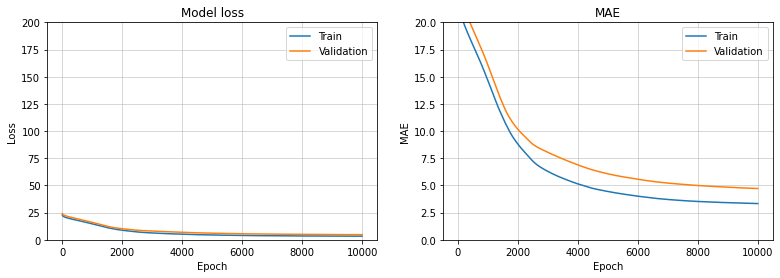

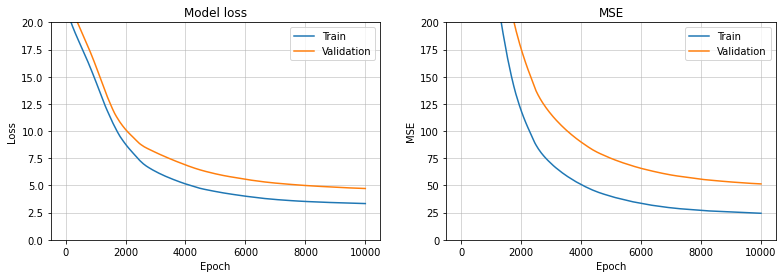

In [112]:
lista1 = ['adam','RMSProp', 'SGD', 'adagrad']

for x in lista1:
    model = initialize_model()
    compile_model(model, x)

    history = model.fit(X_train, y_train, batch_size=32, validation_split=0.3,  callbacks=[es], epochs=10000)
    plot_loss_mae(history)
    plot_loss_mse(history)

In [107]:
def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=200)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['mae'])
    ax2.plot(history.history['val_mae'])
    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=20)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

def plot_loss_mse(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=20)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['mse'])
    ax2.plot(history.history['val_mse'])
    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=200)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

❓ **Question: a Neural Network vs a baseline - part 2** ❓ 

Are your predictions better than the benchmark model you've evaluated at the beginning of the notebook?

In [ ]:
# YOUR CODE HERE


<details>
    <summary><i>Answer</i></summary>
    
You can see that the Neural Network beat the baseline when using either _adam_ or _optimizer_ but it the result was worse than the baseline with the _adagrad_ optimizer.
 
    
</details>

---

👇 The advice from the Deep Learning community is the following 👇:

* 🔥 So far, our most performant optimizer is **`adam`**. Maybe a mathematician specialised in numerical methods will find a better solver in the future but for the moment..., _"adam"_ is your best friend and it has already been helping us achieve remarkable results.

---

❗️So, what's next in this challenge ? ❗️

👩‍🎓 Do you remember the ***Machine Learning > 04. Under The Hood*** where we coded our ***Gradient Descent*** choosing a specific ***learning rate*** ? It represents how slow/fast your algorithm learns. In other words, it controls the intensity of the change of the weights at each optimization of the neural network, at each backpropagation!

🚀 Well, the ***solvers in Machine Learning*** and the ***optimizers in Deep Learning*** are advanced iterative methods relying on ***hyperparameters*** and the learning rate is one of them!

🤔 How can I control this learning rate ? 

✅ Instead of calling an optimizer with a string ("adam", "rmsprop", ...) which uses a default value of the learning rate, we will call 📚 [**tf/keras/optimizers**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) objects 📚 and tailor them to our needs.

🧑🏻‍🏫 Different learning rates have different consequences, as shown here : 

<img src="learning_rate.png" alt="Learning rate" style="height:300px;"/>



### (2.2) The influence of the Learning Rate


❓ **Question: selecting an optimizer with a custom learning rate** ❓ 

📚 [**tf/keras/optimizers/Adam**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

Instead of initializing the optimizer with a string, let's initialize a real optimizer directly.

* Instantiate an Adam optimizer with a learning rate of $ \alpha = 0.1$
    * Keep the other values to their default values. 
* Use this optimizer in the `compile_model` function
* Train/Fit the model
* Plot the history
* Evaluate your model

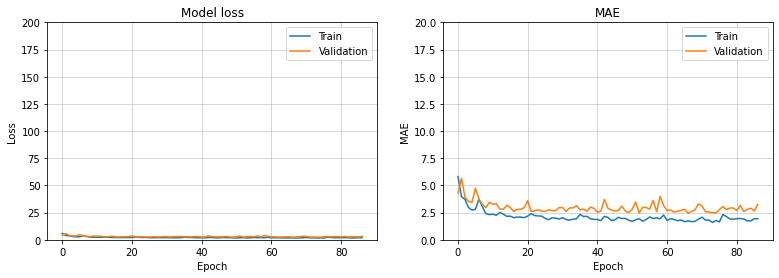

In [121]:
# YOUR CODE HERE
from tensorflow import keras

opt = keras.optimizers.Adam(learning_rate=0.1)
compile_model(model, opt)

history = model.fit(X_train, y_train,epochs=10000,callbacks=[es],verbose=0, validation_split=0.3, batch_size=32)
plot_loss_mae(history)


In [122]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 2.6986 - mae: 2.6986 - mse: 16.0845


[2.6985952854156494, 2.6985952854156494, 16.084522247314453]

)❓ **Question: playing with learning rates** ❓ 

Now, reproduce the same plots and results but for different learning rates.

<details>
    <summary><i>Remark</i></summary>

There is a chance that the y-axis is too large for you to visualize some results with some learning rates. In that case, feel free to re-write the plot function to plot only the epochs $> 10$.
    
</details>

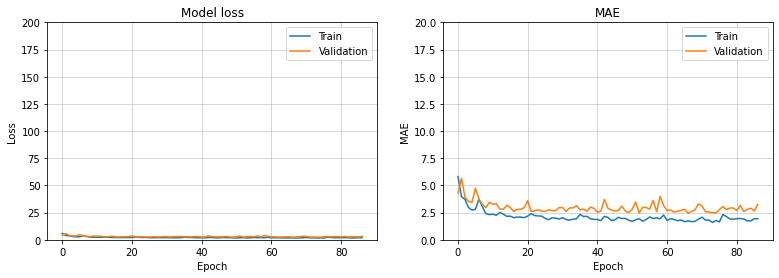

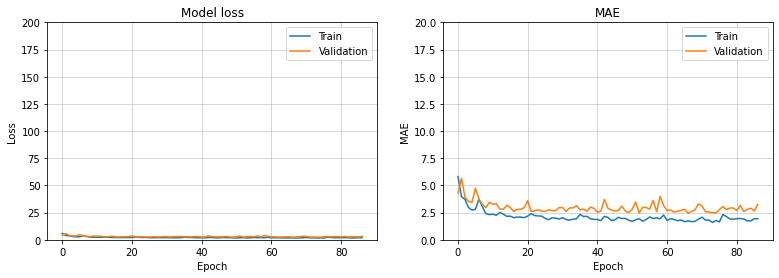

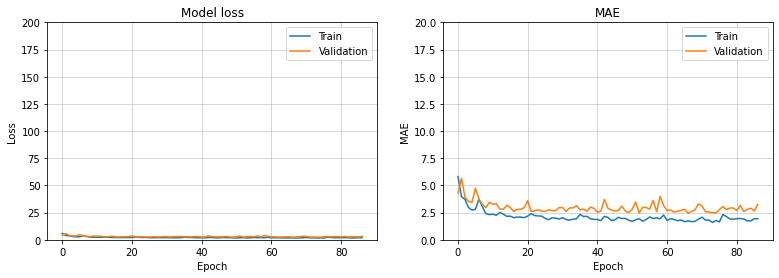

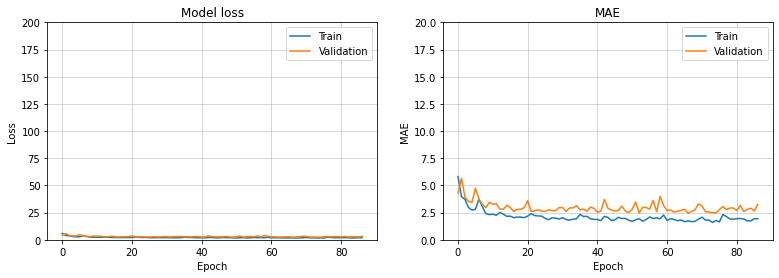

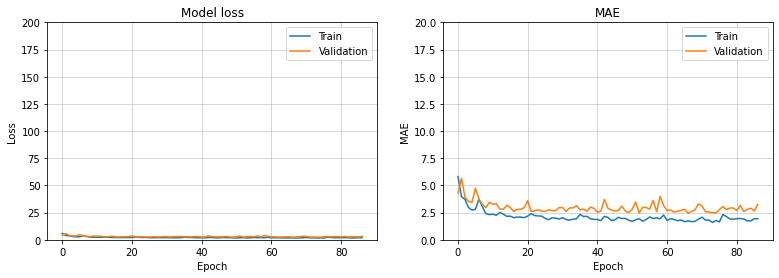

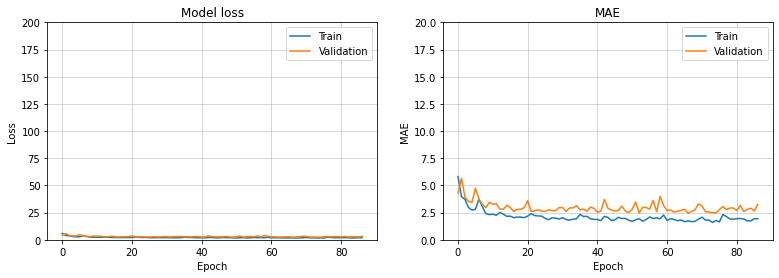

In [124]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 2]
results = []

for learning_rate in learning_rates:
    
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
    compile_model(model, opt)

    results.append(model.fit(X_train, y_train,epochs=10000,callbacks=[es],verbose=0, validation_split=0.3, batch_size=32))
    plot_loss_mae(history)

## (3) The loss

---

❗️ It is important to **clearly understand the different between losses and metrics**. ❗️

* 🏋🏻‍♀️ The **loss functions** are computed ***during the training procedure***
    - For Regression tasks, the classic loss functions are : (Root) Mean Squared Error ((R)MSE), Mean Absolute Error (MAE), Mean Squared Logarithmic Error (MSLE as seen during the Kaggle Challenge)
    - For Classification tasks, the classic loss functions are : Binary Crossentropy (also known as LogLoss), the Categorical Crossentropy, the Hinge Loss, ...
* 🧑🏻‍🏫 The **metrics** are computed ***to evaluate your models, after training them*** !
    - For Regression tasks, common metrics are : MSE, MAE, RMSE, Coefficient of Determination R2, ...
    - For Classification tasks, common metrics are : Accuracy, Recall, Precision, F1-Score
* 👀 Notice that some metrics can also be used as loss functions... as long as they are differentiable ! (e.g. the *MSE*)

If these notions are not clear, we strongly advise to review ***Machine Learning > 03. Performance Metrics*** and ***Machine Learning > 05. Model Tuning***

---

⏩ Alright, after this reminder, let's move on:

❓ **Question: optimizing a model with respect to a certain loss function** ❓ 

* Run the same neural network, once with the `mae` as the loss, and once with the `mse`.  
* In both case, compare `mae_train`, `mae_val`, `mse_train`, `mse_val` and conclude.

In [131]:
# YOUR CODE
for learning_rate in learning_rates:
    results= [] 
    model = initialize_model()
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
    compile_model(model, opt)

    results.append(model.fit(X_train, y_train,epochs=10000,callbacks=[es],verbose=0, validation_split=0.3, batch_size=32))
    

🤔 When you work on this regression task, you want to achieve the lowest MAE in the test set at the end, right ? So why wouldn't we use it directly as a loss function that would decrease with respect to the number of epochs ? 

<details>
    <summary>Answer</summary>

Well, even the Deep Learning research community is still trying to answer these types of questions rigorously.
    
One thing for sure: In Deep Learning, you will never really reach the "global minimum" of the true loss function (the one computed using your entire training set as one single "batch"). So, in your first model (minimizing the MAE loss), your global MAE minimum has clearly **not** been reached (otherwise you could never beat it). 

Why? It may well be that the minimization process of the second model has performed better. Maybe because the loss function "energy map" is "smoother" or more "convex" in the case of MSE loss? Or maybe your hyper-parameter are best suited to the MSE than to the MAE loss?

</details>

## (4)  Saving and loading a trained neural network

🤯 Imagine that you trained a complex Neural Network (many layers/neurons) on a huge dataset. The parameters of your Deep Learning Model (weights and biases) are now optimized and you would like to share these weights with a teammate who wants to predict a new datapoint. Would you give this person your notebook for her/him to run it entirely and then predict the new datapoint ? Hell no, we have a much better solution:
- 💾 Save the weights of the optimised neural network
- 🤝 Your friend/colleague/teammate/classmate can use them to predict a new datapoint

❓ **Question: training a good model** ❓

* Try to reach a MAE on the test set that is lower than 5 (_feel free to re-create the architecture and redefine your compiling parameters in this section!_)
    - _Remember: we are predicting house prices, so a mistake of less than 5_000 USD is already good in the real estate industry)_
    
* Whether you managed to reach it or not, move on to the question _"saving a model"_ after a few attempts.

In [ ]:
compile_model()

model = Sequential()
model = initialize_model()
model.add(layers.Dense(10, input_dim=13, activation='relu'))
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mae', metrics='mae')
model.fit()
model.fit(X_train, y_train, batch_size=32, validation_split=0.3,  callbacks=[es], epochs=10000)

In [143]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=20, restore_best_weights=True, verbose=0)

model = initialize_model()
compile_model(model, 'adam')

model.fit(X_train, y_train, batch_size=32, validation_split=0.3,  callbacks=[es], epochs=10000)

Epoch 1/10000
9/9 [==============================] - 1s 22ms/step - loss: 21.2936 - mae: 21.2936 - mse: 518.3473 - val_loss: 22.5444 - val_mae: 22.5444 - val_mse: 601.5814
Epoch 2/10000
9/9 [==============================] - 0s 7ms/step - loss: 21.0937 - mae: 21.0937 - mse: 509.4477 - val_loss: 22.3565 - val_mae: 22.3565 - val_mse: 592.8943
Epoch 3/10000
9/9 [==============================] - 0s 6ms/step - loss: 20.8913 - mae: 20.8913 - mse: 500.4735 - val_loss: 22.1548 - val_mae: 22.1548 - val_mse: 583.5928
Epoch 4/10000
9/9 [==============================] - 0s 7ms/step - loss: 20.6706 - mae: 20.6706 - mse: 490.6694 - val_loss: 21.9406 - val_mae: 21.9406 - val_mse: 573.8190
Epoch 5/10000
9/9 [==============================] - 0s 7ms/step - loss: 20.4439 - mae: 20.4439 - mse: 480.6151 - val_loss: 21.7011 - val_mae: 21.7011 - val_mse: 563.0653
Epoch 6/10000
9/9 [==============================] - 0s 6ms/step - loss: 20.1785 - mae: 20.1785 - mse: 469.0584 - val_loss: 21.4439 - val_mae: 2

9/9 [==============================] - 0s 6ms/step - loss: 3.0327 - mae: 3.0327 - mse: 22.2994 - val_loss: 4.4243 - val_mae: 4.4243 - val_mse: 50.3155
Epoch 99/10000
9/9 [==============================] - 0s 6ms/step - loss: 3.0173 - mae: 3.0173 - mse: 22.1306 - val_loss: 4.4121 - val_mae: 4.4121 - val_mse: 49.8622
Epoch 100/10000
9/9 [==============================] - 0s 6ms/step - loss: 2.9997 - mae: 2.9997 - mse: 21.9305 - val_loss: 4.3952 - val_mae: 4.3952 - val_mse: 49.7775
Epoch 101/10000
9/9 [==============================] - 0s 6ms/step - loss: 2.9884 - mae: 2.9884 - mse: 21.8018 - val_loss: 4.3746 - val_mae: 4.3746 - val_mse: 49.4737
Epoch 102/10000
9/9 [==============================] - 0s 6ms/step - loss: 2.9768 - mae: 2.9768 - mse: 21.6558 - val_loss: 4.3529 - val_mae: 4.3529 - val_mse: 49.0842
Epoch 103/10000
9/9 [==============================] - 0s 6ms/step - loss: 2.9658 - mae: 2.9658 - mse: 21.4353 - val_loss: 4.3337 - val_mae: 4.3337 - val_mse: 48.6070
Epoch 104/10000

9/9 [==============================] - 0s 7ms/step - loss: 2.0736 - mae: 2.0736 - mse: 12.7813 - val_loss: 3.1817 - val_mae: 3.1817 - val_mse: 34.9302
Epoch 197/10000
9/9 [==============================] - 0s 7ms/step - loss: 2.0664 - mae: 2.0664 - mse: 12.7717 - val_loss: 3.1787 - val_mae: 3.1787 - val_mse: 34.8190
Epoch 198/10000
9/9 [==============================] - 0s 7ms/step - loss: 2.0629 - mae: 2.0629 - mse: 12.7249 - val_loss: 3.1802 - val_mae: 3.1802 - val_mse: 34.8131
Epoch 199/10000
9/9 [==============================] - 0s 7ms/step - loss: 2.0594 - mae: 2.0594 - mse: 12.7106 - val_loss: 3.1757 - val_mae: 3.1757 - val_mse: 34.9910
Epoch 200/10000
9/9 [==============================] - 0s 7ms/step - loss: 2.0552 - mae: 2.0552 - mse: 12.7141 - val_loss: 3.1867 - val_mae: 3.1867 - val_mse: 34.9869
Epoch 201/10000
9/9 [==============================] - 0s 7ms/step - loss: 2.0522 - mae: 2.0522 - mse: 12.6852 - val_loss: 3.1795 - val_mae: 3.1795 - val_mse: 35.0080
Epoch 202/1000

9/9 [==============================] - 0s 8ms/step - loss: 1.8648 - mae: 1.8648 - mse: 11.2420 - val_loss: 3.0659 - val_mae: 3.0659 - val_mse: 34.0907
Epoch 295/10000
9/9 [==============================] - 0s 7ms/step - loss: 1.8687 - mae: 1.8687 - mse: 11.3500 - val_loss: 3.0660 - val_mae: 3.0660 - val_mse: 34.1582


In [147]:
mae_test = model.evaluate(X_test, y_test)[1]

4/4 [==============================] - 0s 3ms/step - loss: 2.9711 - mae: 2.9711 - mse: 17.8243


In [148]:
from nbresult import ChallengeResult
result = ChallengeResult('solution',
    mae_test = mae_test)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/06-Deep-Learning/02-Optimizer-loss-and-fitting/03-Finetune-your-Neural-Network
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_solution.py::TestSolution::test_is_score_ok PASSED            [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/solution.pickle

git commit -m 'Completed solution step'

git push origin master


📚 [**tf/keras/models/save_model**](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model).

❓ **Question: saving a model** ❓  

Save your model using `.save_model(model, 'name_of_my_model')` method

In [151]:
! pwd

/home/bitazaratustra/code/bitazaratustra/data-challenges/06-Deep-Learning/02-Optimizer-loss-and-fitting/03-Finetune-your-Neural-Network


In [158]:
# YOUR CODE HERE
tf.keras.models.save_model(
    model,
    filepath='/home/bitazaratustra/code/bitazaratustra/data-challenges/06-Deep-Learning/02-Optimizer-loss-and-fitting/03-Finetune-your-Neural-Network')

INFO:tensorflow:Assets written to: /home/bitazaratustra/code/bitazaratustra/data-challenges/06-Deep-Learning/02-Optimizer-loss-and-fitting/03-Finetune-your-Neural-Network/assets


📚 [**tf/keras/models/load_model**](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model)

❓ **Question: Loading a model** ❓ 

* Load the model that you've just saved using `.load_model('name_of_your_model')` and store it into a variable called`loaded_model

* Evaluate it on the test data to check that it gives the same result as before.

In [166]:
filepath='/home/bitazaratustra/code/bitazaratustra/data-challenges/06-Deep-Learning/02-Optimizer-loss-and-fitting/03-Finetune-your-Neural-Network'

In [170]:
# YOUR CODE HERE
loaded_model = tf.keras.models.load_model(filepath).evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 2.9711 - mae: 2.9711 - mse: 17.8243


## (5) (Optional) Exponential Decay

❗️ Warning ❗️ 

* This section is optional and for advanced practionners
* The next question is not essential and can be indeed skipped as many algorithms can be run without such optimization. 

🧑🏻‍🏫 Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that at first, you need a large learning rate to learn fast, and as the neural network converges and gets closer to the minimum of the loss function, you can decrease the value of the learning rate. This is called a **`scheduler`**. 

❓ **Question: the Exponential Decay Scheduler** ❓ 

* Use the 📚 [Exponential Decay Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) 📚 in the `adam` optimizer
* Run it on the previous data. 

Start with the following:

```python
initial_learning_rate = 0.001 # start with default Adam value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps = 5000, decay_rate = 0.7,
)
```

In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

pass  # YOUR CODE HERE

🏁 Congratulations !

💾 Do not forget to `git add/commit/push` your notebook...

🚀 ... and move to the next challenge !